In [1]:
import pandas as pd
import string
from glob import glob
import numpy as np
import os
import os, fnmatch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics
import codecs
import math
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter, find_peaks
from ipywidgets import interact
from termcolor import colored
import csv
import pickle

In [2]:
path_data = r"C:\Users\teolo\Documents\Teo\Codes\New\Cycling analyzer\Executable\Multicells\Comparisons"
Samples_dir = [x[0] for x in os.walk(path_data)]
dirs_cycle_life = []
dirs_rate_cap = []
names = []

rename = 1 

tokens = ["Results_cycle_life_", "Results_rate_capability_"]
for d in Samples_dir:
    for t in tokens:
        if t == "Results_cycle_life_":
            dirs = dirs_cycle_life
        if t == "Results_rate_capability_":
            dirs = dirs_rate_cap
        
        if t in d and not "Future" in d and not "Your graphs" in d:
            if rename == 1:
                name_i = d.split("\\")[-1].split(".")[0].split(t)[1]
            else:
                name_i = d.split("\\")[-1]
                
            if name_i not in names:
                names.append(name_i)
                
            dirs.append(d)
            
print(names)

['PMNM_NCM_FB2Feb22LPSCl - 061', 'PMNM_NCM_FB2Feb22_LPSCl02 - 062']


In [3]:
# Personal renaming
"""
name_f = []
for n in names:
    n_i = n.split("- ")[0]
    name_f.append(n_i)
    
names = name_f
names = ['C_10', '3C_10', '1C_10-D_50', '1C_50-D_10', '1C_50-D_20', 'C_50']
#names = ['1C_10-D_50', '1C_50-D_10', '1C_50-D_20', 'C_10', 'C_50', '3C_10']
#names = ['002', '087', '088', '079', '005', '043', '044', '049']
print(names)
"""

'\nname_f = []\nfor n in names:\n    n_i = n.split("- ")[0]\n    name_f.append(n_i)\n    \nnames = name_f\nnames = [\'C_10\', \'3C_10\', \'1C_10-D_50\', \'1C_50-D_10\', \'1C_50-D_20\', \'C_50\']\n#names = [\'1C_10-D_50\', \'1C_50-D_10\', \'1C_50-D_20\', \'C_10\', \'C_50\', \'3C_10\']\n#names = [\'002\', \'087\', \'088\', \'079\', \'005\', \'043\', \'044\', \'049\']\nprint(names)\n'

In [3]:
path_res_original = path_data + "\\Comparisons"
try: 
    os.makedirs(path_res_original)
except:
    pass

In [4]:
# Cycle life

In [5]:
if len(dirs_cycle_life) >= 2:
    path_res = path_res_original + "\\Cycle life"
    try: 
        os.makedirs(path_res)
    except:
        pass

In [7]:
# Comparison cycle life

if len(dirs_cycle_life) >= 2:
    performance = {}
    performance["charge"] = {}
    performance["discharge"] = {}

    dQdV = {}
    dQdV["charge"] = {}
    dQdV["discharge"] = {}

    dVdQ = {}
    dVdQ["charge"] = {}
    dVdQ["discharge"] = {}

    peaks_dQdV = {}
    peaks_dQdV["charge"] = {}
    peaks_dQdV["discharge"] = {}

    peaks_dVdQ = {}
    peaks_dVdQ["charge"] = {}
    peaks_dVdQ["discharge"] = {}

    end_capacity = {}
    end_capacity["charge"] = {}
    end_capacity["discharge"] = {}

    Q_efficiency = {}
    Q_efficiency["charge"] = {}

    average_volt = {} 
    average_volt["charge"] = {}
    average_volt["discharge"] = {}

    variance_Q = {} 
    variance_Q["charge"] = {}
    variance_Q["discharge"] = {}

    Q_from_CV = {}
    Q_from_CV["charge"] = {}
    Q_from_CV["discharge"] = {}

    dictionaries = [performance, dQdV, dVdQ, peaks_dQdV, peaks_dVdQ, end_capacity, average_volt, variance_Q, Q_efficiency, Q_from_CV]
    data_names = ["raw_","dQ_dV", "dV_dQ", "Identified_Peaks_dQdV", "Identified_Peaks_dVdQ", "end_of_", 
                  "Average_voltage_", "Variance_capacity_", "Coulombic_efficiency", "Q_from_CV_"] 
    dict_names = ["performance", "dQdV", "dVdQ", "peaks_dQdV", "peaks_dVdQ", "end_capacity", "average_volt", 
                  "variance_Q", "Q_efficiency", "Q_from_CV"]
    limits = {}
    for d in dict_names:
        limits[d] = {}
        limits[d]["charge"] = {}
        limits[d]["discharge"] = {}

    #count_dict = 0
    for name_d_i in names:
        name_d_i = "_" + name_d_i
        for f in dirs_cycle_life:
            if name_d_i in f:
                files =  os.listdir(f)
                for file in files:
                    if ".csv" in file:
                        path_file = str(f) + "\\" + str(file)
                        if "discharge" in file:
                            direction = "discharge"
                        else:
                            direction = "charge"
                        for n in range(len(data_names)):
                            name_i = data_names[n]
                            if name_i in file:
                                dict_i = dictionaries[n]
                                dict_i[direction][name_d_i] = pd.read_csv(path_file)          
        #count_dict+=1

    Q_efficiency["all"] = Q_efficiency["charge"]
    del Q_efficiency["charge"]

C:\Users\teolo\AppData\Local\Temp\ipykernel_18836\79553685.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(13,11))


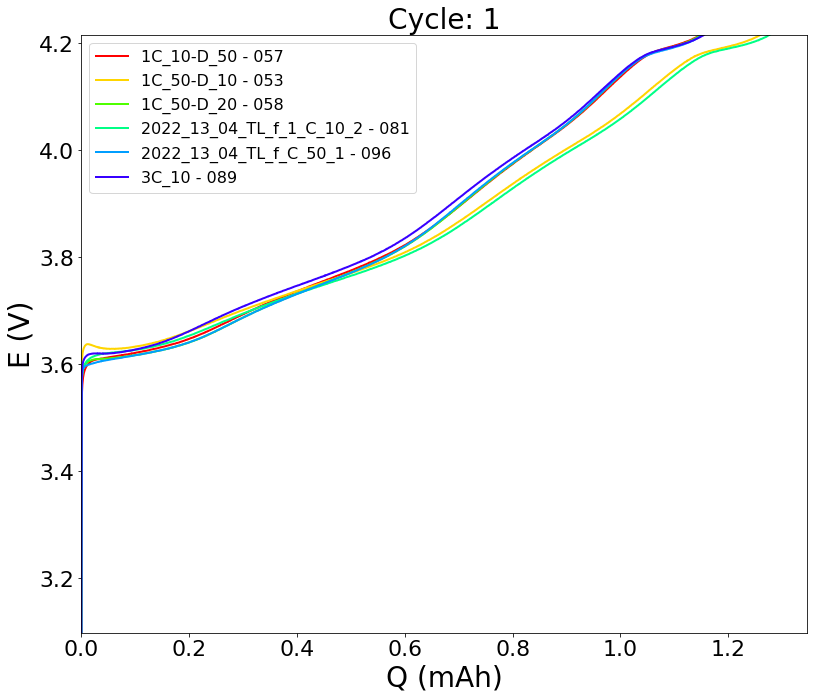

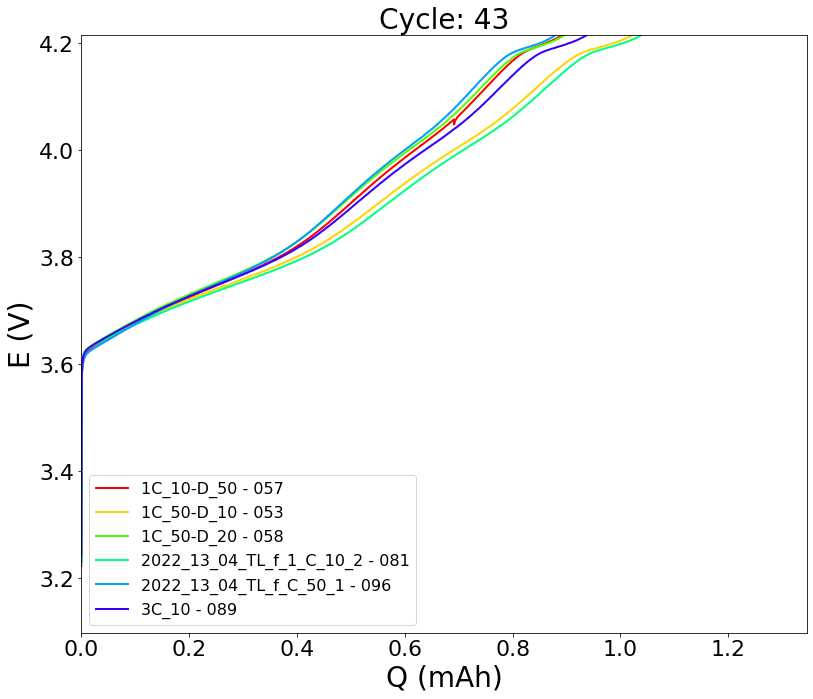

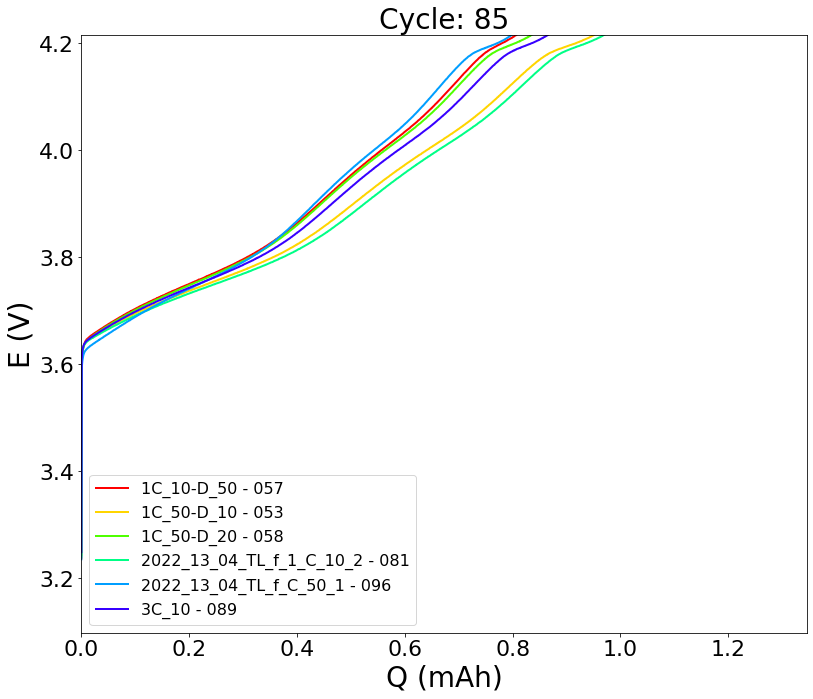

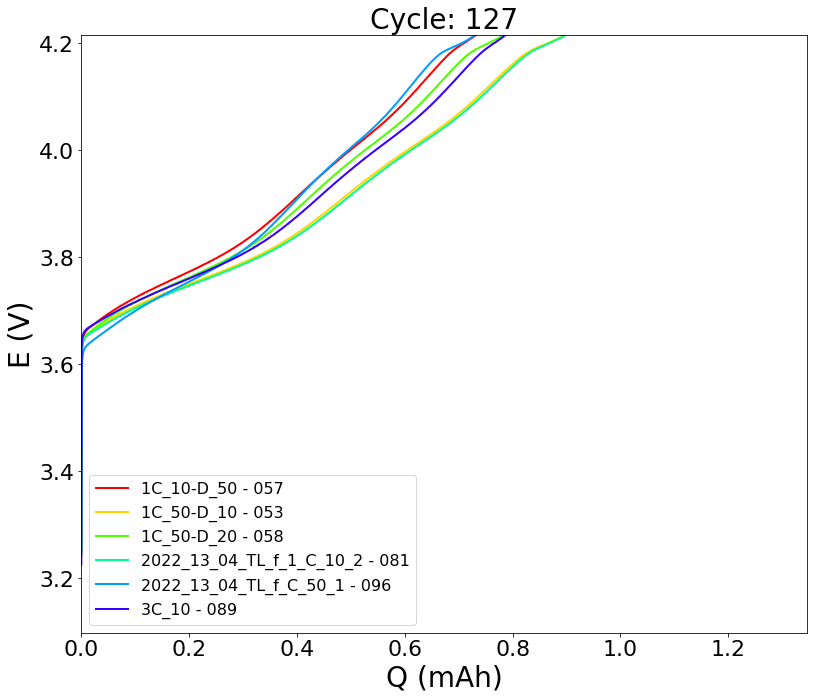

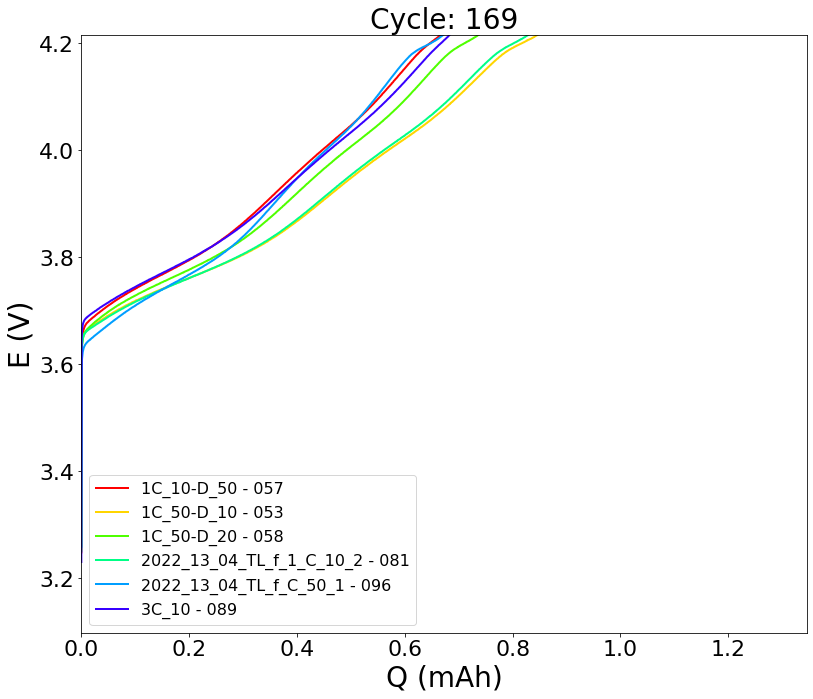

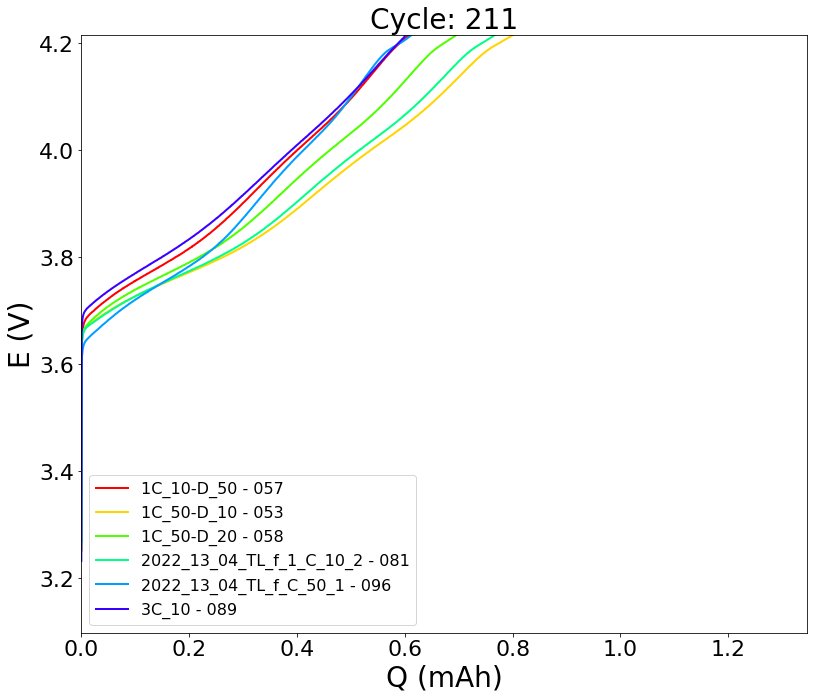

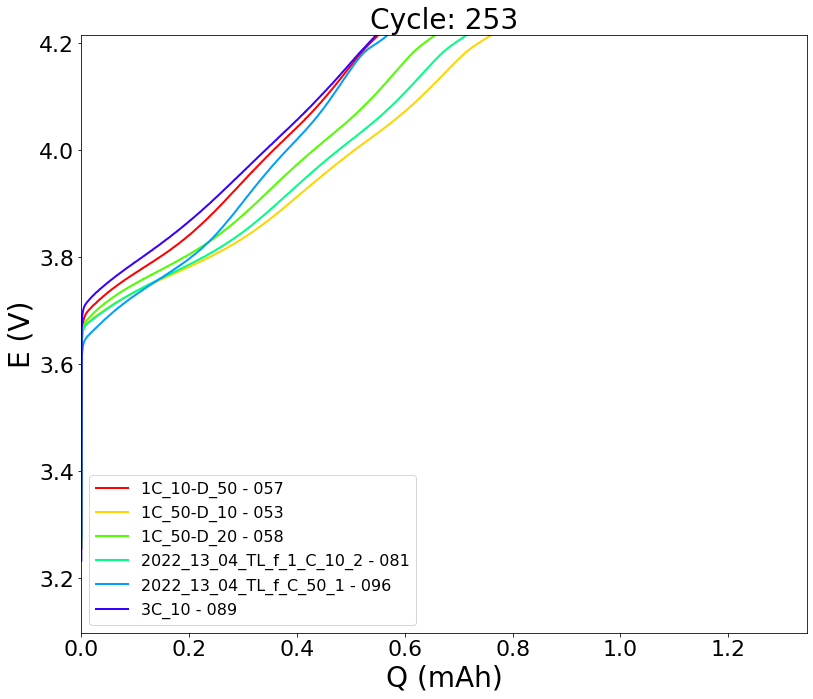

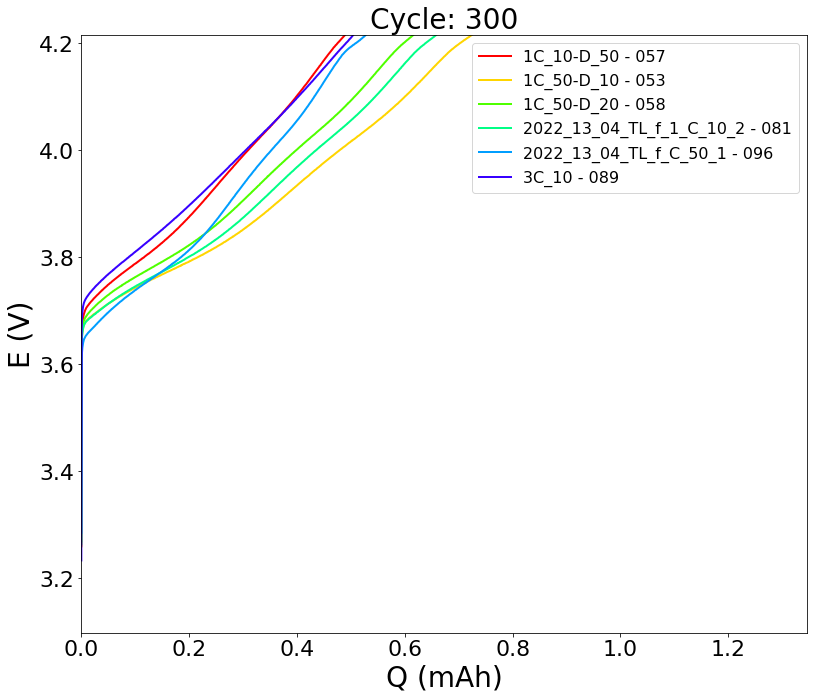

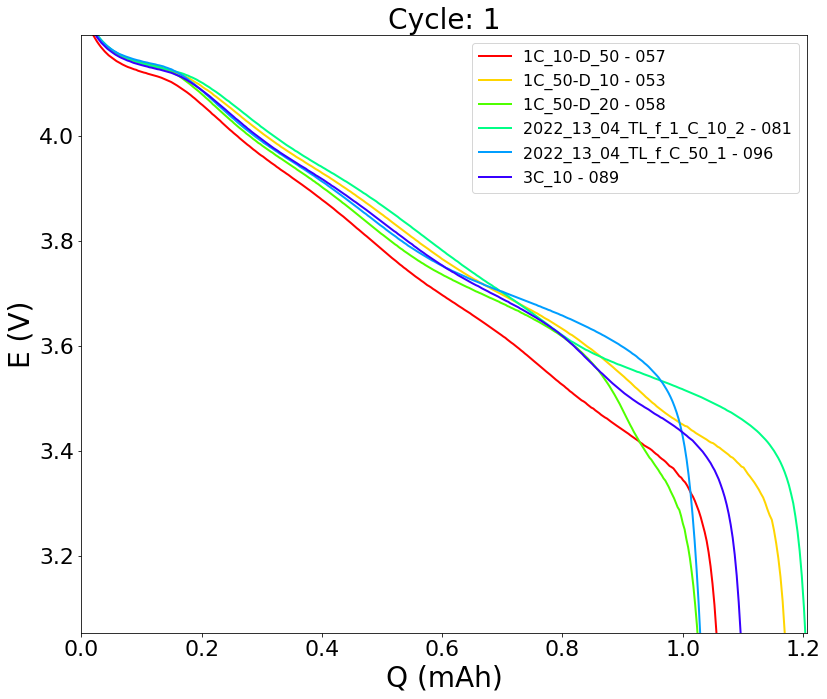

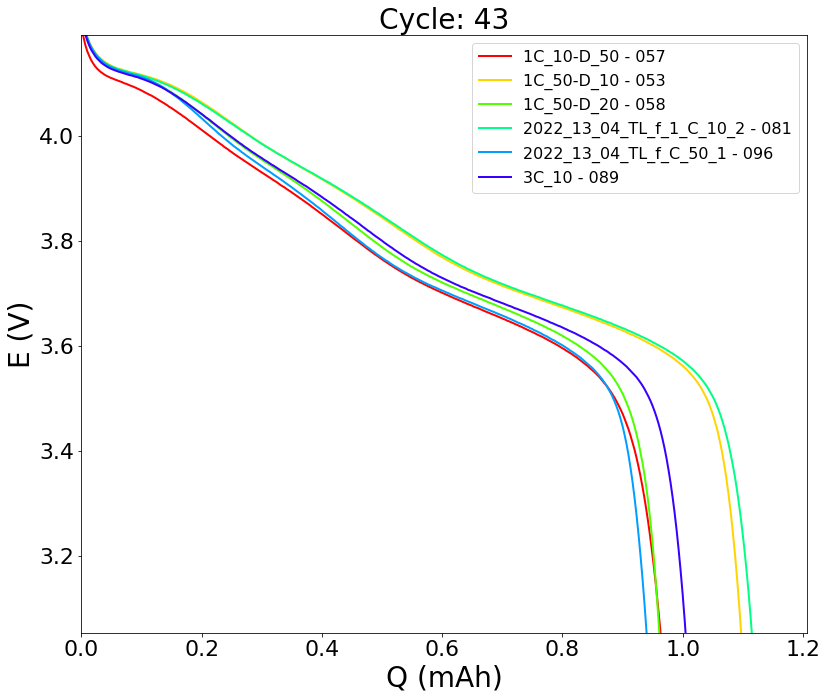

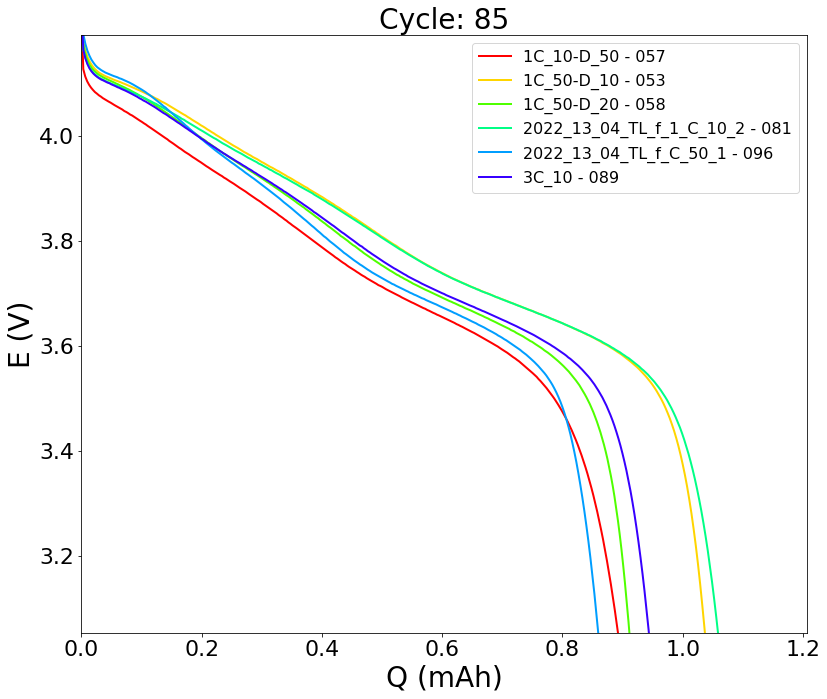

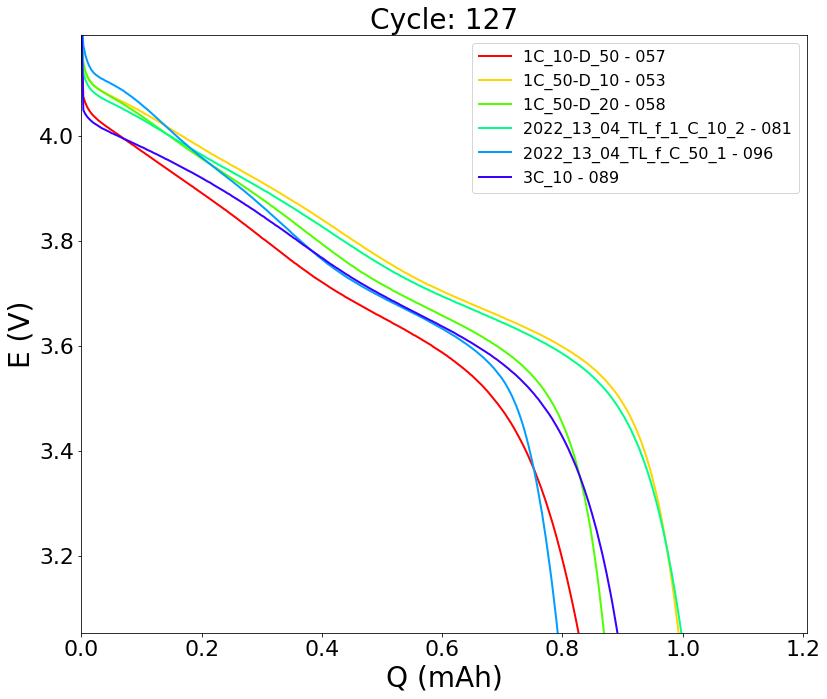

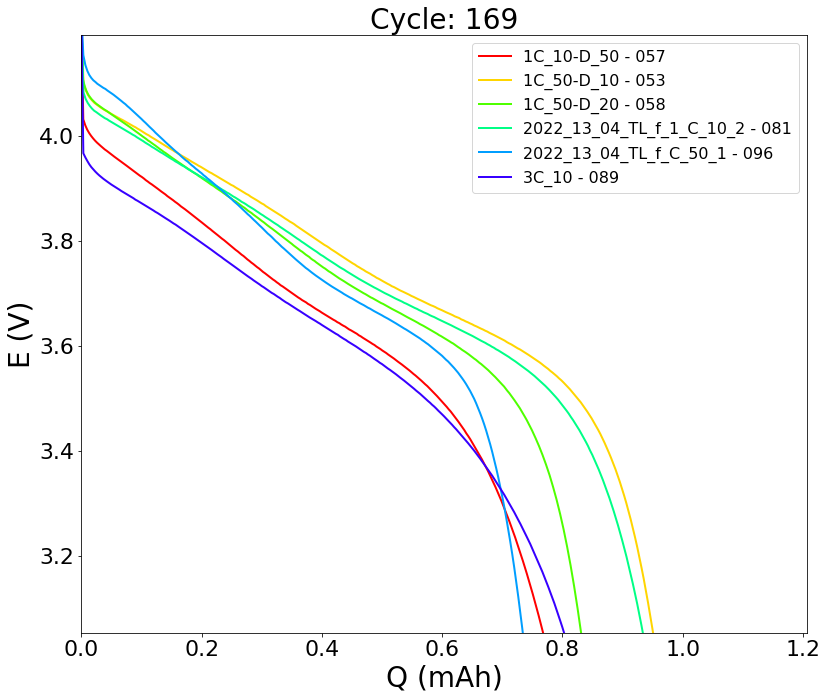

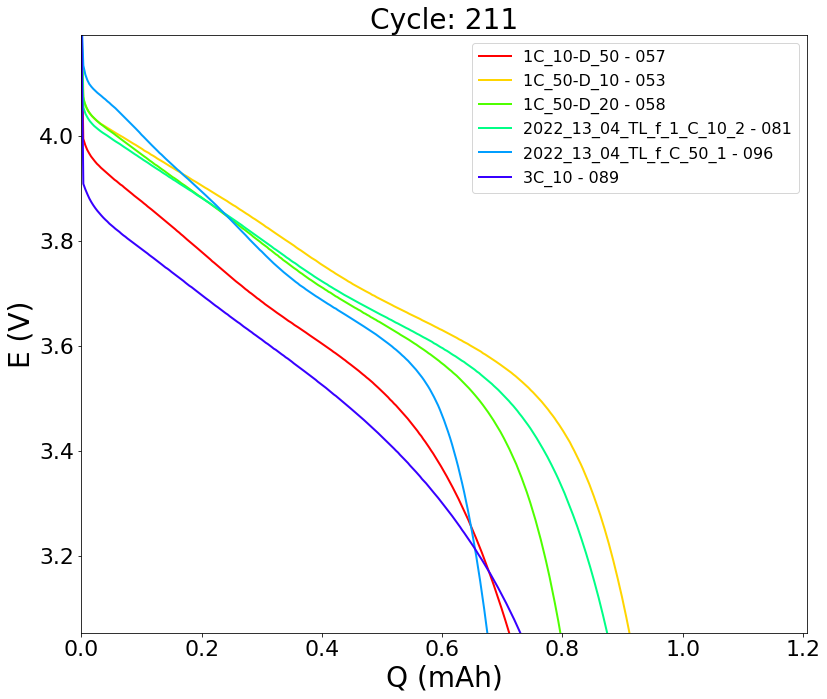

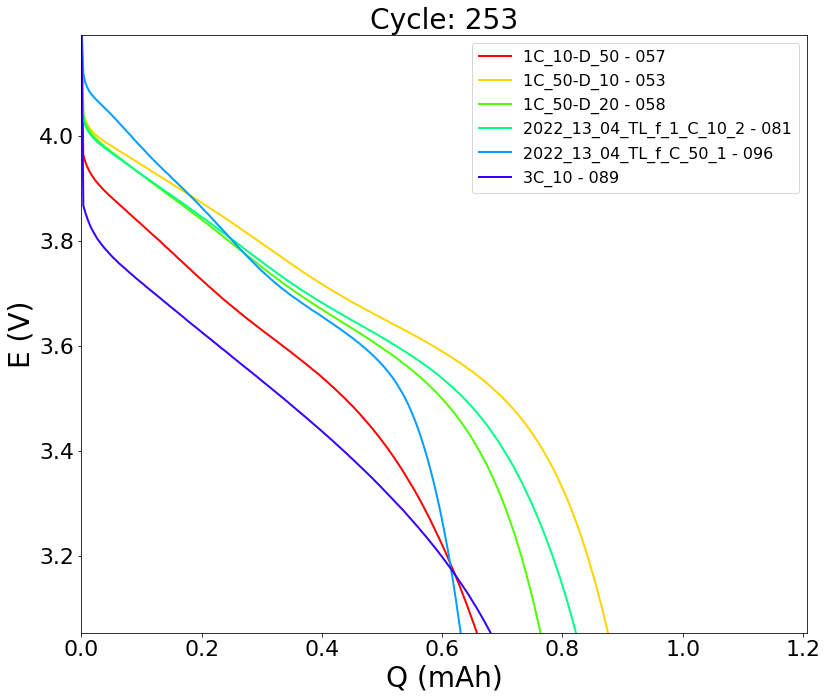

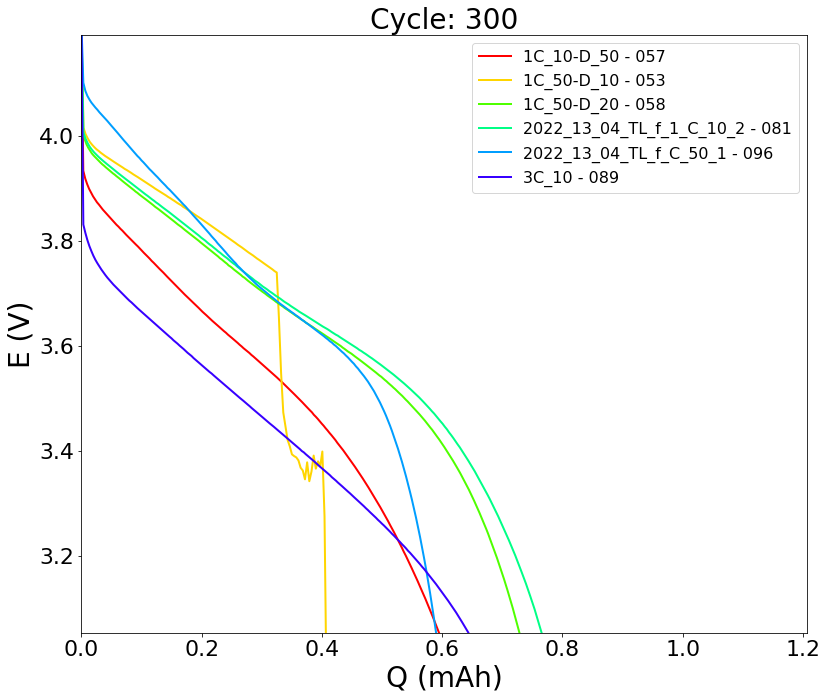

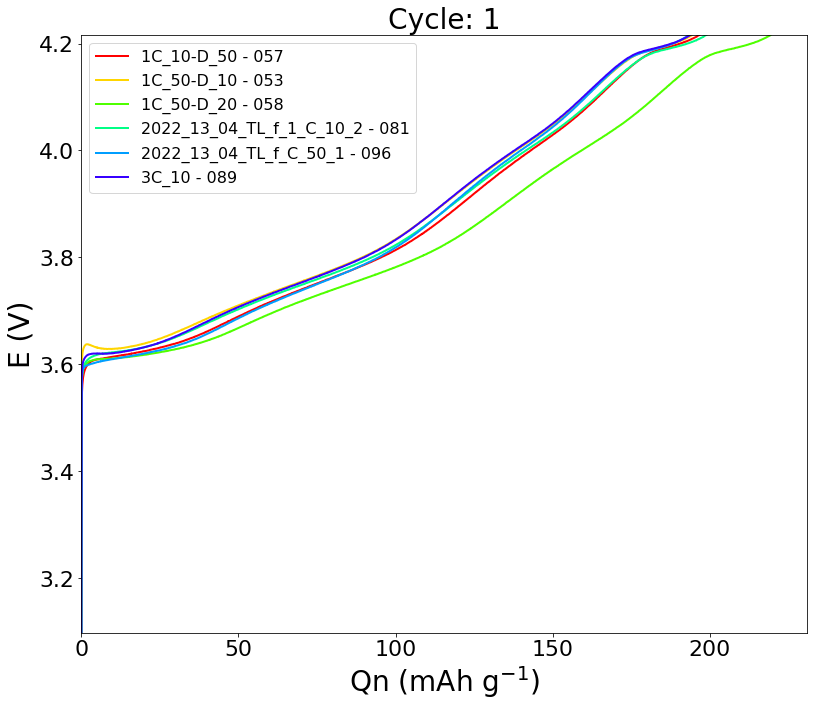

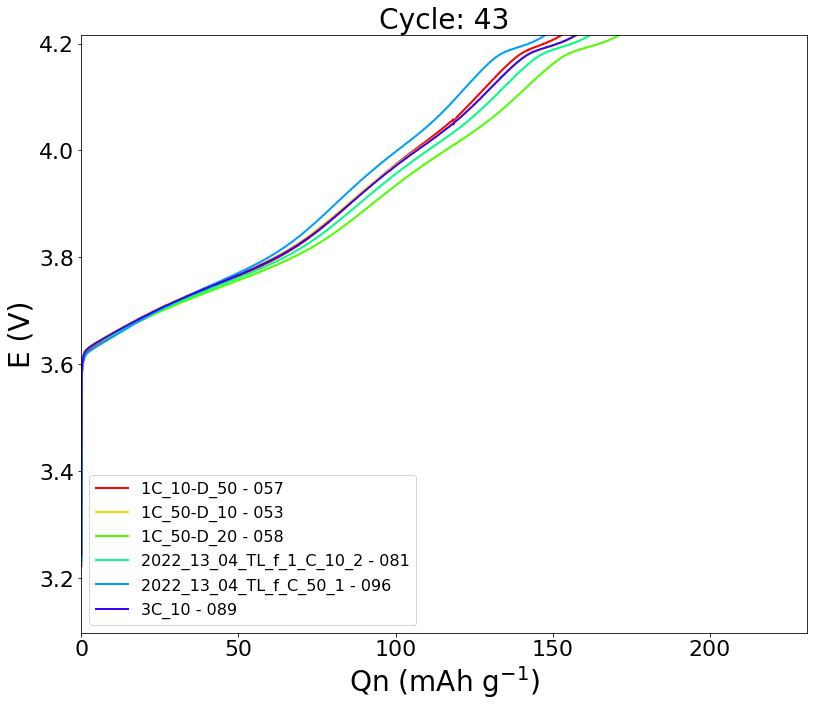

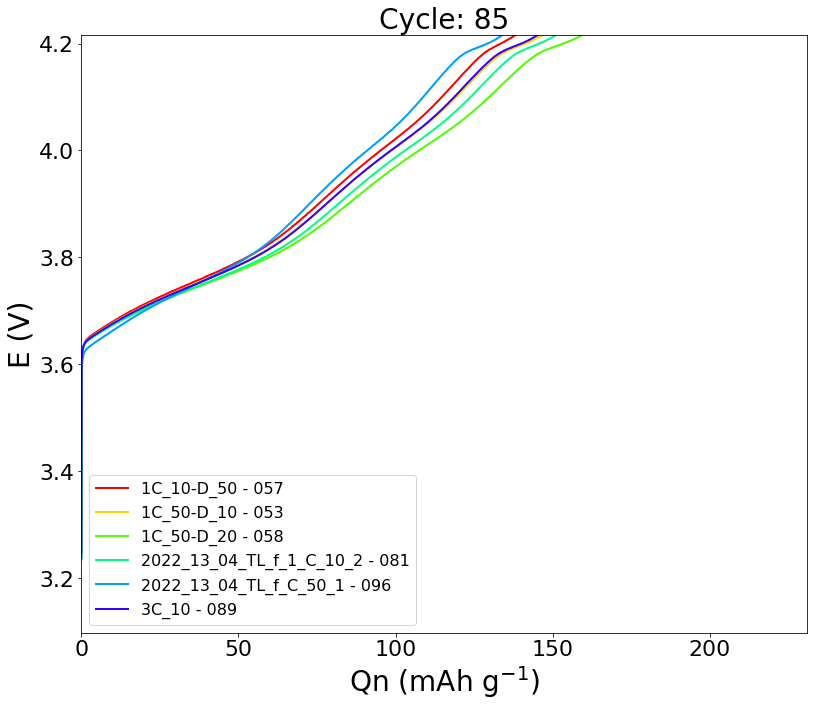

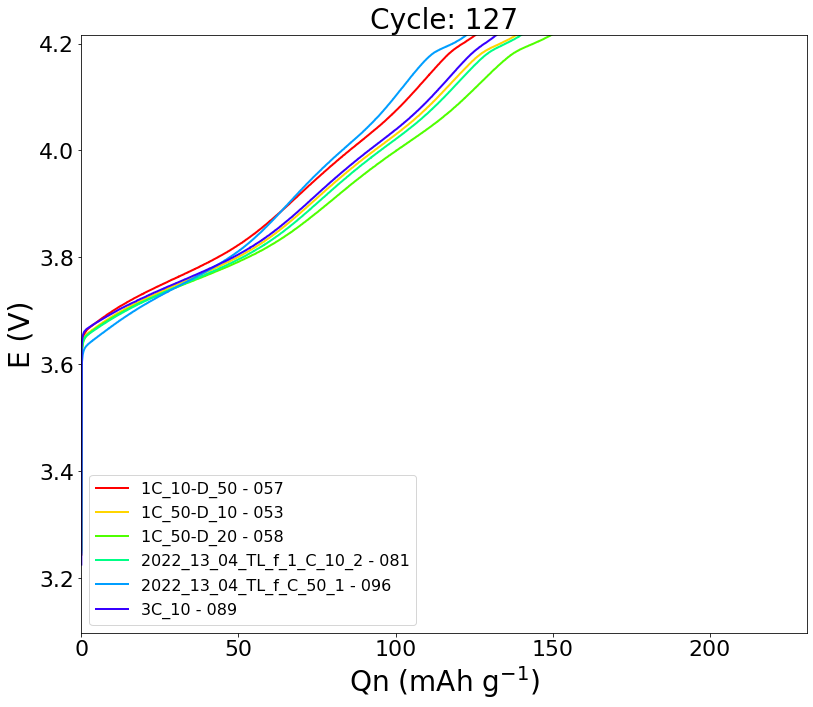

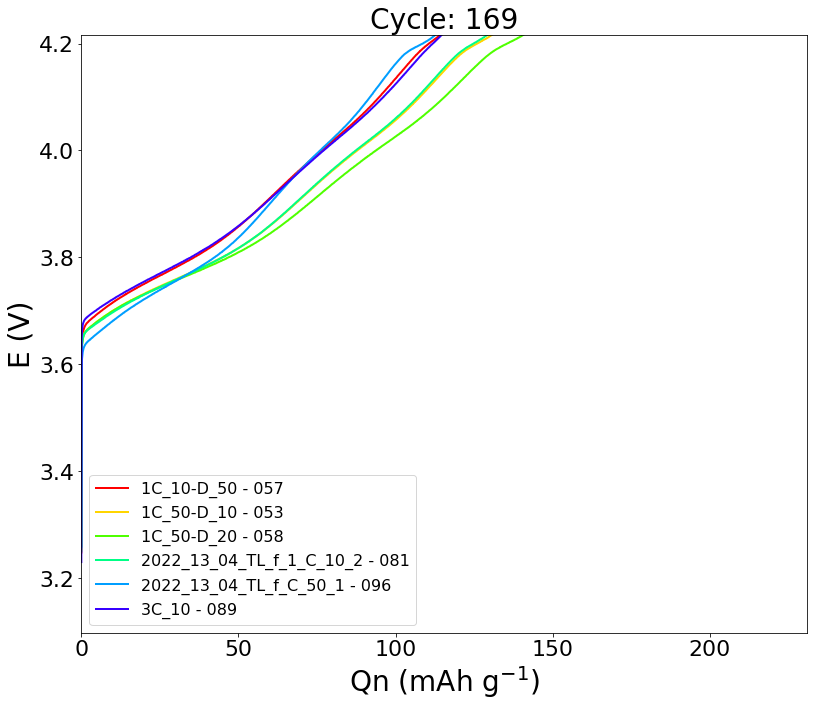

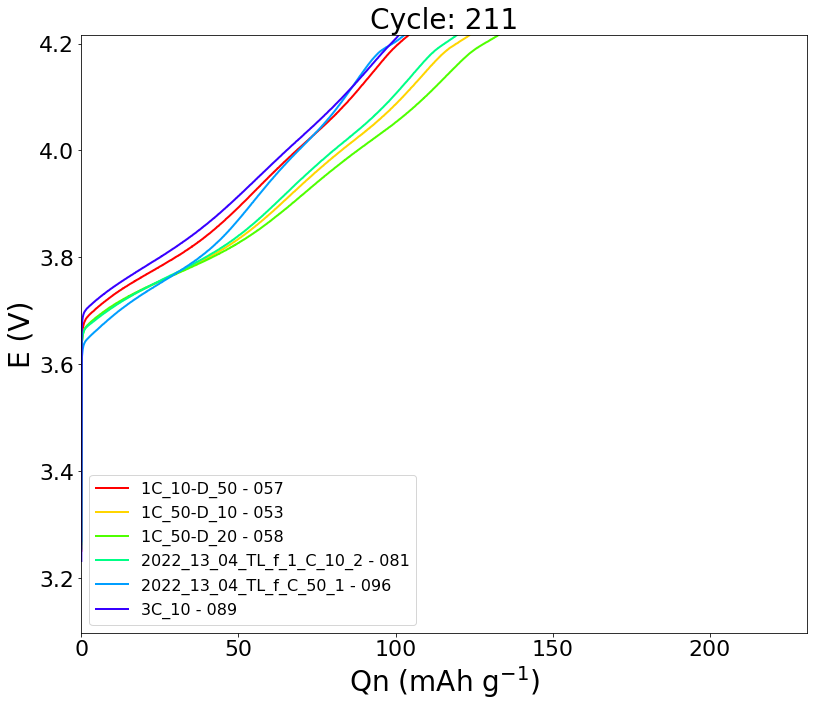

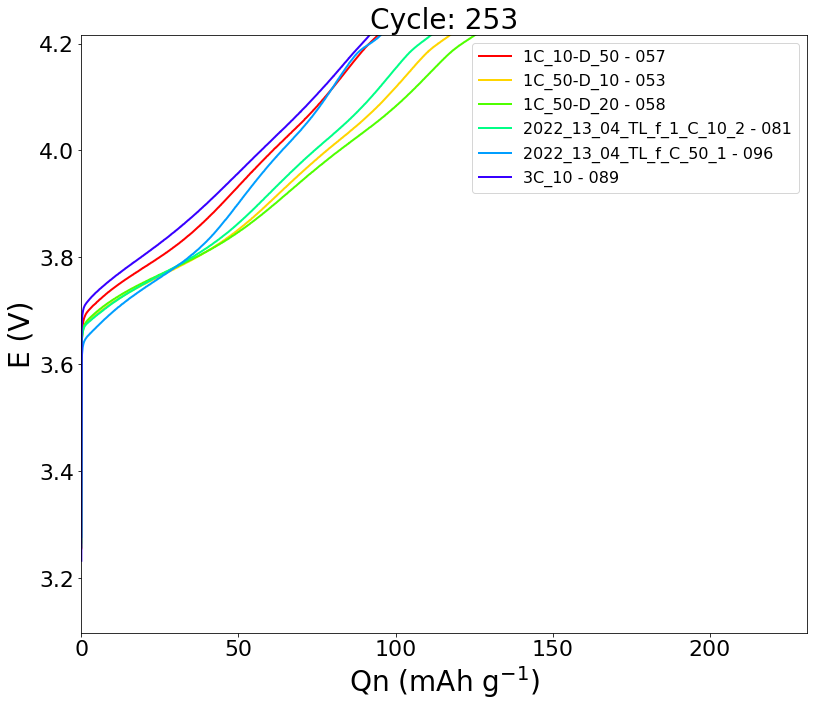

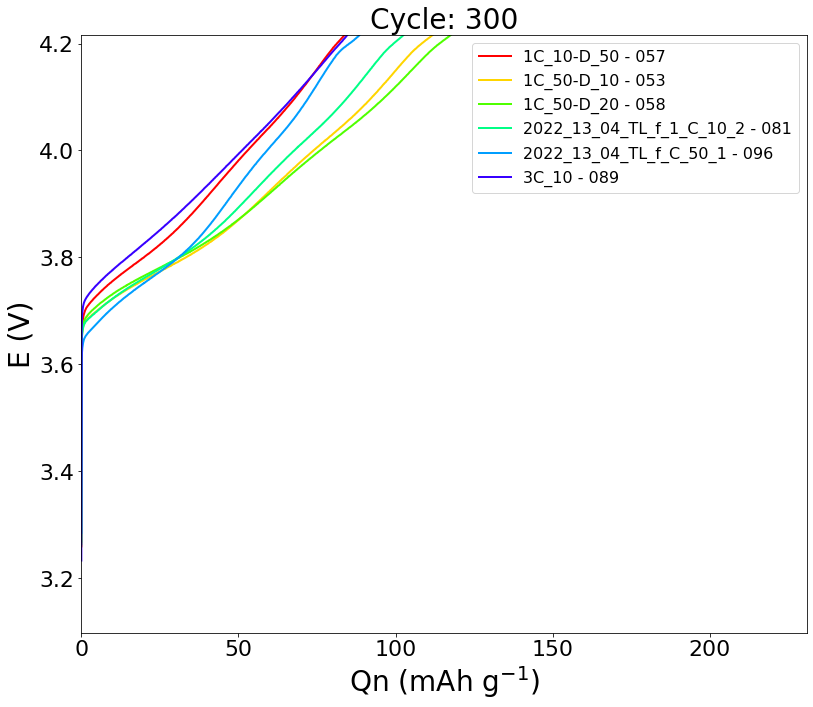

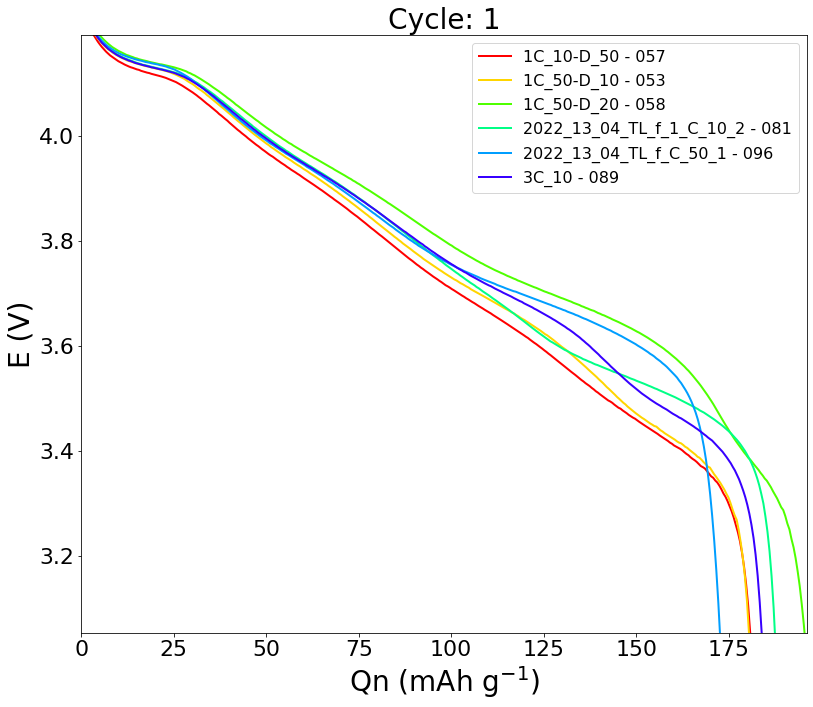

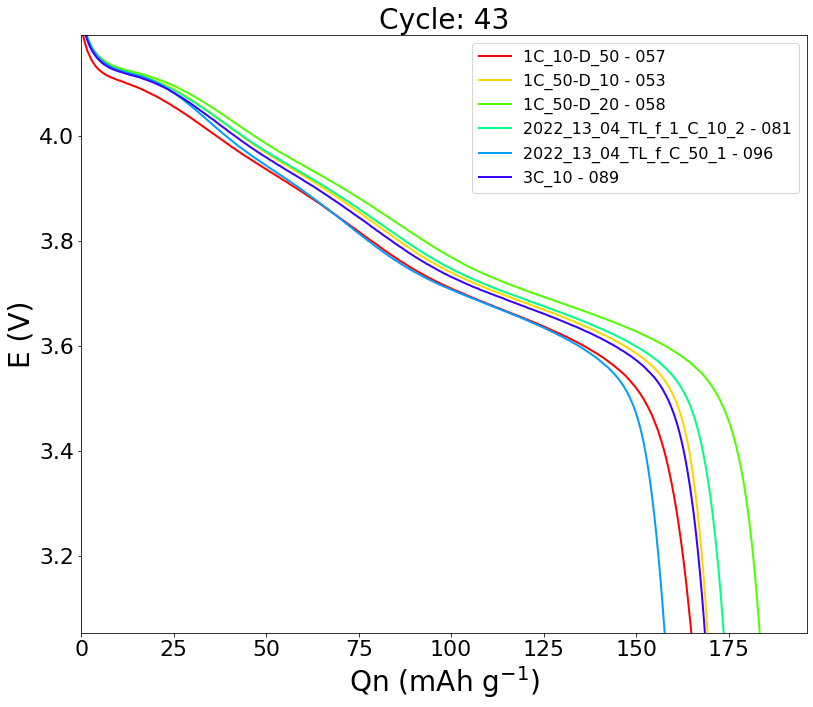

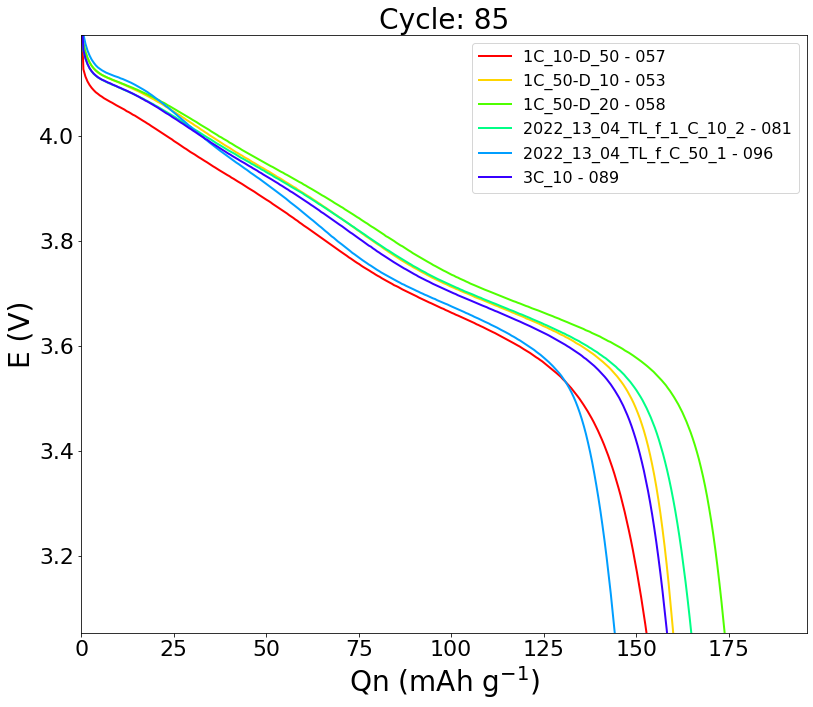

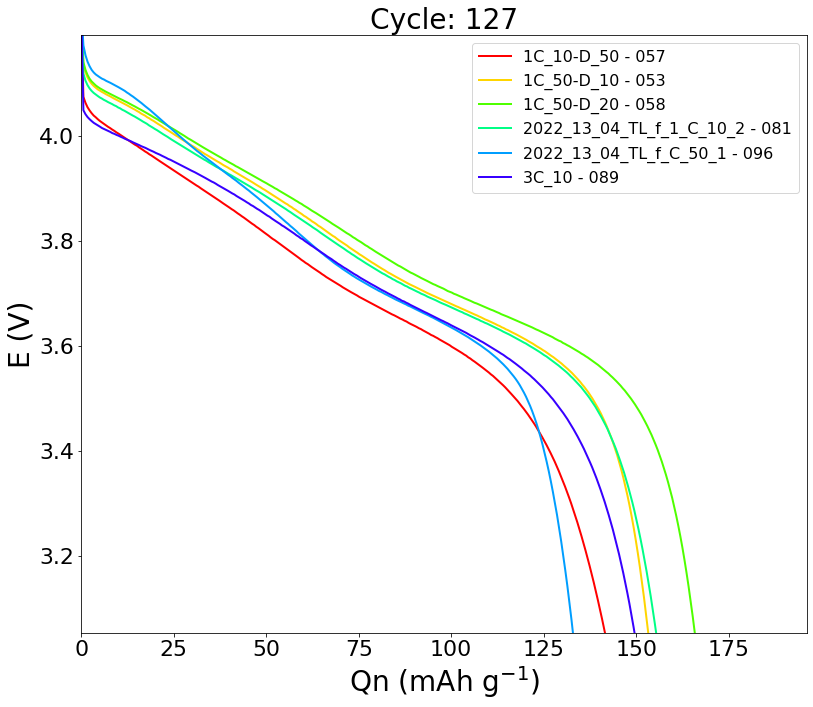

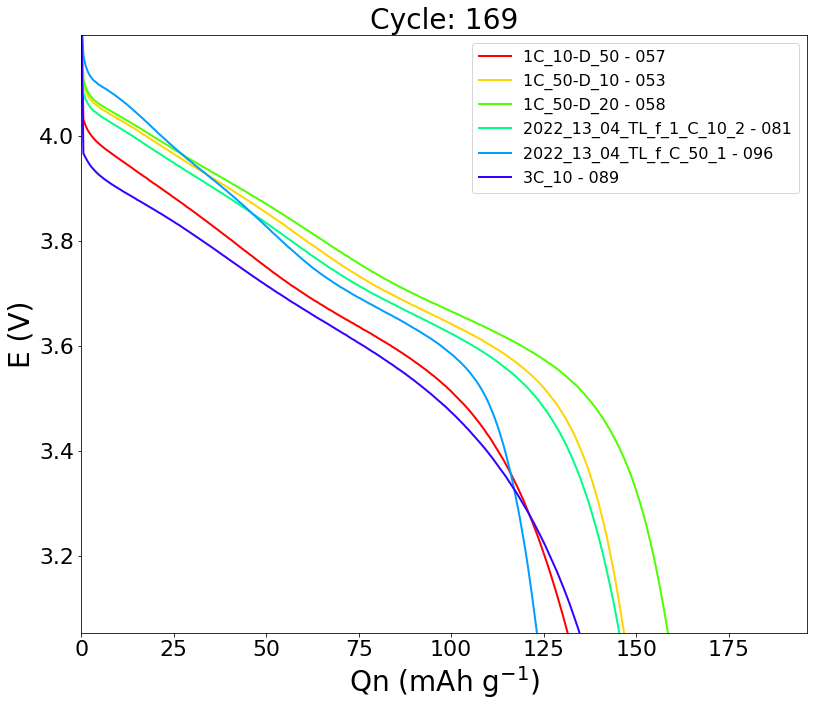

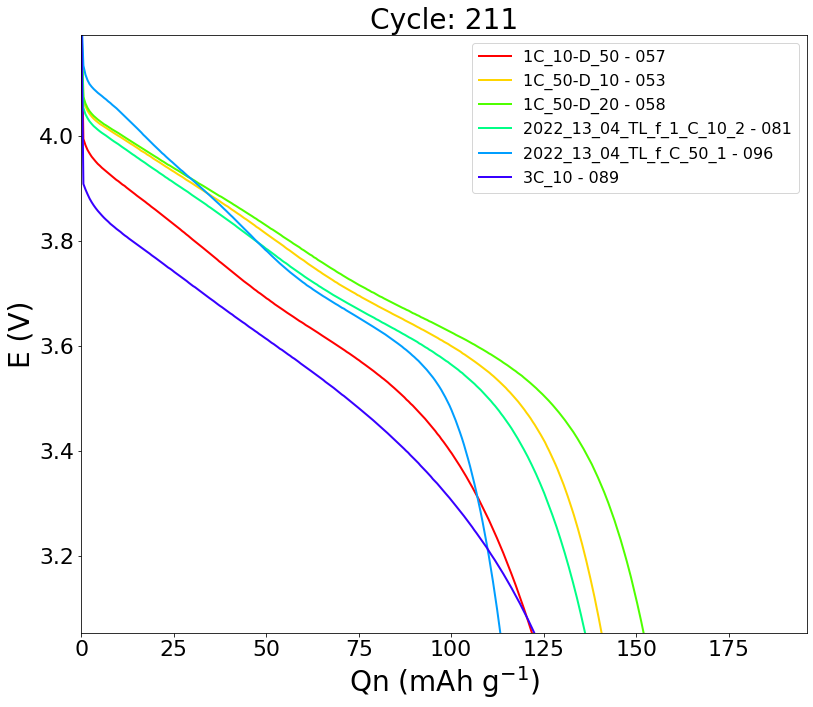

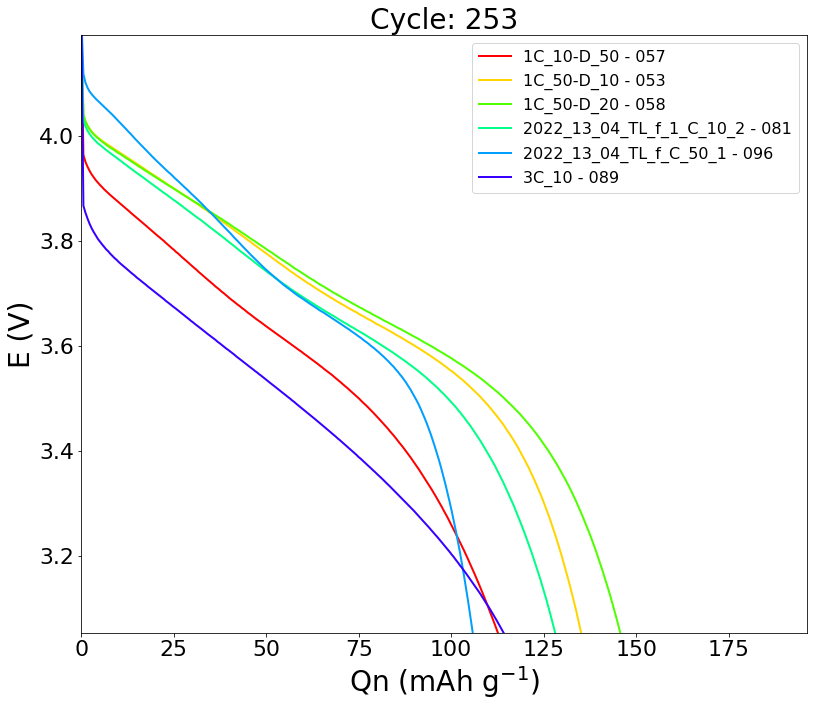

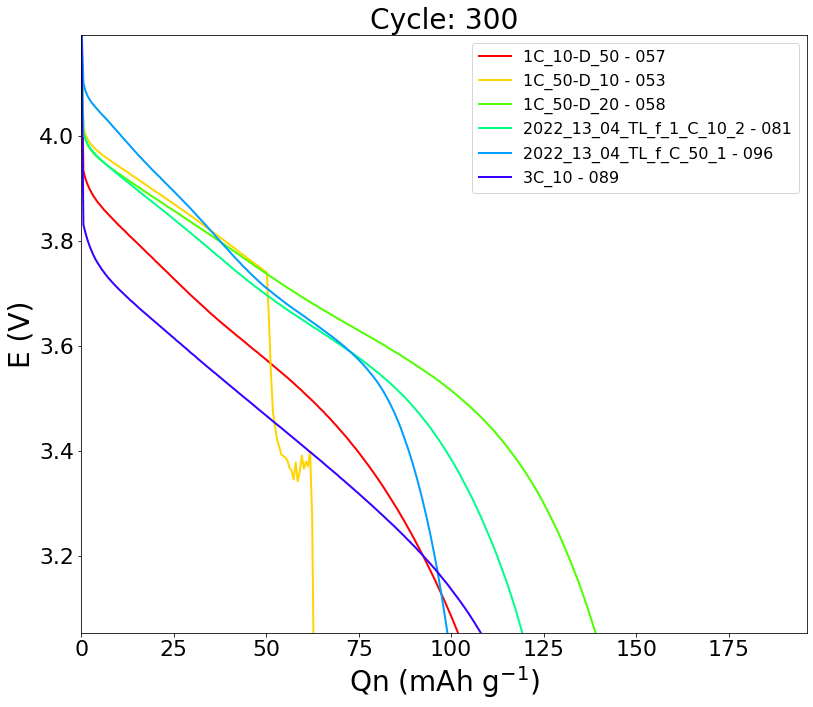

In [8]:
# Plotting (dis)charge curves

if len(dirs_cycle_life) >= 2:
    path_res_p = path_res + "\\(dis)charge curves"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    max_n_cycles = []
    for d in performance:
        for exp in performance[d]:
            n_cycle_i = int(performance[d][exp].shape[1] / 3)
            max_n_cycles.append(n_cycle_i)

    min_max_cycle = min(max_n_cycles)
    subplots = 8
    every_plot = math.floor(min_max_cycle/(subplots-1))
    cycles_to_plot = []
    for i in range(subplots-1):
        cyc = i*every_plot
        cycles_to_plot.append(cyc)
    cycles_to_plot.append(min_max_cycle-1)

    keys = []
    for exp in performance["charge"]:
        count_key = 0
        for key in performance["charge"][exp]:
            if count_key == 0:
                name_key = key.split("_E_0")[0]
                keys.append(name_key)
            else:
                break
            count_key = 1

    x_to_plot = ["Q", "Qn"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    for k in x_to_plot:
        x_maxs[k] = {}
        x_mins[k] = {}
        for d in performance:
            limits["performance"][d] = {}
            y_maxs[d] = []
            y_mins[d] = []
            x_maxs[k][d] = []
            x_mins[k][d] = []
            for c in range(len(cycles_to_plot)):
                ind_exp = 0
                cyc = cycles_to_plot[c]
                for exp in performance[d]:
                    key_i = keys[ind_exp]
                    name_i = names[ind_exp]
                    name_x = key_i + "_"+ k + "_" + str(cyc)
                    x = performance[d][exp][name_x]
                    x_maxs[k][d].append(max(x))
                    x_mins[k][d].append(min(x))
                    name_y = key_i + "_E_"+ str(cyc)
                    y = performance[d][exp][name_y]
                    y_maxs[d].append(max(y))
                    y_mins[d].append(min(y))
                    ind_exp+=1


    factor = 0.02
    for d in performance:
        limits["performance"][d]["y_up"] = max(y_maxs[d])-factor*max(y_maxs[d])
        limits["performance"][d]["y_down"] = min(y_mins[d])+factor*min(y_mins[d])
        for k in x_to_plot:
            name_up = k + "_x_up"
            name_down = k + "_x_down"
            limits["performance"][d][name_up] = max(x_maxs[k][d])
            limits["performance"][d][name_down] = min(x_mins[k][d])

    for k in x_to_plot:
        path_res_p_k = path_res_p + "\\" + k
        try: 
            os.makedirs(path_res_p_k)
        except:
            pass
        for d in performance:
            path_res_p_k_d = path_res_p_k + "\\" + d
            try: 
                os.makedirs(path_res_p_k_d)
            except:
                pass
            for c in range(len(cycles_to_plot)):
                fig = plt.figure(figsize=(13,11))
                cyc = cycles_to_plot[c]
                filename = "Comp_performance_" + str(d) + "_" + str(cyc+1)
                ind_exp = 0
                for exp in performance[d]:
                    col = ind_exp/(len(cycles_to_plot)-1)
                    key_i = keys[ind_exp]
                    name_i = names[ind_exp]
                    name_x = key_i + "_"+ k + "_" + str(cyc)
                    x = performance[d][exp][name_x]
                    name_y = key_i + "_E_"+ str(cyc)
                    y = performance[d][exp][name_y]
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
                    ind_exp+=1

                    plt.ylim([limits["performance"][d]["y_down"],limits["performance"][d]["y_up"]])
                    name_up = k + "_x_up"
                    name_down = k + "_x_down"
                    plt.xlim([0, limits["performance"][d][name_up]])

                    plt.ylabel("E (V)", fontsize=28)
                    if k == "Q":
                        plt.xlabel(k + " (mAh)", fontsize=28)
                    if k == "Qn":
                        plt.xlabel(k + " (mAh g$^{-1}$)", fontsize=28)

                title = "Cycle: " + str(cyc+1)
                plt.title(title, fontsize=28)
                plt.legend(fontsize=16) 
                plt.xticks(fontsize=22)
                plt.yticks(fontsize=22)
                path_save = path_res_p_k_d + "\\" + filename + ".png"
                plt.savefig(path_save)

In [9]:
def int_plot_dis_charge_CL(cyc, x_to_check, saving_image):
    k = x_to_check
    path_res_p_y = path_res + "\\Your_graphs"
    try: 
        os.makedirs(path_res_p_y)
    except:
        pass
    path_res_p_y_i = path_res_p_y + "\\(dis)charge curves"
    try: 
        os.makedirs(path_res_p_y_i)
    except:
        pass
    cyc = cyc-1
    for d in performance:
        fig = plt.figure(figsize=(13,11))
        filename = "Comp_performance_" + str(d) + "_" + str(cyc+1)
        ind_exp = 0
        for exp in performance[d]:
            col = ind_exp/(len(cycles_to_plot)-1)
            key_i = keys[ind_exp]
            name_i = names[ind_exp]
            name_x = key_i + "_"+ k + "_" + str(cyc)
            x = performance[d][exp][name_x]
            name_y = key_i + "_E_"+ str(cyc)
            y = performance[d][exp][name_y]
            plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
            ind_exp+=1

            plt.ylim([limits["performance"][d]["y_down"],limits["performance"][d]["y_up"]])
            name_up = k + "_x_up"
            name_down = k + "_x_down"
            plt.xlim([0, limits["performance"][d][name_up]])

            plt.ylabel("E (V)", fontsize=28)
            if k == "Q":
                plt.xlabel(k + " (mAh)", fontsize=28)
            if k == "Qn":
                plt.xlabel(k + " (mAh g$^{-1}$)", fontsize=28)

        title = "Cycle: " + str(cyc+1)
        plt.title(title, fontsize=28)
        plt.legend(fontsize=16) 
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        
        if saving_image == "Save":
            plot_save = path_res_p_y_i + "\\Comparison_" + k + "_" + d + "_" + str(cyc+1) + ".png"
            plt.savefig(plot_save)
            print(colored('Image saved', 'red', attrs=['bold']))
    
            
        plt.show()

In [10]:
if len(dirs_cycle_life) >= 2:
    save_options = ["Do no save", "Save"]
    max_cycl_plt = cycles_to_plot[-1]+1
    x_to_plot = ["Q", "Qn"]
    interact(int_plot_dis_charge_CL, cyc=(c for c in range(1,max_cycl_plt+1)), x_to_check=(xi for xi in x_to_plot), saving_image=(i for i in save_options))

interactive(children=(Dropdown(description='cyc', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …

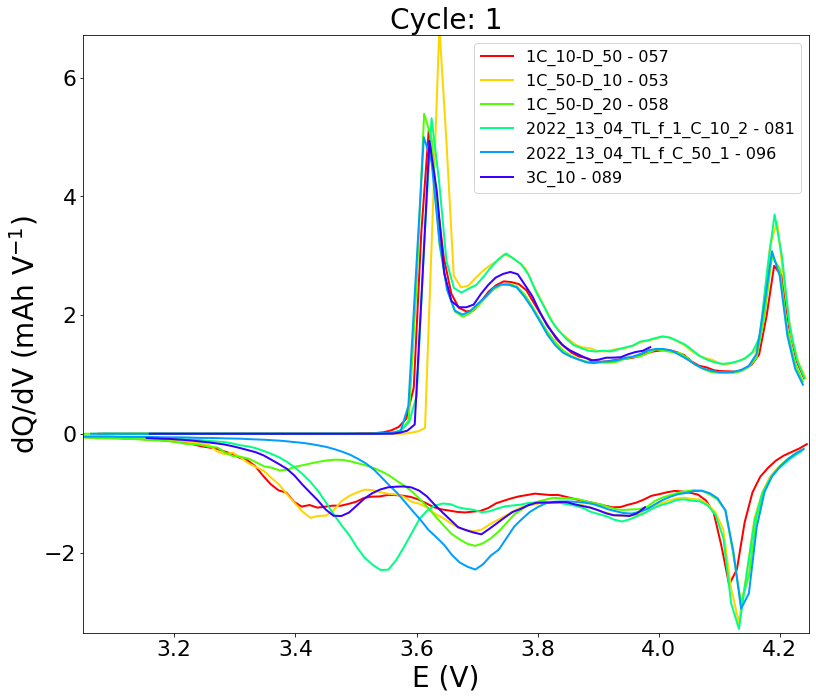

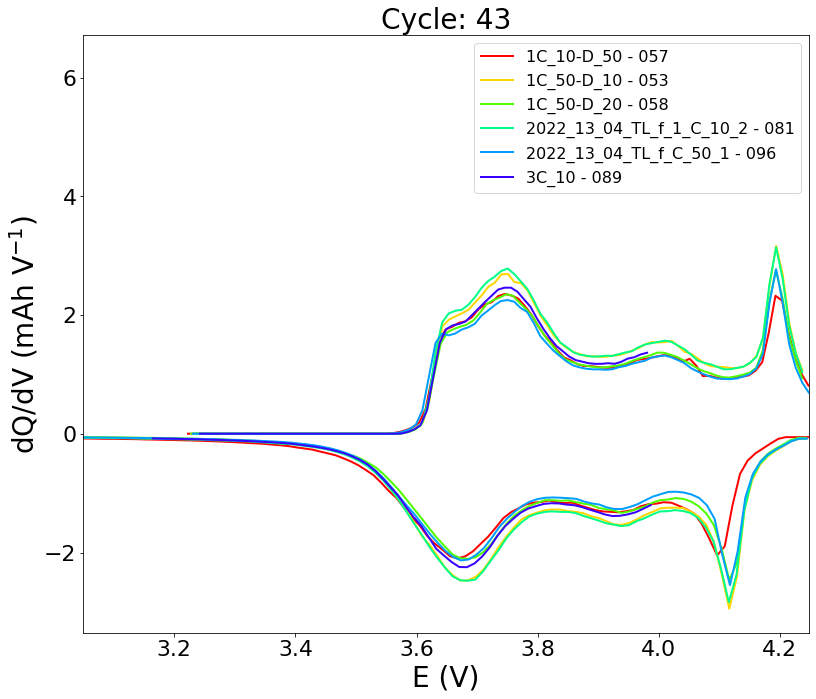

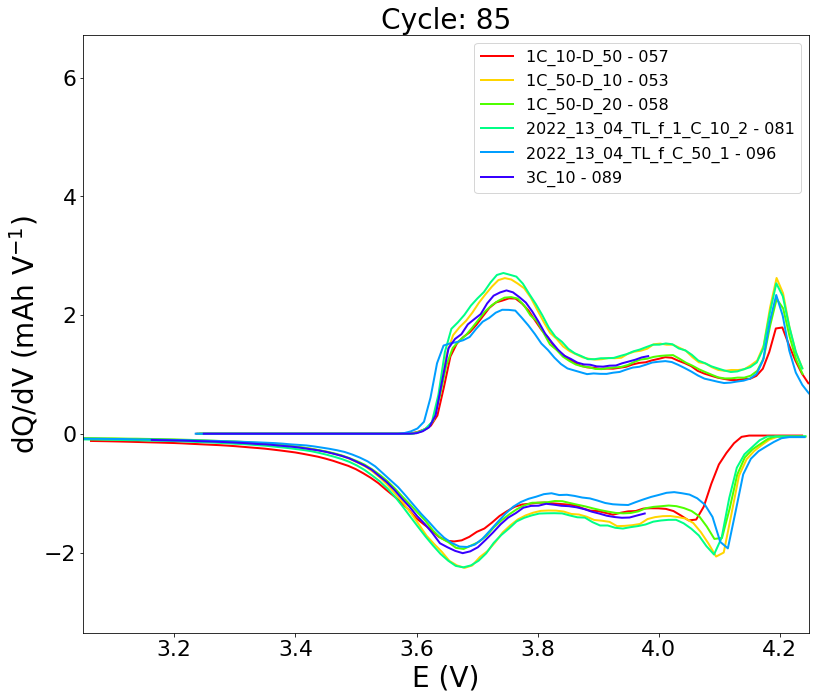

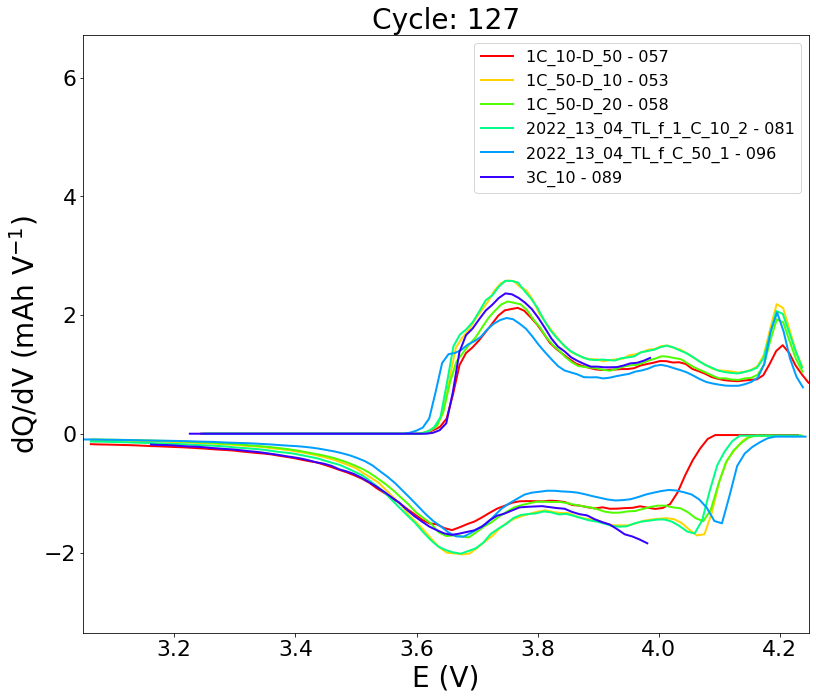

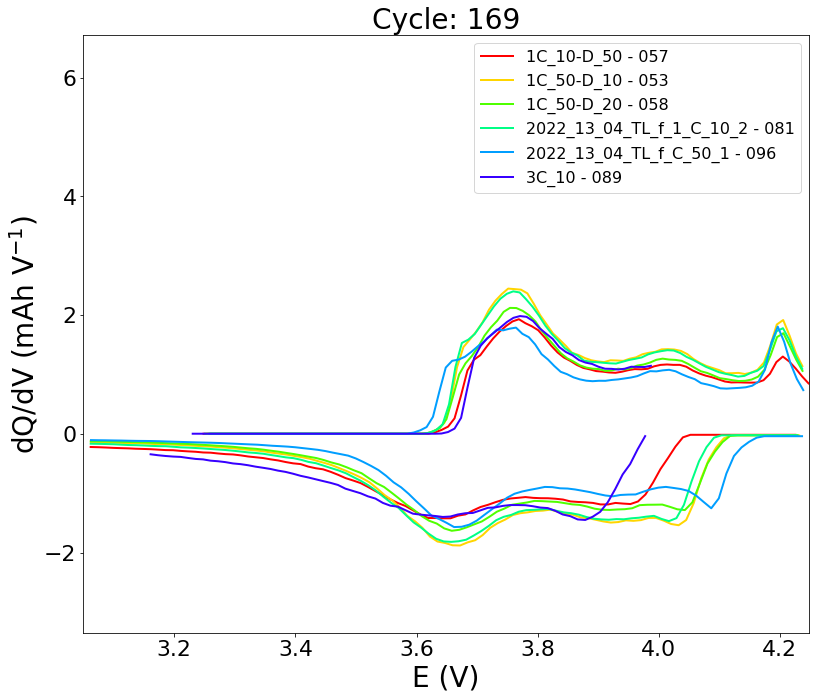

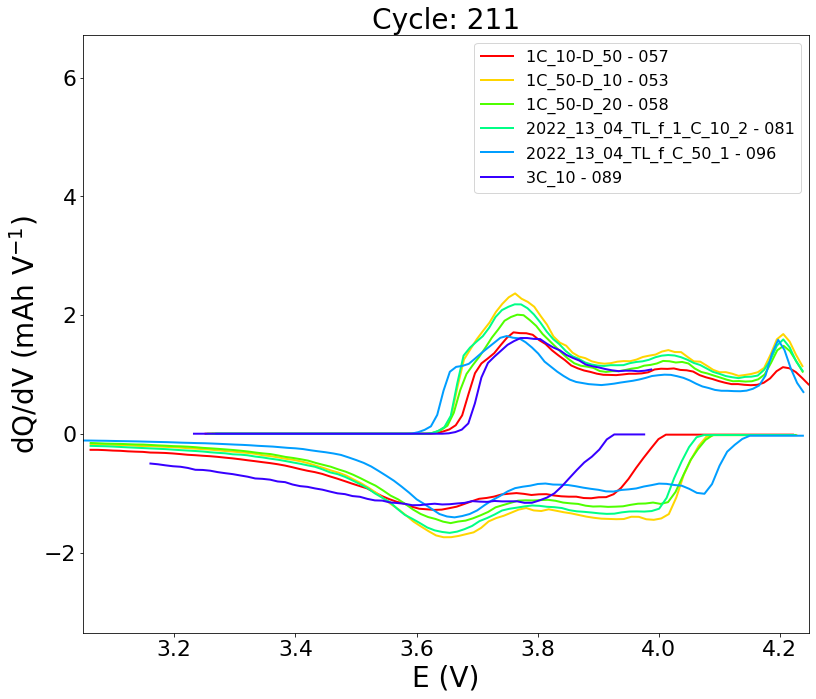

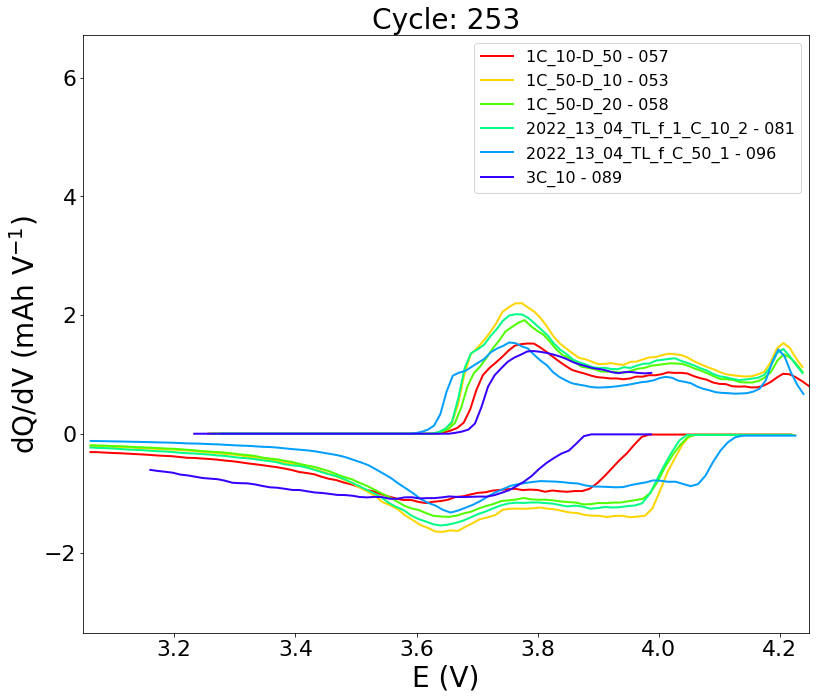

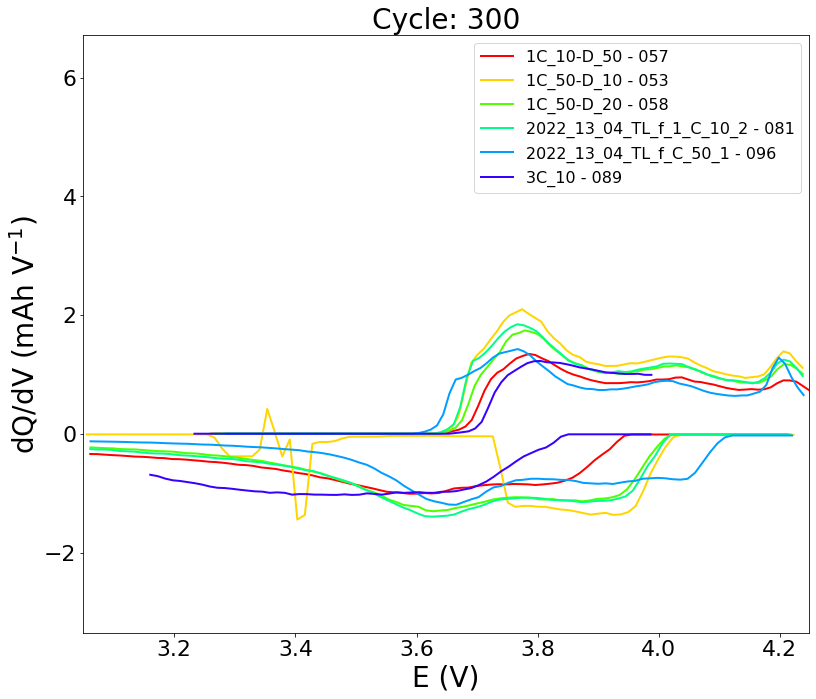

In [11]:
# Plotting dQdV curves
if len(dirs_cycle_life) >= 2:
    name_dict = "dQdV"
    dict_i = dQdV
    path_res_p = path_res + "\\dQdV"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    y_to_plot = "dQdV"
    x_to_plot = "E"
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    limits[name_dict] = {}
    y_maxs = []
    y_mins = []
    x_maxs = []
    x_mins = []
    for c in range(len(cycles_to_plot)):
        ind_exp = 0
        cyc = cycles_to_plot[c]
        for d in dict_i:
            for exp in dict_i[d]:
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = key_i + "_"+ x_to_plot + "_" + str(cyc)
                x = dict_i[d][exp][name_x]
                x_maxs.append(max(x))
                x_mins.append(min(x))
                name_y = key_i + "_"+ y_to_plot + "_" + str(cyc)
                y = dict_i[d][exp][name_y]
                y_maxs.append(max(y))
                y_mins.append(min(y))
            ind_exp+=1


    factor = 0.02
    limits[name_dict]["y_up"] = max(y_maxs)-factor*max(y_maxs)
    limits[name_dict]["y_down"] = min(y_mins)+factor*min(y_mins)
    limits[name_dict]["x_up"] = max(x_maxs)
    limits[name_dict]["x_down"] = min(x_mins)


    for c in range(len(cycles_to_plot)):
        fig = plt.figure(figsize=(13,11))
        cyc = cycles_to_plot[c]
        filename = "Comp_" + name_dict + "_" + str(cyc+1)
        ind_exp = 0
        for exp in dict_i["charge"]:
            for d in dict_i: 
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = key_i + "_"+ x_to_plot + "_" + str(cyc)
                x = dict_i[d][exp][name_x]
                name_y = key_i + "_"+ y_to_plot + "_" + str(cyc)
                y = dict_i[d][exp][name_y]
                if d == "charge":
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
                else:
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col))
            ind_exp+=1

            plt.ylim([limits[name_dict]["y_down"],limits[name_dict]["y_up"]])
            plt.xlim([limits[name_dict]["x_down"], limits[name_dict]["x_up"]])
            plt.ylabel("dQ/dV (mAh V$^{-1}$)", fontsize=28)
            plt.xlabel("E (V)", fontsize=28)

            title = "Cycle: " + str(cyc+1)
            plt.title(title, fontsize=28)
            plt.legend(fontsize=16) 
            plt.xticks(fontsize=22)
            plt.yticks(fontsize=22)
            path_save = path_res_p + "\\" + filename  + ".png"
            plt.savefig(path_save)

In [12]:
def int_plot_dis_dQdV_CL(cyc, saving_image):
    path_res_p_y = path_res + "\\Your_graphs"
    try: 
        os.makedirs(path_res_p_y)
    except:
        pass
    path_res_p_y_i = path_res_p_y + "\\dQdV"
    try: 
        os.makedirs(path_res_p_y_i)
    except:
        pass
    cyc = cyc-1
    name_dict = "dQdV"
    dict_i = dQdV
    y_to_plot = "dQdV"
    x_to_plot = "E"
    for d in performance:
        fig = plt.figure(figsize=(13,11))
        filename = "dQdV_"+ str(cyc+1)
        ind_exp = 0
        for exp in dict_i["charge"]:
            for d in dict_i: 
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = key_i + "_"+ x_to_plot + "_" + str(cyc)
                x = dict_i[d][exp][name_x]
                name_y = key_i + "_"+ y_to_plot + "_" + str(cyc)
                y = dict_i[d][exp][name_y]
                if d == "charge":
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
                else:
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col))
            ind_exp+=1

            plt.ylim([limits[name_dict]["y_down"],limits[name_dict]["y_up"]])
            plt.xlim([limits[name_dict]["x_down"], limits[name_dict]["x_up"]])
            plt.ylabel("dQ/dV (mAh V$^{-1}$)", fontsize=28)
            plt.xlabel("E (V)", fontsize=28)

            title = "Cycle: " + str(cyc+1)
            plt.title(title, fontsize=28)
            plt.legend(fontsize=16) 
            plt.xticks(fontsize=22)
            plt.yticks(fontsize=22)
        
        if saving_image == "Save":
            plot_save = path_res_p_y_i + "\\Comparison_" + filename + ".png"
            plt.savefig(plot_save)
            print(colored('Image saved', 'red', attrs=['bold']))
    
            
        plt.show()

In [13]:
if len(dirs_cycle_life) >= 2:
    save_options = ["Do no save", "Save"]
    max_cycl_plt = cycles_to_plot[-1]+1
    interact(int_plot_dis_dQdV_CL, cyc=(c for c in range(1,max_cycl_plt+1)), saving_image=(i for i in save_options))

interactive(children=(Dropdown(description='cyc', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …

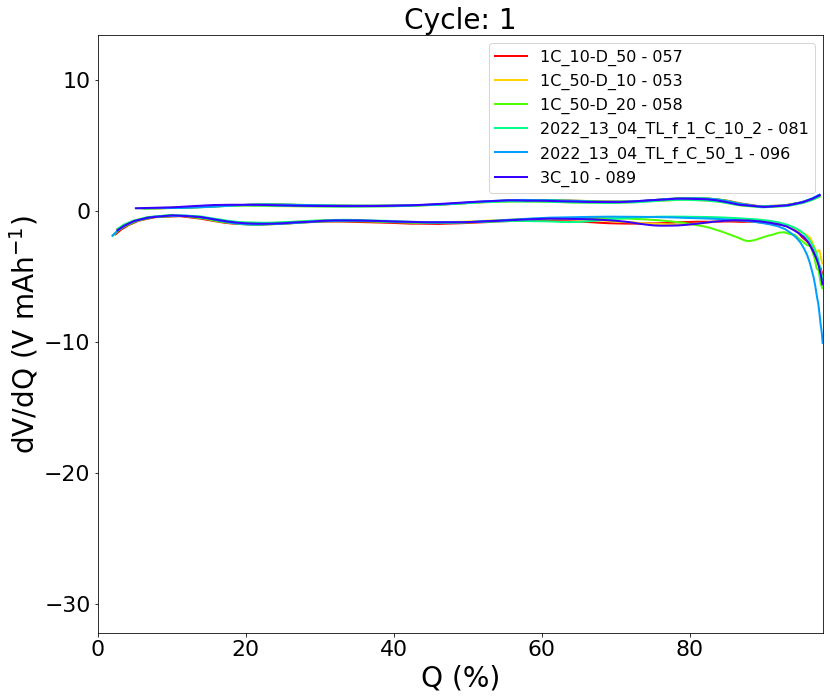

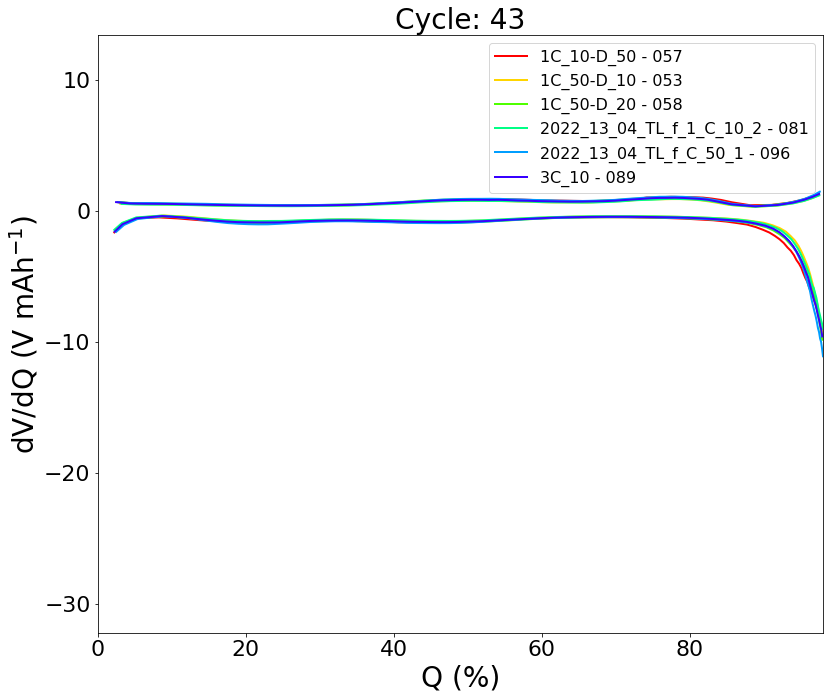

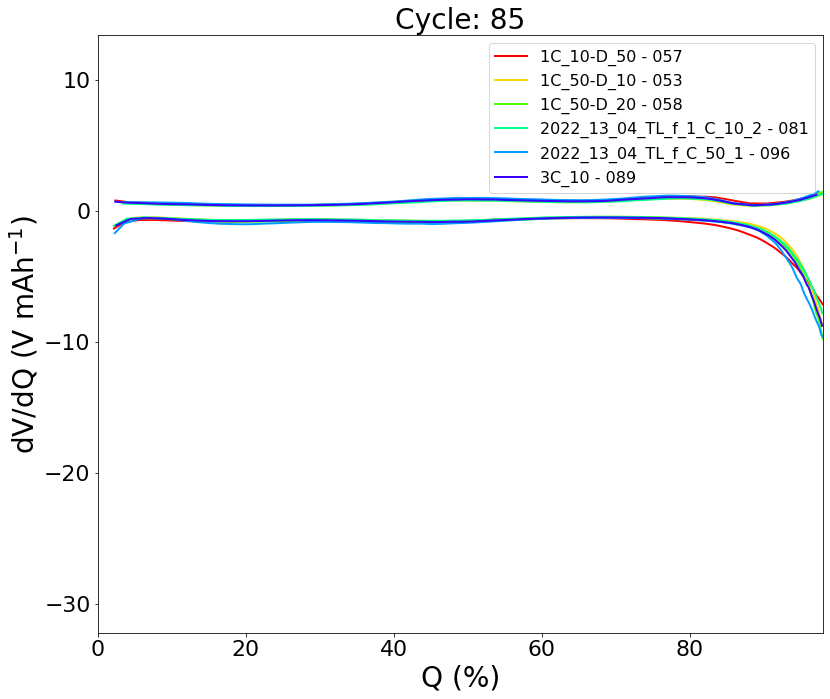

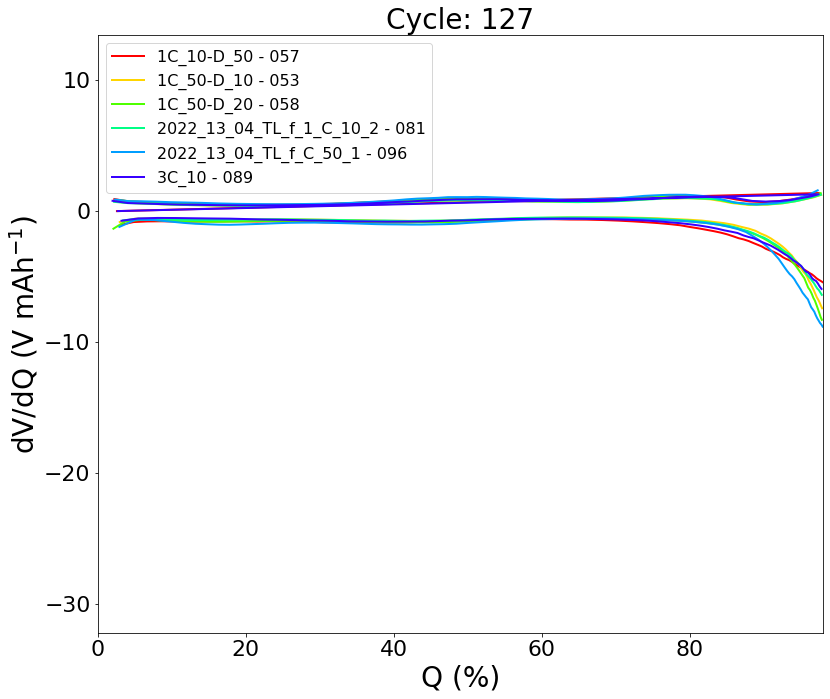

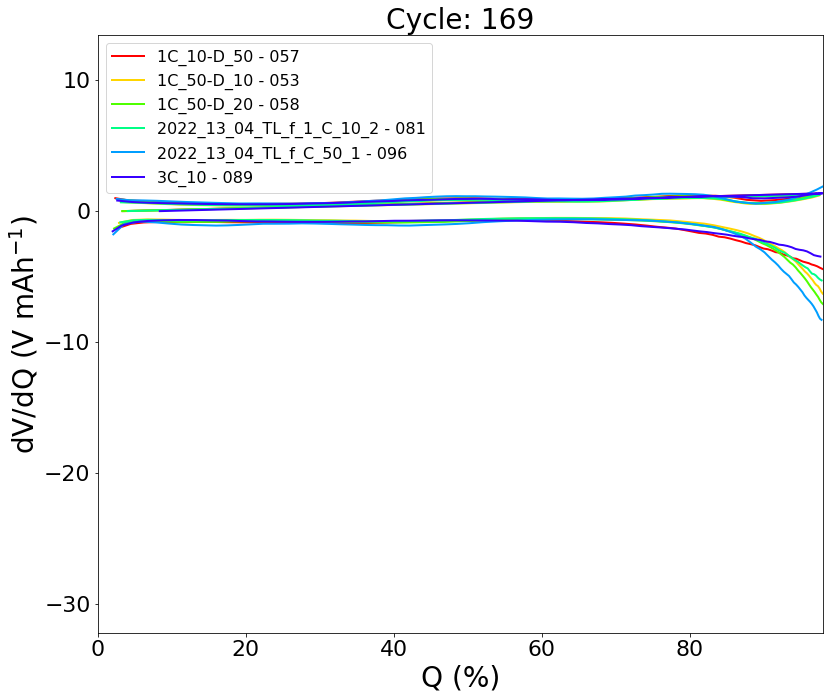

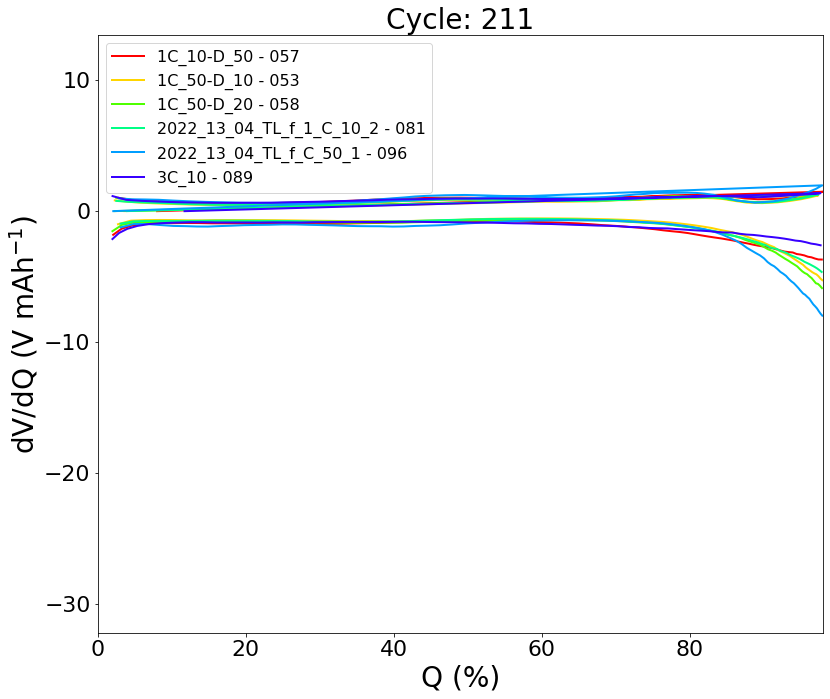

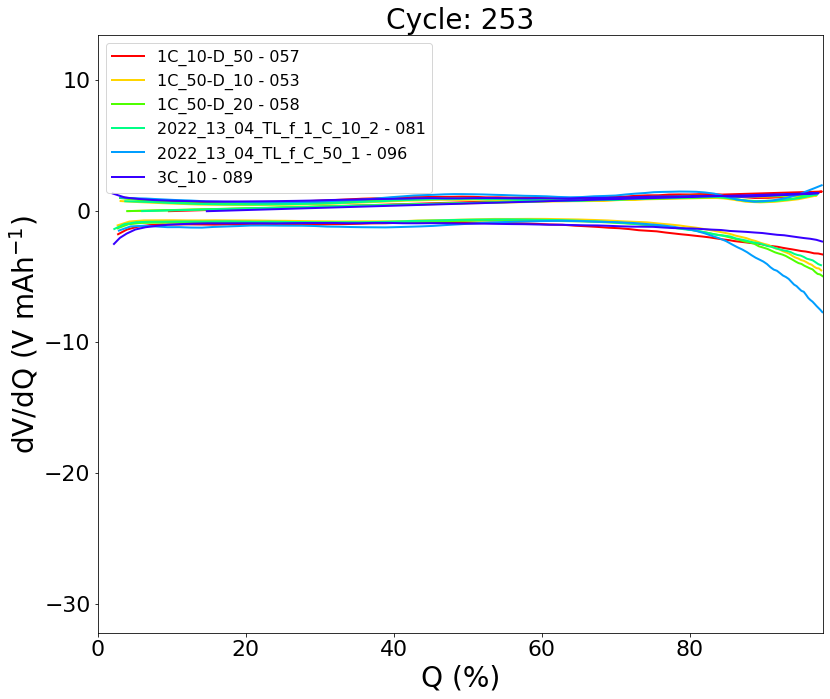

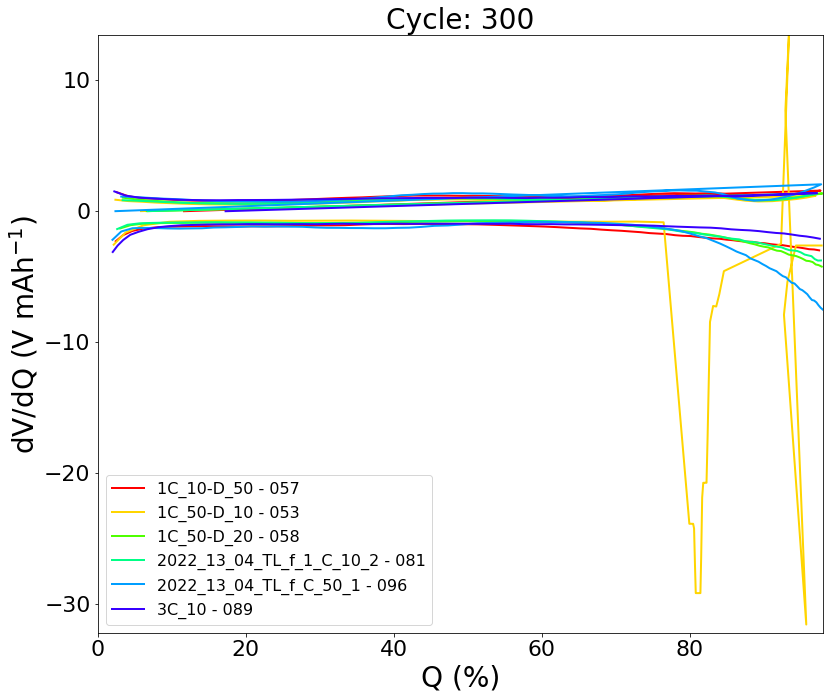

In [14]:
# Plotting dVdQ curves - cutting data to be performed on CAP level (to be tested)
if len(dirs_cycle_life) >= 2:
    name_dict = "dVdQ"
    dict_i = dVdQ
    path_res_p = path_res + "\\dVdQ"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    y_to_plot = "dVdQ"
    x_to_plot = "Q"
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    limits[name_dict] = {}
    y_maxs = []
    y_mins = []
    x_maxs = []
    x_mins = []
    for c in range(len(cycles_to_plot)):
        ind_exp = 0
        cyc = cycles_to_plot[c]
        for d in dict_i:
            for exp in dict_i[d]:
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = key_i + "_"+ x_to_plot + "_" + str(cyc)
                x = dict_i[d][exp][name_x]
                x_maxs.append(max(x))
                x_mins.append(min(x))
                name_y = key_i + "_"+ y_to_plot + "_" + str(cyc)
                y = dict_i[d][exp][name_y]
                y_maxs.append(max(y))
                y_mins.append(min(y))
            ind_exp+=1


    factor = 0.02
    limits[name_dict]["y_up"] = max(y_maxs)-factor*max(y_maxs)
    limits[name_dict]["y_down"] = min(y_mins)+factor*min(y_mins)
    limits[name_dict]["x_up"] = max(x_maxs)
    limits[name_dict]["x_down"] = min(x_mins)


    for c in range(len(cycles_to_plot)):
        fig = plt.figure(figsize=(13,11))
        cyc = cycles_to_plot[c]
        filename = "Comp_" + name_dict + "_" + str(cyc+1)
        ind_exp = 0
        for exp in dict_i["charge"]:
            for d in dict_i: 
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = key_i + "_"+ x_to_plot + "_" + str(cyc)
                x = dict_i[d][exp][name_x]
                name_y = key_i + "_"+ y_to_plot + "_" + str(cyc)
                y = dict_i[d][exp][name_y]
                if d == "charge":
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
                else:
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col))
            ind_exp+=1

            plt.ylim([limits[name_dict]["y_down"],limits[name_dict]["y_up"]])
            plt.xlim([0, limits[name_dict]["x_up"]])
            plt.ylabel("dV/dQ (V mAh$^{-1}$)", fontsize=28)
            plt.xlabel("Q (%)", fontsize=28)

            title = "Cycle: " + str(cyc+1)
            plt.title(title, fontsize=28)
            plt.legend(fontsize=16) 
            plt.xticks(fontsize=22)
            plt.yticks(fontsize=22)
            path_save = path_res_p + "\\" + filename  + ".png"
            plt.savefig(path_save)

In [15]:
def int_plot_dis_dVdQ_CL(cyc, saving_image):
    path_res_p_y = path_res + "\\Your_graphs"
    try: 
        os.makedirs(path_res_p_y)
    except:
        pass
    path_res_p_y_i = path_res_p_y + "\\dVdQ"
    try: 
        os.makedirs(path_res_p_y_i)
    except:
        pass
    cyc = cyc-1
    name_dict = "dVdQ"
    dict_i = dVdQ
    y_to_plot = "dVdQ"
    x_to_plot = "Q"
    for d in performance:
        fig = plt.figure(figsize=(13,11))
        filename = "dVdQ_"+ str(cyc+1)
        ind_exp = 0
        for exp in dict_i["charge"]:
            for d in dict_i: 
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = key_i + "_"+ x_to_plot + "_" + str(cyc)
                x = dict_i[d][exp][name_x]
                name_y = key_i + "_"+ y_to_plot + "_" + str(cyc)
                y = dict_i[d][exp][name_y]
                if d == "charge":
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
                else:
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col))
            ind_exp+=1

            plt.ylim([limits[name_dict]["y_down"],limits[name_dict]["y_up"]])
            plt.xlim([0, limits[name_dict]["x_up"]])
            plt.ylabel("dV/dQ (V mAh$^{-1}$)", fontsize=28)
            plt.xlabel("Q (%)", fontsize=28)

            title = "Cycle: " + str(cyc+1)
            plt.title(title, fontsize=28)
            plt.legend(fontsize=16) 
            plt.xticks(fontsize=22)
            plt.yticks(fontsize=22)
        
        if saving_image == "Save":
            plot_save = path_res_p_y_i + "\\Comparison_" + filename + ".png"
            plt.savefig(plot_save)
            print(colored('Image saved', 'red', attrs=['bold']))
    
            
        plt.show()

In [16]:
if len(dirs_cycle_life) >= 2:
    save_options = ["Do no save", "Save"]
    max_cycl_plt = cycles_to_plot[-1]+1
    interact(int_plot_dis_dVdQ_CL, cyc=(c for c in range(1,max_cycl_plt+1)), saving_image=(i for i in save_options))

interactive(children=(Dropdown(description='cyc', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …

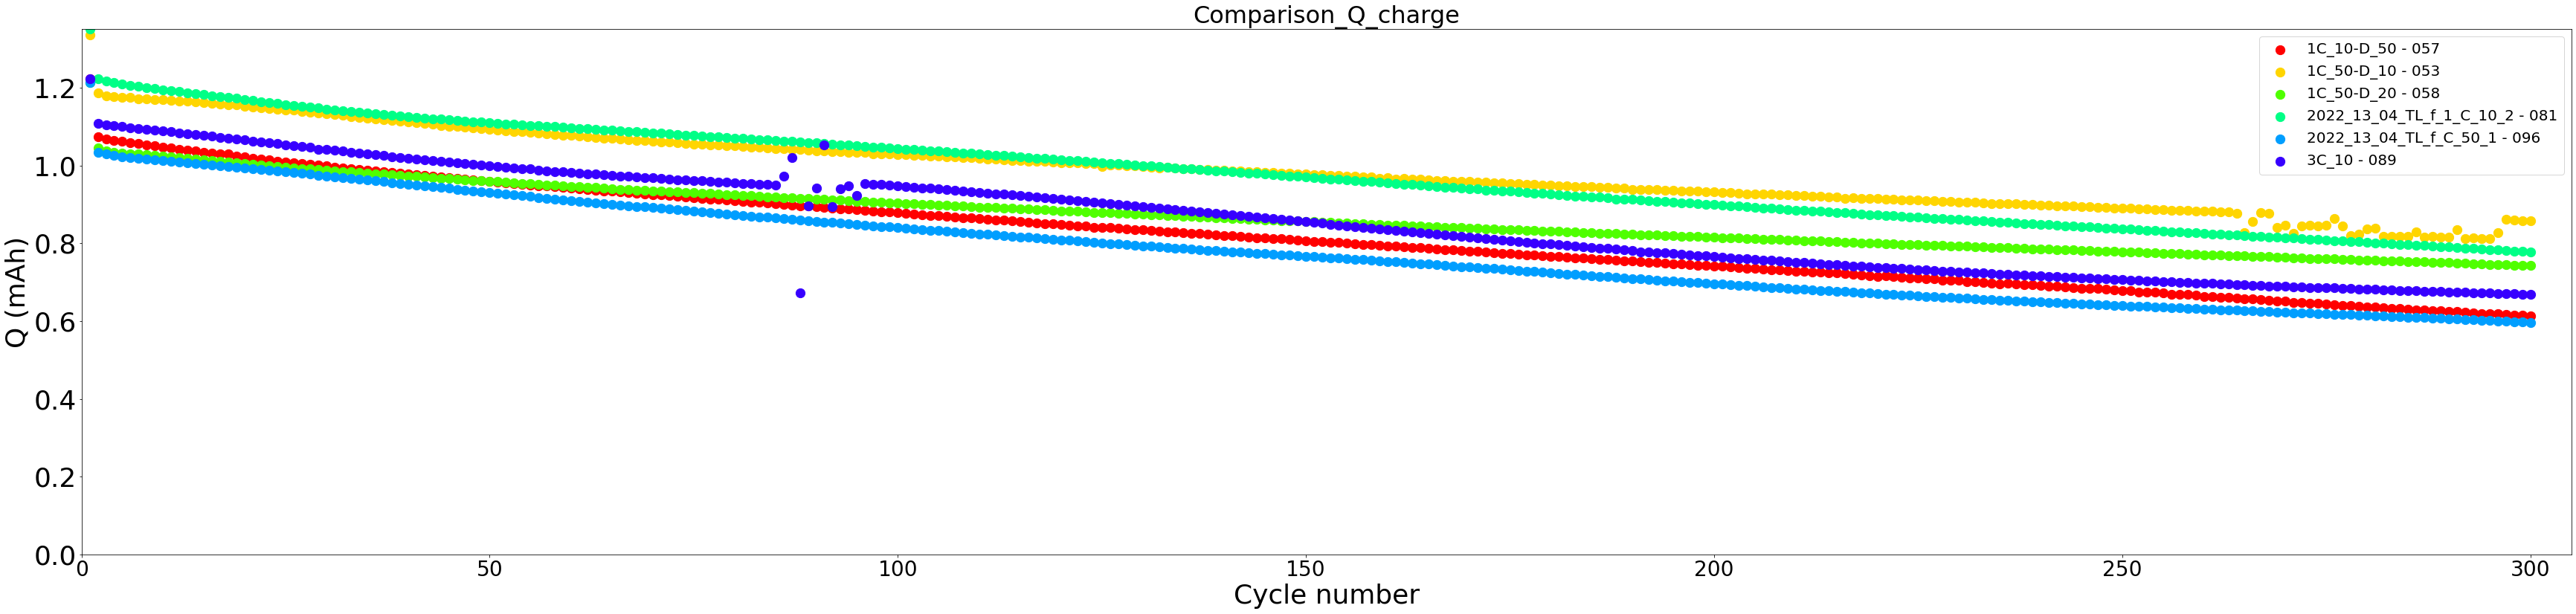

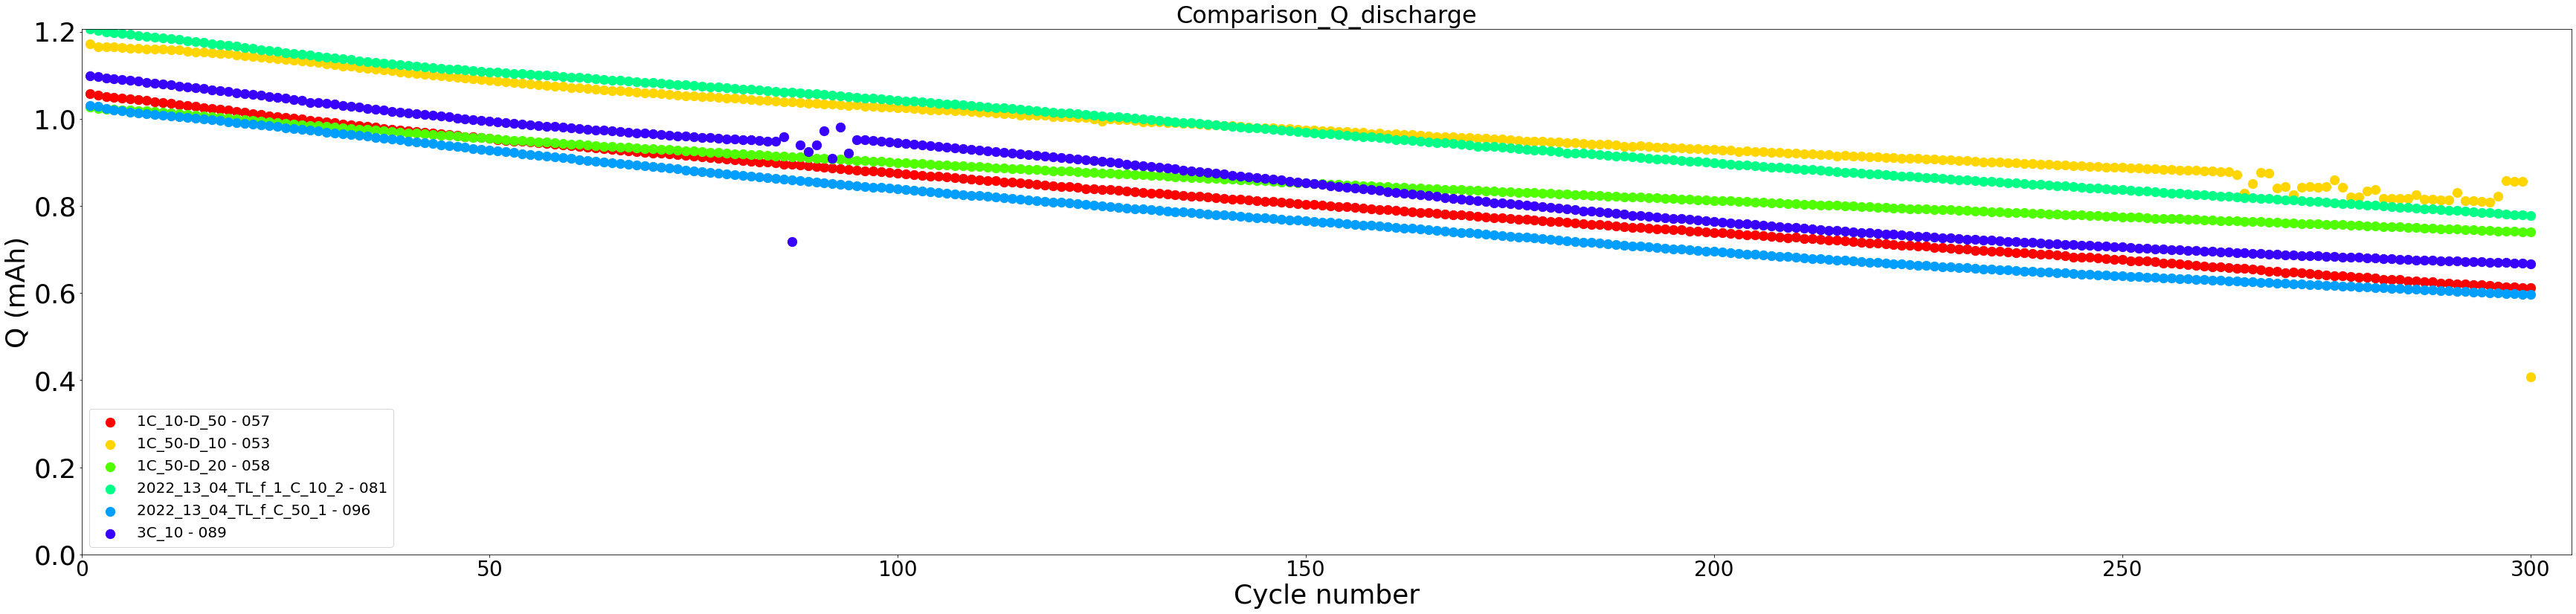

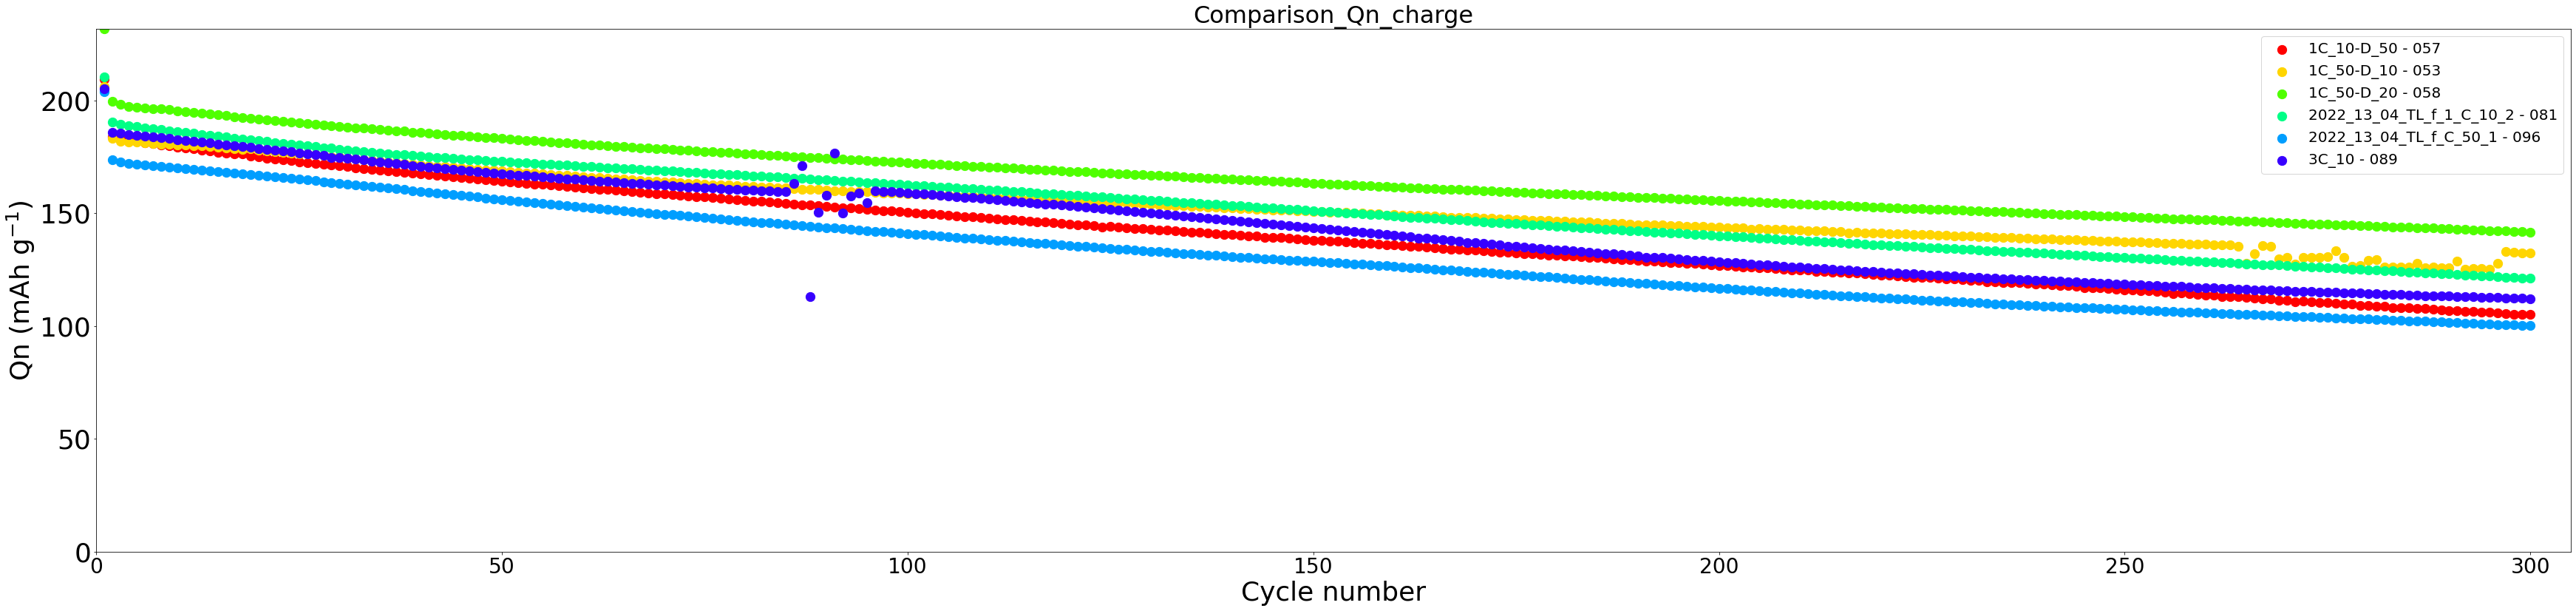

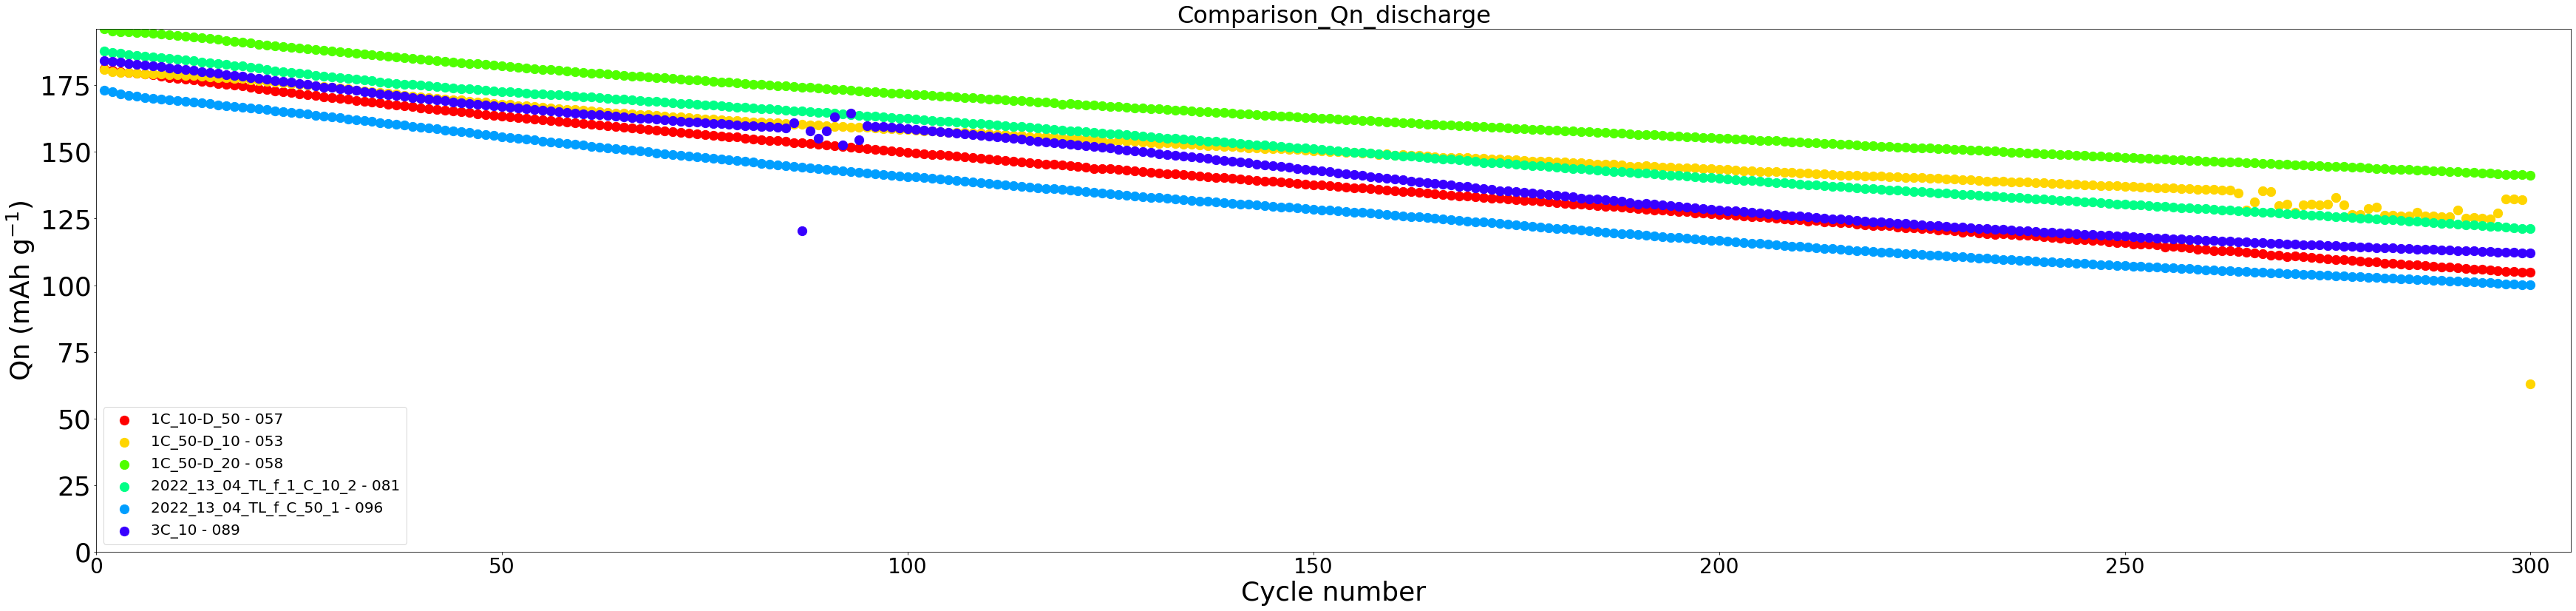

In [17]:
# Plotting (dis)charge capacity as a function of cycling number
if len(dirs_cycle_life) >= 2:
    path_res_p = path_res + "\\End of (dis)charge"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    name_dict = "end_capacity"
    dict_i = end_capacity
    y_to_plot = ["Q", "Qn"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    max_cycle = 0
    for k in y_to_plot:
        y_maxs[k] = {}
        y_mins[k] = {}
        for d in dict_i:
            limits[name_dict][d] = {}
            x_maxs[d] = []
            x_mins[d] = []
            y_maxs[k][d] = []
            y_mins[k][d] = []
            for c in range(len(cycles_to_plot)):
                ind_exp = 0
                cyc = cycles_to_plot[c]
                for exp in dict_i[d]:
                    key_i = keys[ind_exp]
                    name_i = names[ind_exp]
                    name_x = "Cycle number"
                    x = dict_i[d][exp][name_x]
                    lenx = len(x)
                    if lenx > max_cycle:
                        max_cycle = lenx
                    x_maxs[d].append(max(x))
                    x_mins[d].append(min(x))
                    name_y = k
                    y = dict_i[d][exp][name_y]
                    y_maxs[k][d].append(max(y))
                    y_mins[k][d].append(min(y))
                    ind_exp+=1


    factor = 5
    for d in dict_i:
        limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
        limits[name_dict][d]["x_down"] = min(x_mins[d])
        for k in y_to_plot:
            name_up = k + "_y_up"
            name_down = k + "_y_down"
            limits[name_dict][d][name_up] = max(y_maxs[k][d])
            limits[name_dict][d][name_down] = min(y_mins[k][d])

    for k in y_to_plot:
        path_res_p_k = path_res_p + "\\" + k
        try: 
            os.makedirs(path_res_p_k)
        except:
            pass
        for d in dict_i:
            if max_cycle > 55:
                fig = plt.figure(figsize=(max_cycle/5, 13))
            else:
                fig = plt.figure(figsize=(11, 9))
            filename = "Comp_" + name_dict + "_" + str(d) 
            ind_exp = 0
            for exp in dict_i[d]:
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                name_y = k
                y = dict_i[d][exp][name_y]
                plt.scatter(x,y, s=150, color=plt.cm.hsv(col), label=name_i, marker = "o")
                ind_exp+=1

                plt.xlim([0,limits[name_dict][d]["x_up"]])
                name_up = k + "_y_up"
                name_down = k + "_y_down"
                plt.ylim([0, limits[name_dict][d][name_up]])

                plt.xlabel("Cycle number", fontsize=36)
                if k == "Q":
                    plt.ylabel(k + " (mAh)", fontsize=36)
                if k == "Qn":
                    plt.ylabel(k + " (mAh g$^{-1}$)", fontsize=36)

            title = "Comparison_" + k + "_" + d
            plt.title(title, fontsize = 32)
            plt.legend(fontsize=20) 
            plt.xticks(fontsize=28)
            plt.yticks(fontsize=36)
            path_save = path_res_p_k + "\\" + filename + ".png"
            plt.savefig(path_save)

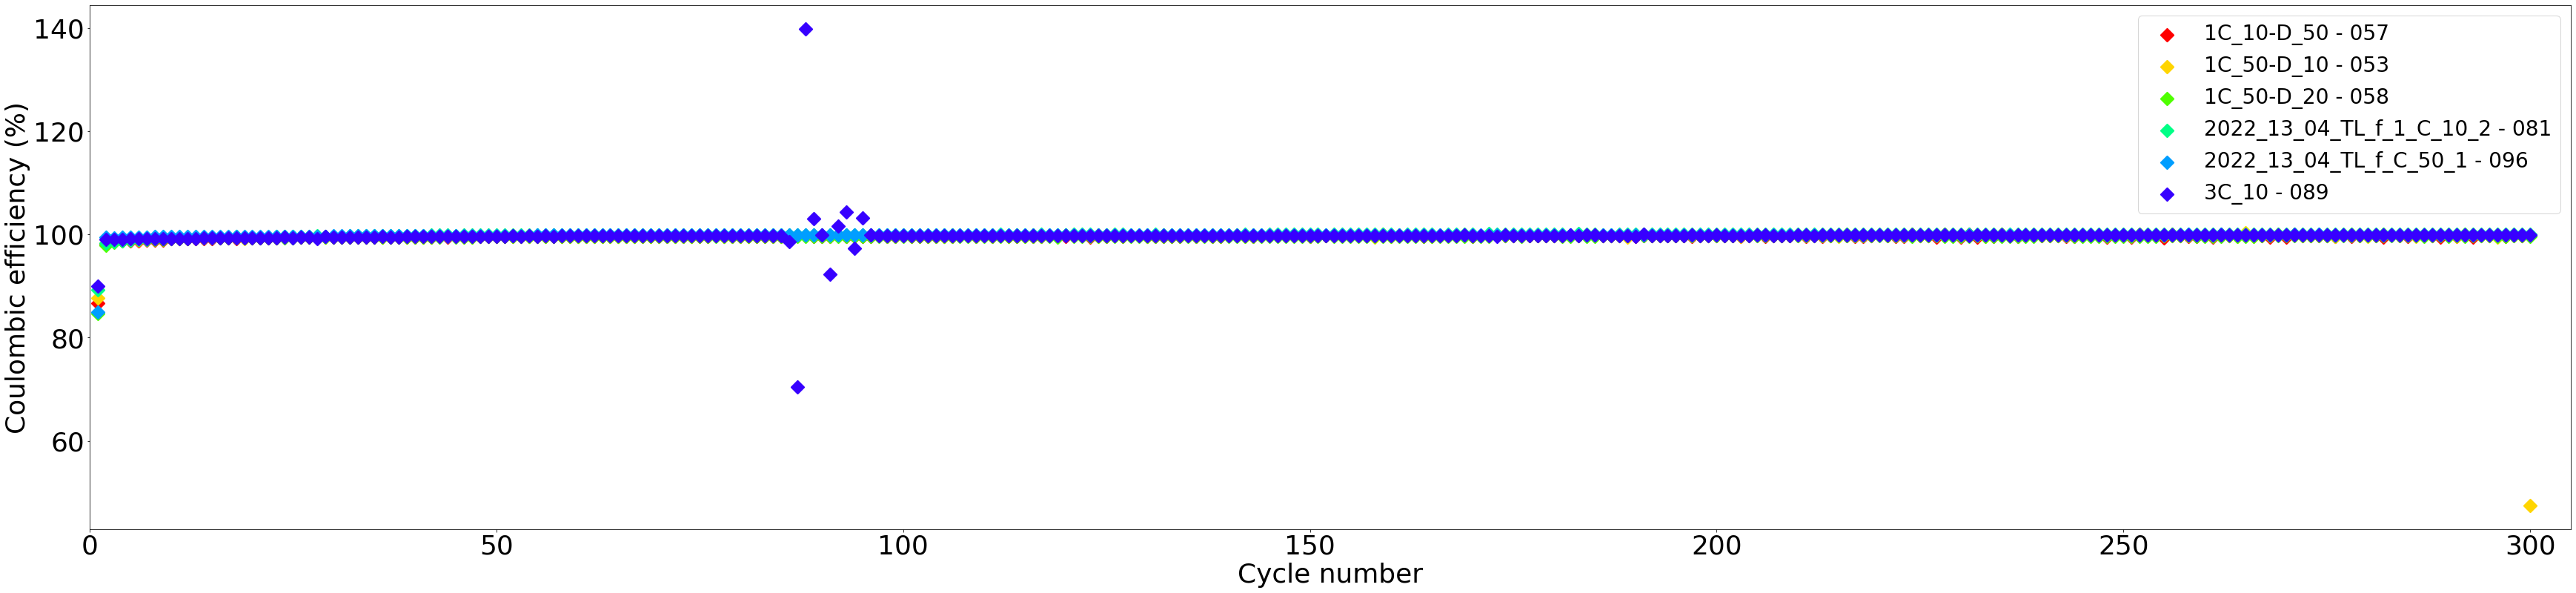

In [18]:
# Plotting Coulombic efficiency as a function of cycling number
if len(dirs_cycle_life) >= 2:
    path_res_p = path_res + "\\End of (dis)charge"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    name_dict = "Q_efficiency"
    dict_i = Q_efficiency
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    max_cycle = 0
    for d in dict_i:
        limits[name_dict][d] = {}
        x_maxs[d] = []
        x_mins[d] = []
        y_maxs[d] = []
        y_mins[d] = []
        for c in range(len(cycles_to_plot)):
            ind_exp = 0
            cyc = cycles_to_plot[c]
            for exp in dict_i[d]:
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                lenx = len(x)
                if lenx > max_cycle:
                    max_cycle = lenx
                x_maxs[d].append(max(x))
                x_mins[d].append(min(x))
                name_y = "Coulombic efficiency (%)"
                y = dict_i[d][exp][name_y]
                y_maxs[d].append(max(y))
                y_mins[d].append(min(y))
                ind_exp+=1


    factor = 5
    for d in dict_i:
        limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
        limits[name_dict][d]["x_down"] = min(x_mins[d])
        limits[name_dict][d]["y_up"] = max(y_maxs[d])
        limits[name_dict][d]["y_down"] = min(y_mins[d])

    for d in dict_i:
        if max_cycle > 55:
            fig = plt.figure(figsize=(max_cycle/5, 13))
        else:
            fig = plt.figure(figsize=(11, 9))
        filename = "Comp_Coulombic efficiency_" + str(d) 
        ind_exp = 0
        for exp in dict_i[d]:
            col = ind_exp/(len(cycles_to_plot)-1)
            key_i = keys[ind_exp]
            name_i = names[ind_exp]
            name_x = "Cycle number"
            x = dict_i[d][exp][name_x]
            name_y = "Coulombic efficiency (%)"
            y = dict_i[d][exp][name_y]
            plt.scatter(x,y,linewidth=2, s=150, color=plt.cm.hsv(col), label=name_i, marker = "D")
            ind_exp+=1

            plt.xlim([0,limits[name_dict][d]["x_up"]])
            #plt.ylim([0, limits[name_dict][d]["y_up"]])

            plt.xlabel("Cycle number", fontsize=36)
            plt.ylabel("Coulombic efficiency (%)", fontsize=36)

            plt.legend(fontsize=28) 
            plt.xticks(fontsize=36)
            plt.yticks(fontsize=36)
            path_save = path_res_p + "\\" + filename + ".png"
            plt.savefig(path_save)

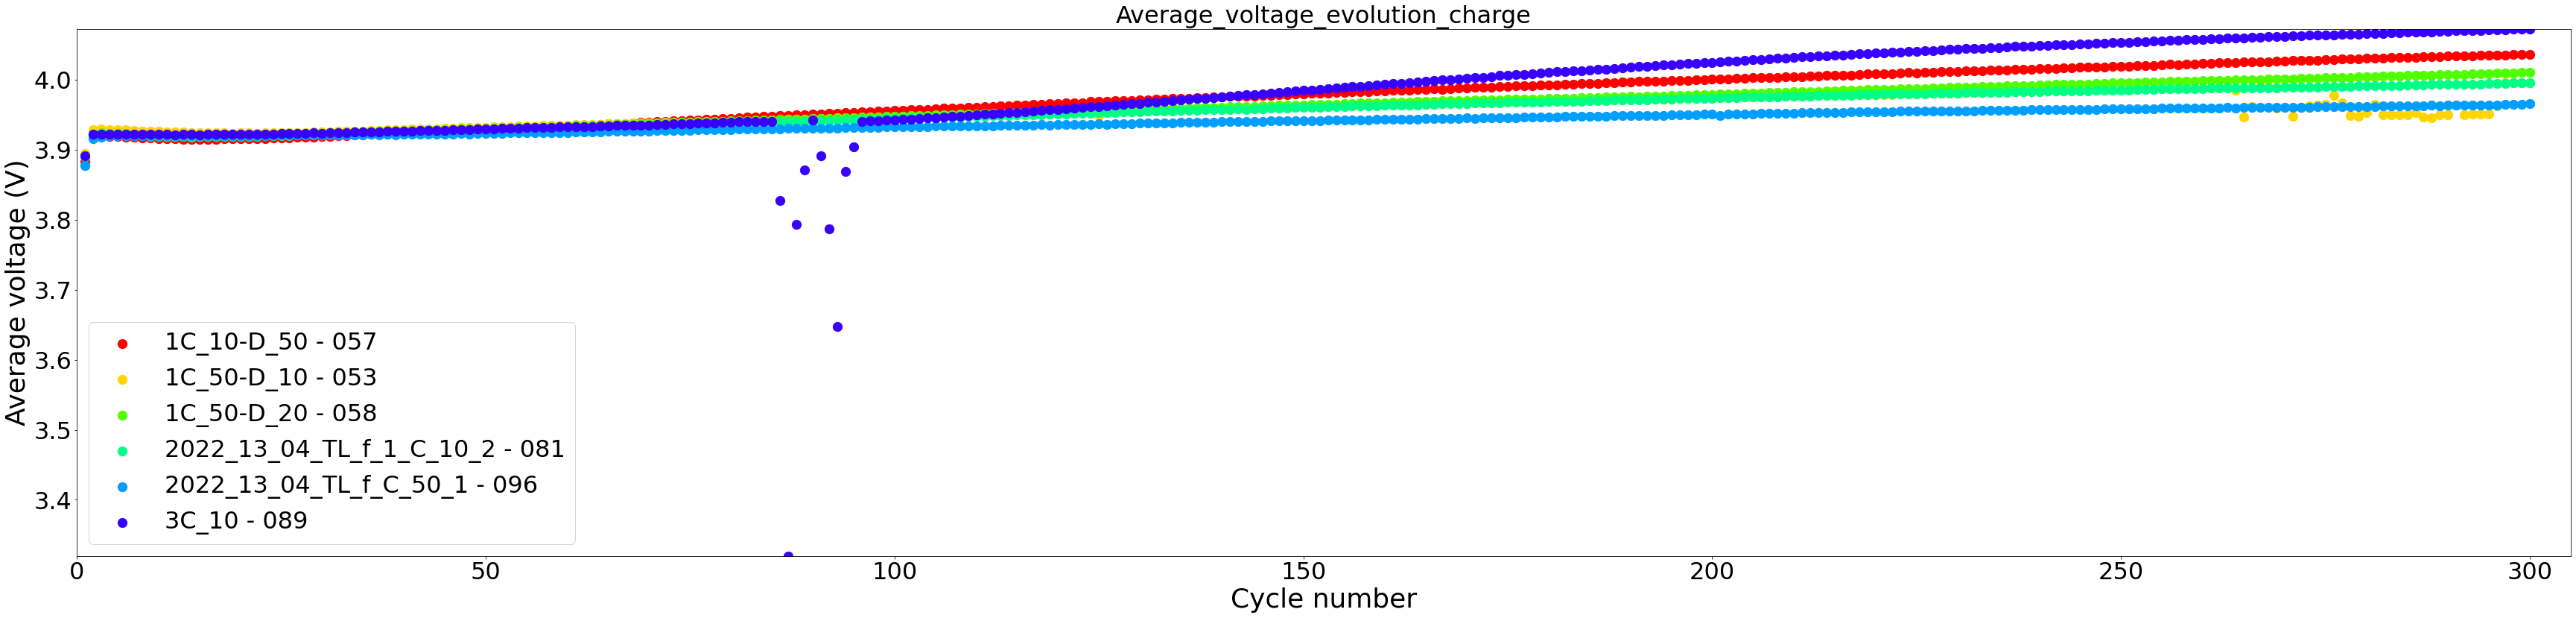

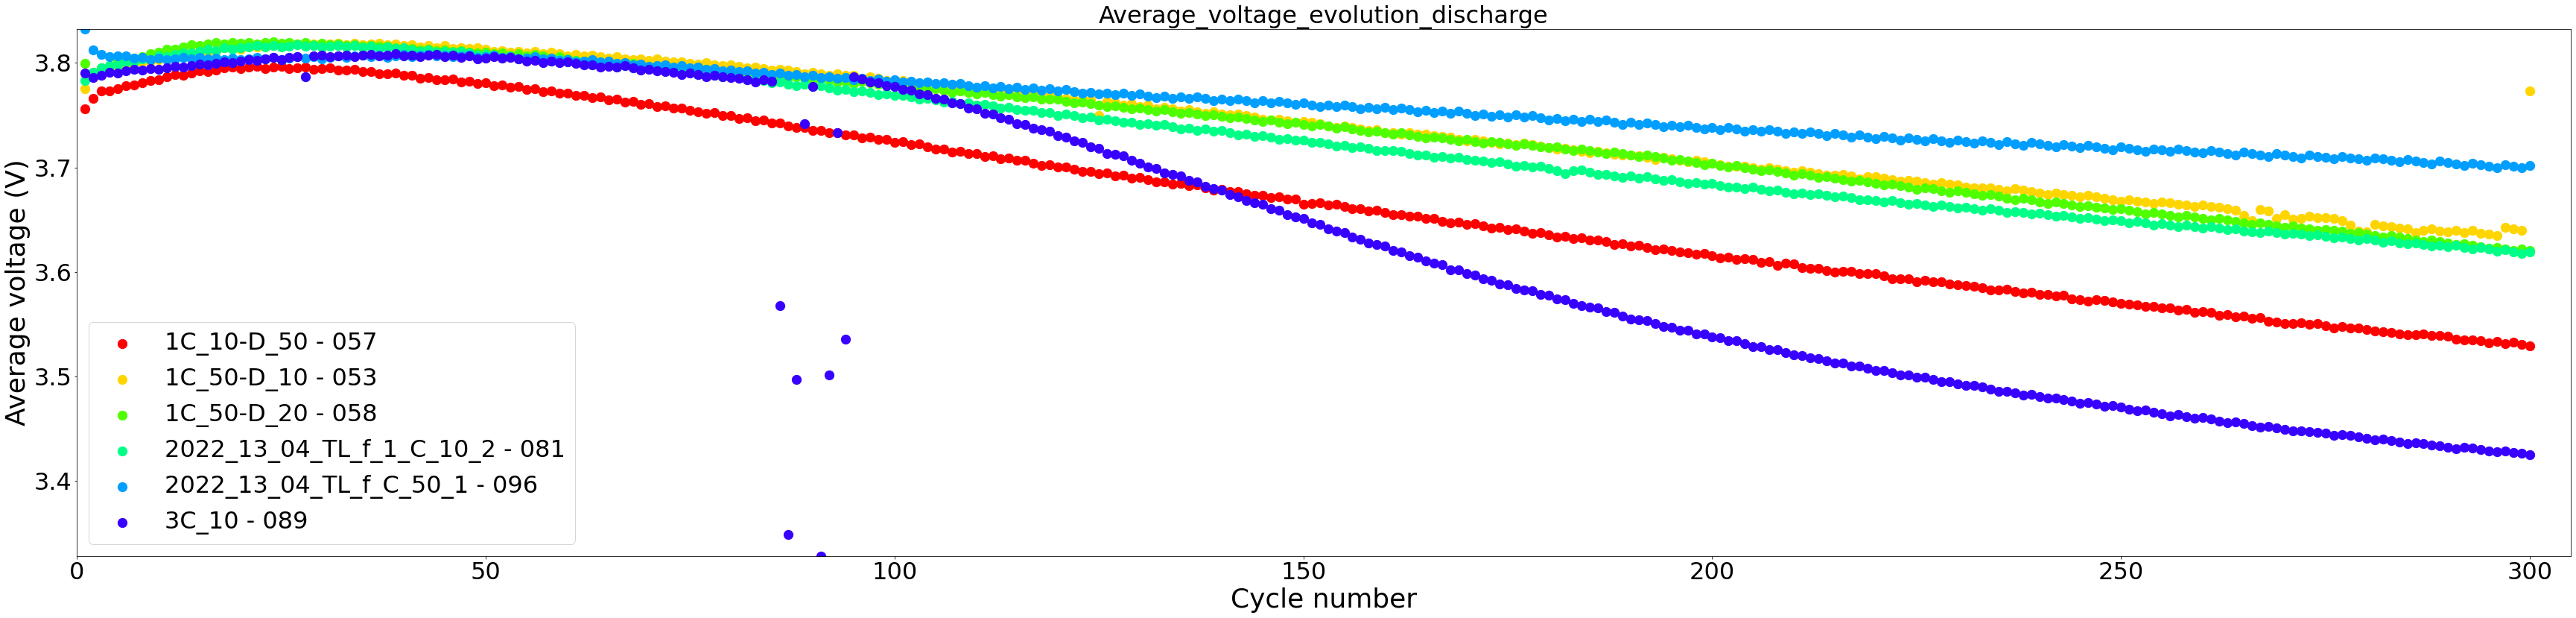

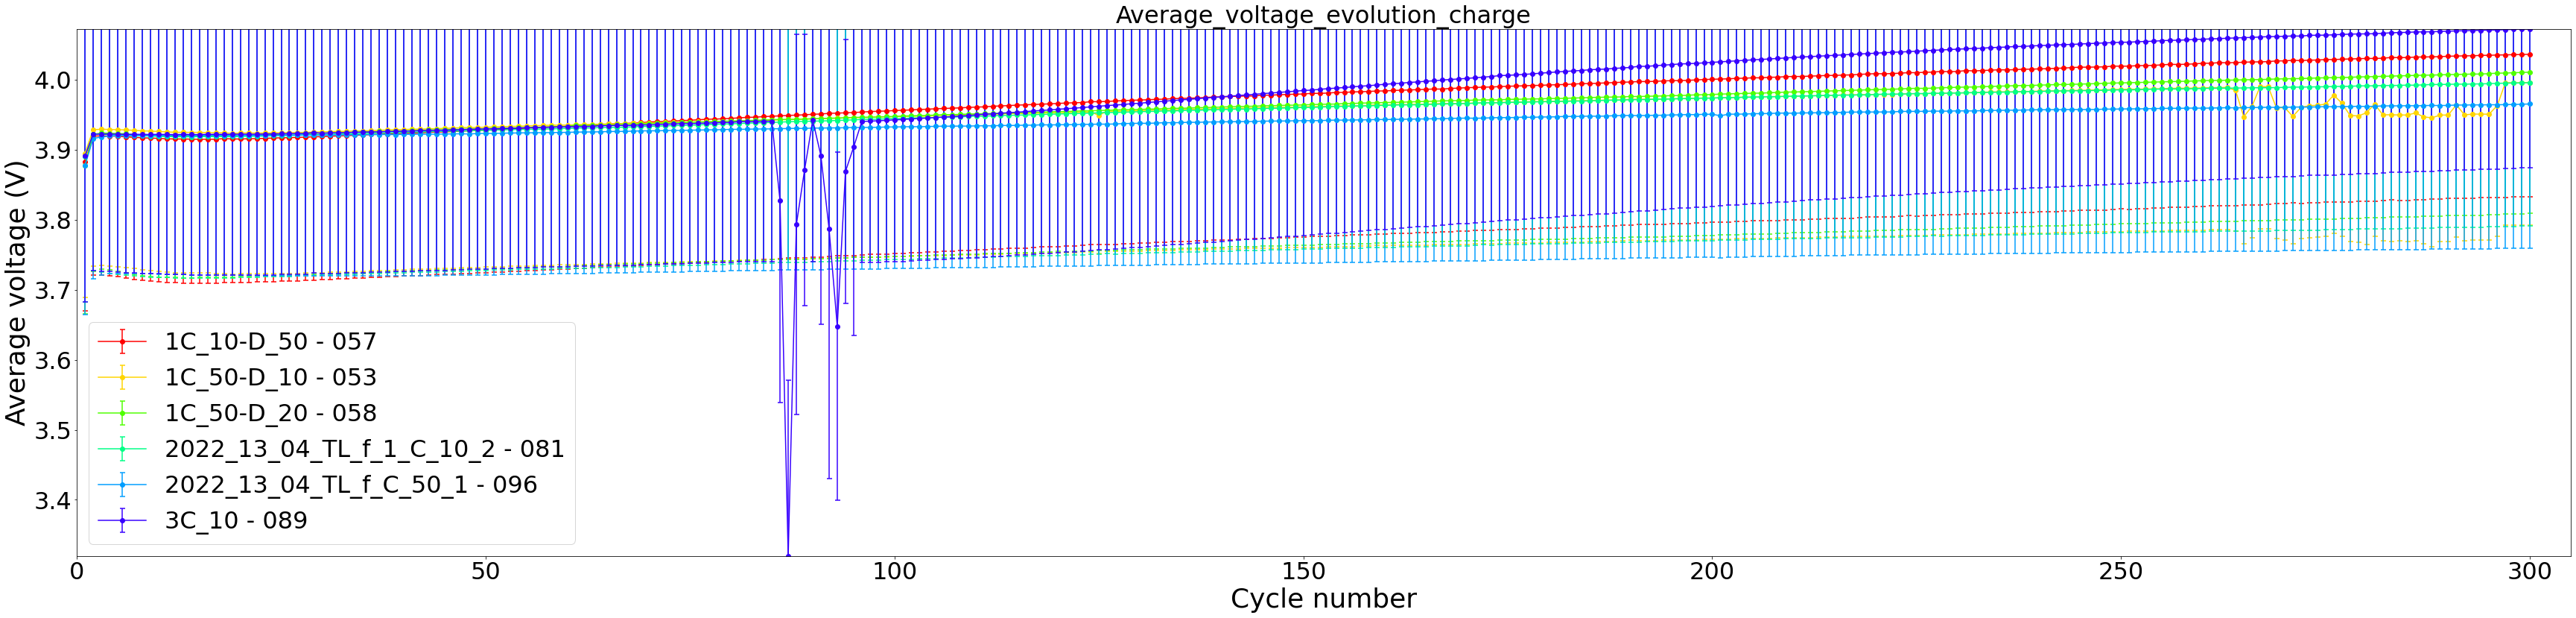

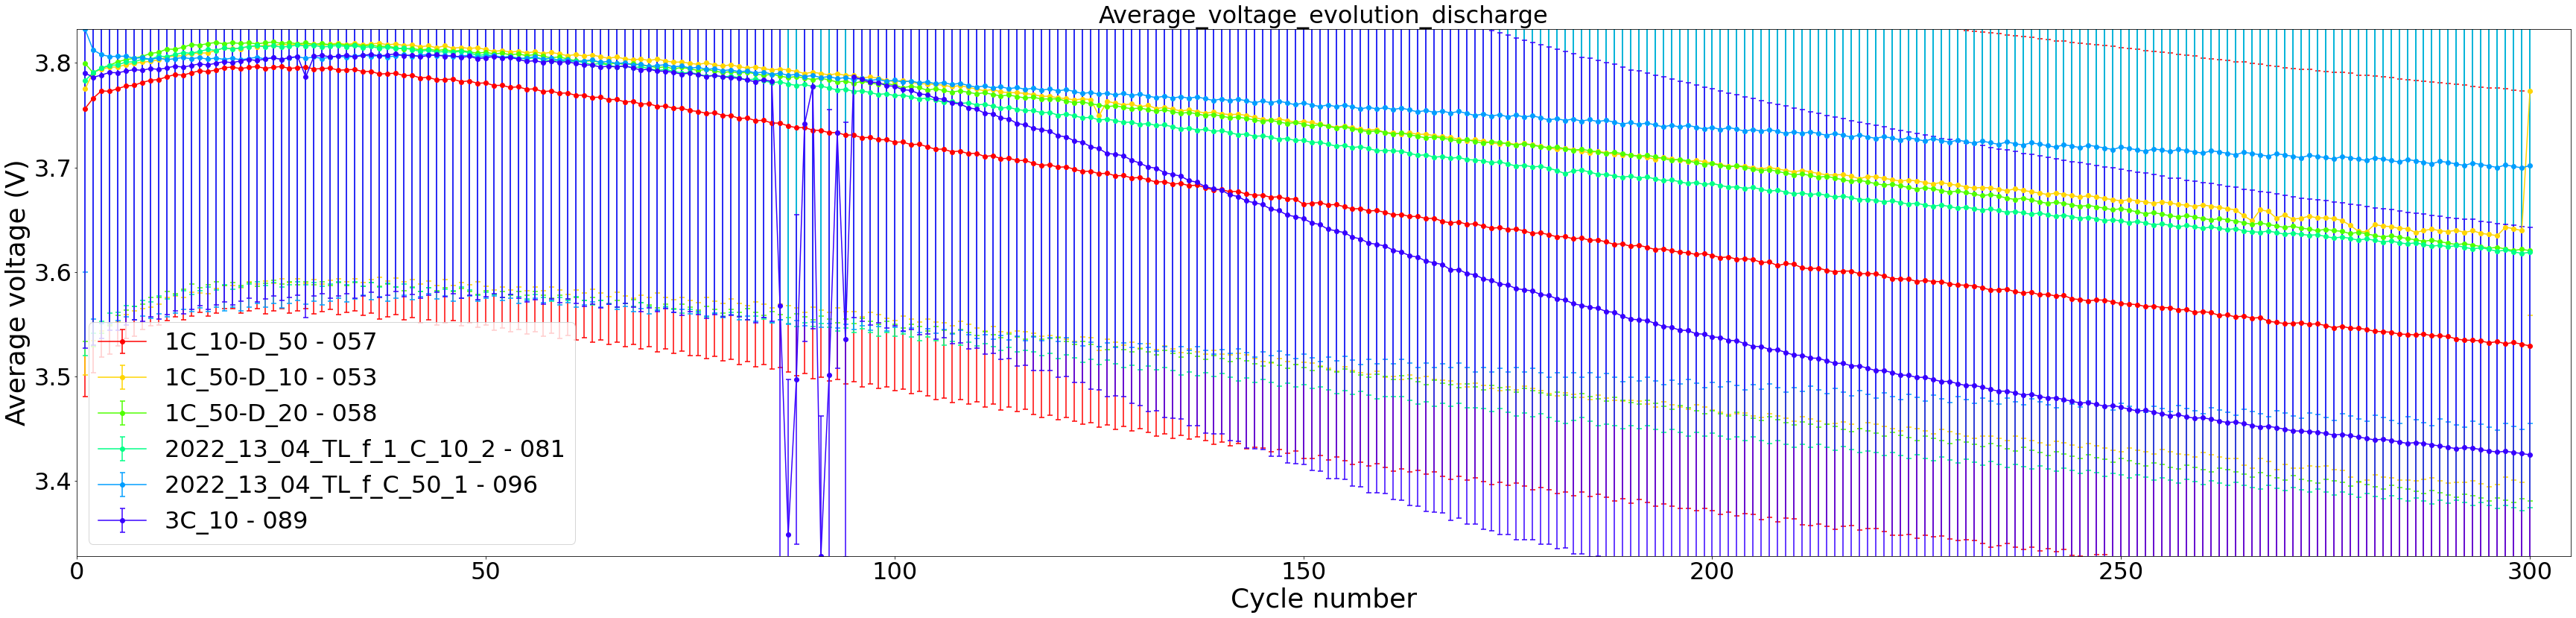

In [19]:
# Plotting Average potential as a function of cycling number
if len(dirs_cycle_life) >= 2:
    path_res_p = path_res + "\\Average voltage"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    name_dict = "average_volt"
    dict_i = average_volt
    y_to_plot = ["Q", "Qn"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    max_cycle = 0
    for d in dict_i:
        limits[name_dict][d] = {}
        x_maxs[d] = []
        x_mins[d] = []
        y_maxs[d] = []
        y_mins[d] = []
        for c in range(len(cycles_to_plot)):
            ind_exp = 0
            cyc = cycles_to_plot[c]
            for exp in dict_i[d]:
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                lenx = len(x)
                if lenx > max_cycle:
                    max_cycle = lenx
                x_maxs[d].append(max(x))
                x_mins[d].append(min(x))
                name_y = "Average voltage"
                y = dict_i[d][exp][name_y]
                y_maxs[d].append(max(y))
                y_mins[d].append(min(y))
                ind_exp+=1


    factor = 5
    for d in dict_i:
        limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
        limits[name_dict][d]["x_down"] = min(x_mins[d])
        limits[name_dict][d]["y_up"] = max(y_maxs[d])
        limits[name_dict][d]["y_down"] = min(y_mins[d])

    for err in range(2):
        for d in dict_i:
            if max_cycle > 55:
                fig = plt.figure(figsize=(max_cycle/5, 13))
            else:
                fig = plt.figure(figsize=(11, 9))
            if err == 0:
                filename = "Comp_" + name_dict + "_" + str(d)
            if err == 1:
                filename = "Comp_" + name_dict + "_" + str(d) +"_with_error"
            ind_exp = 0
            for exp in dict_i[d]:
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                name_y = "Average voltage"
                y = dict_i[d][exp][name_y]
                name_y_err = "Std voltage"
                err_y = dict_i[d][exp][name_y_err]
                if err == 0:
                    plt.scatter(x,y, s=150, color=plt.cm.hsv(col), label=name_i, marker = "o")
                if err == 1:
                    plt.errorbar(x ,y, yerr=err_y, color=plt.cm.hsv(col), label=name_i, capsize=3.5, capthick=1.5, marker = "o")
                ind_exp+=1

                plt.xlim([0,limits[name_dict][d]["x_up"]])
                plt.ylim([limits[name_dict][d]["y_down"], limits[name_dict][d]["y_up"]])

                plt.xlabel("Cycle number", fontsize=36)
                plt.ylabel("Average voltage (V)", fontsize=36)

            title = "Average_voltage_evolution_" + d
            plt.title(title, fontsize = 32)
            plt.legend(fontsize=32) 
            plt.xticks(fontsize=32)
            plt.yticks(fontsize=32)
            path_save = path_res_p + "\\" + filename + ".png"
            plt.savefig(path_save)

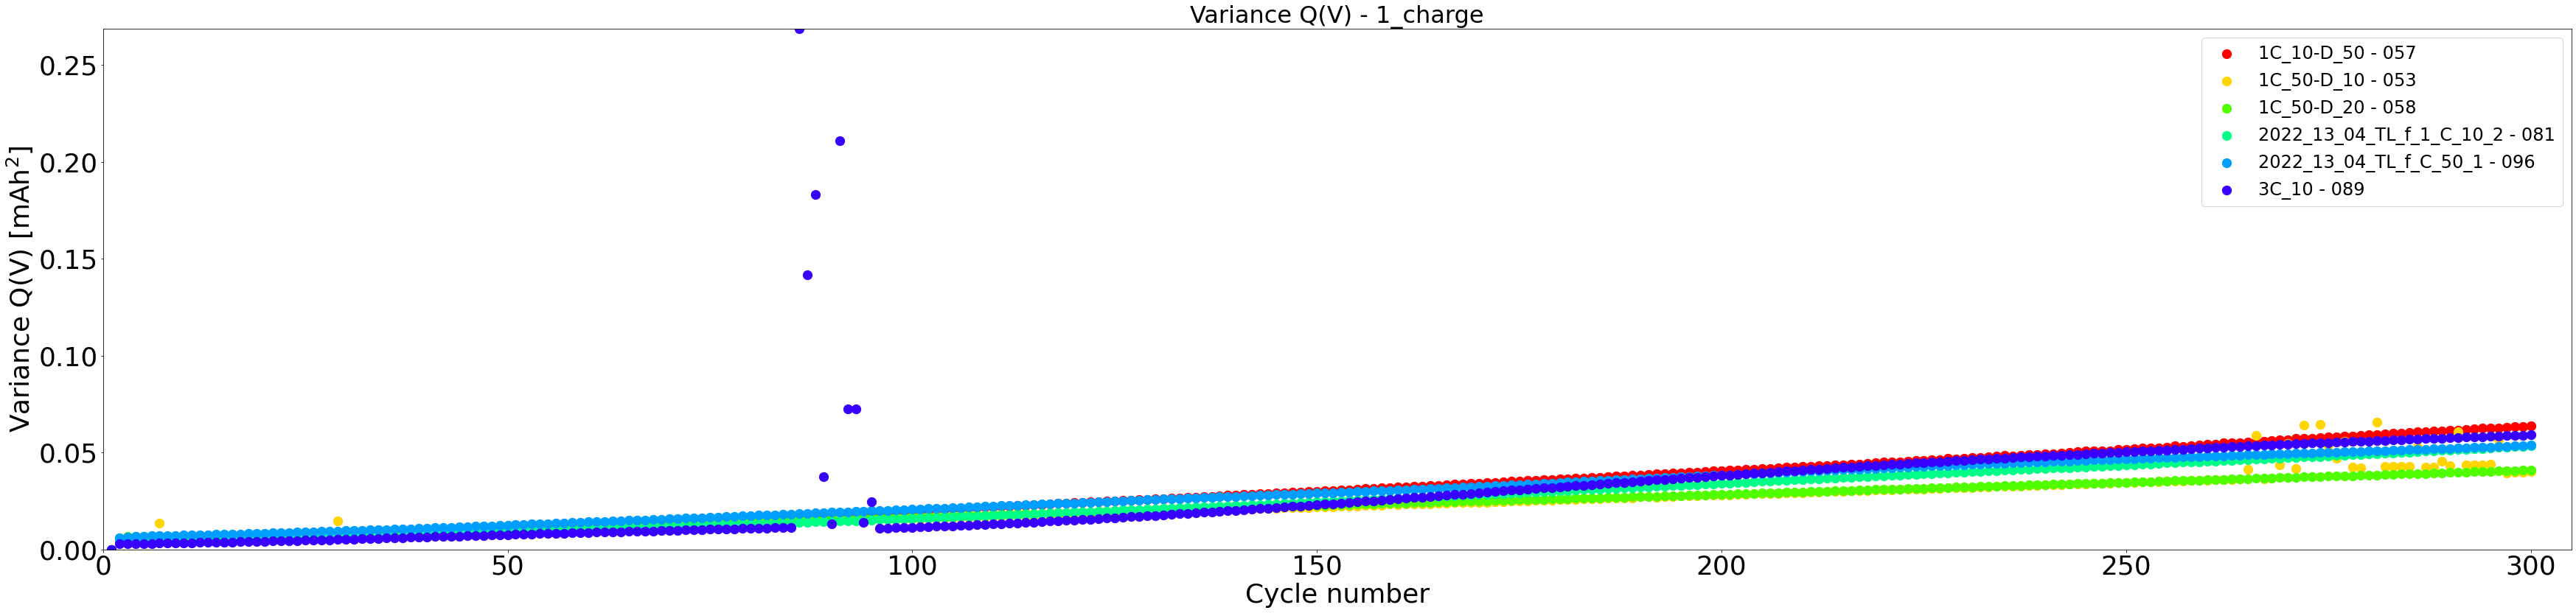

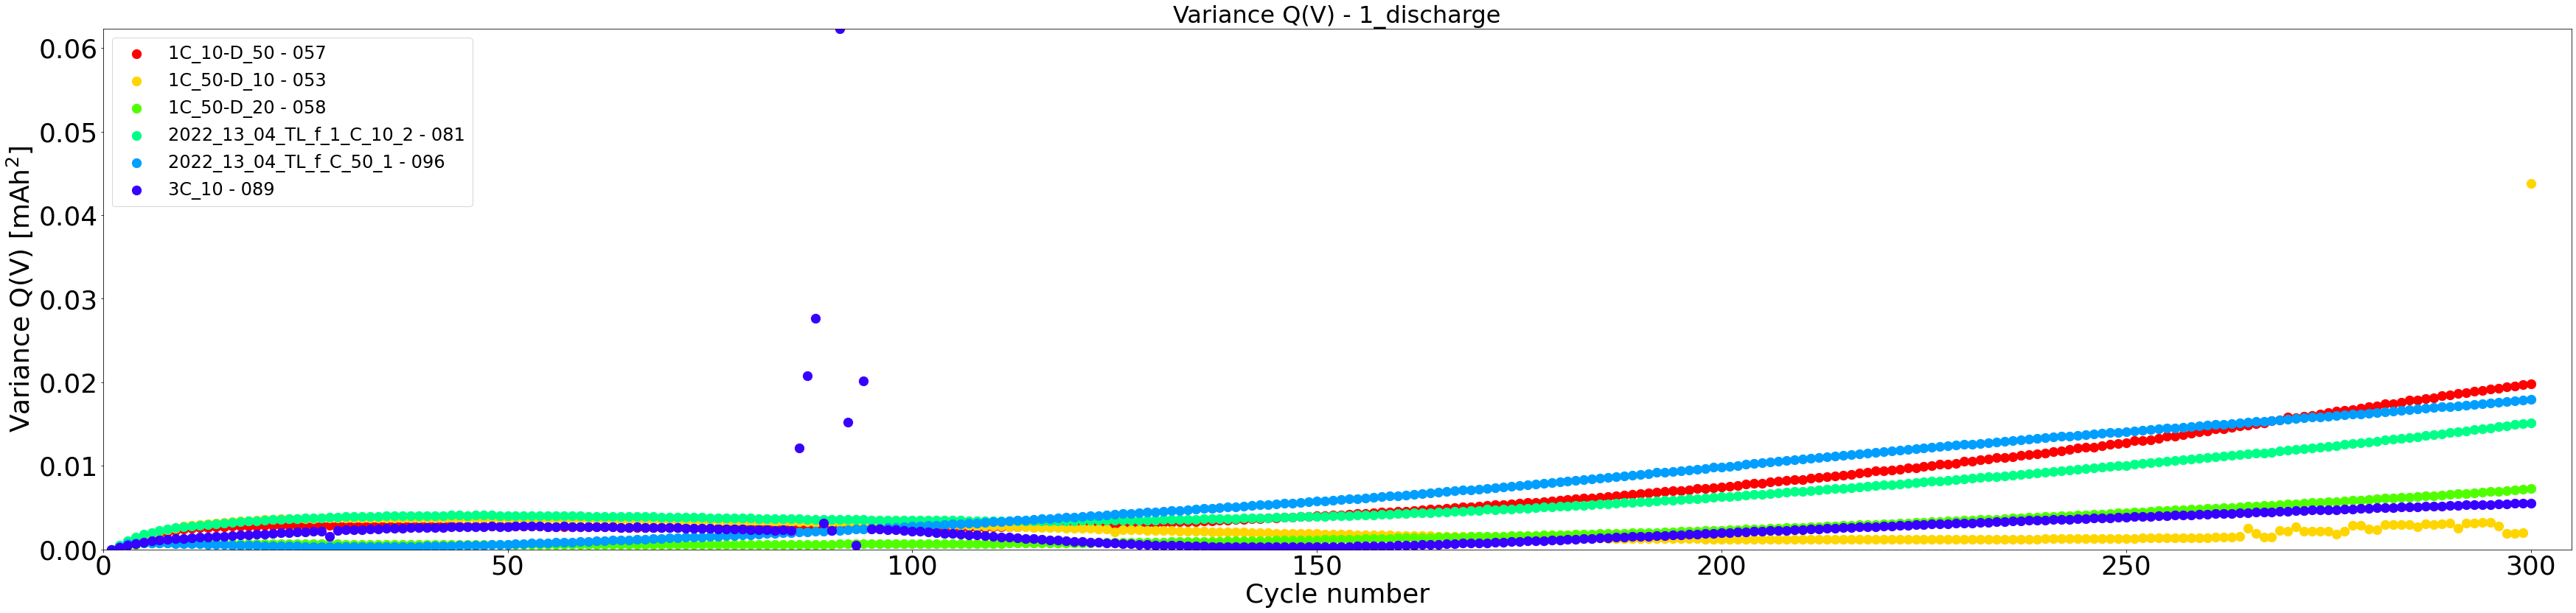

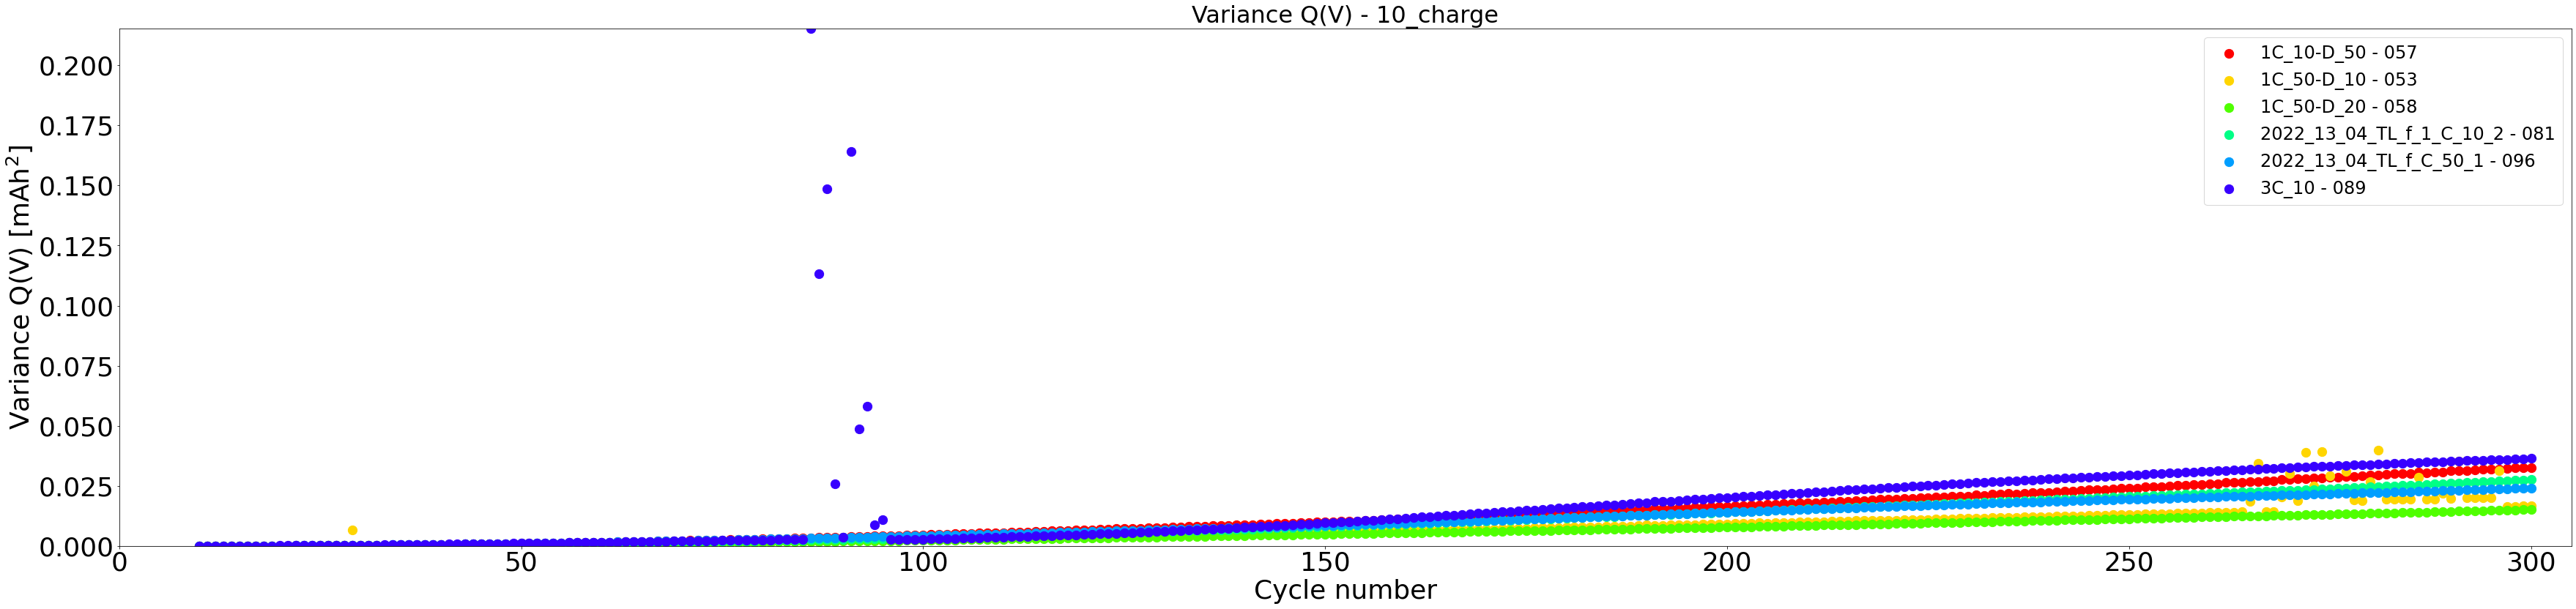

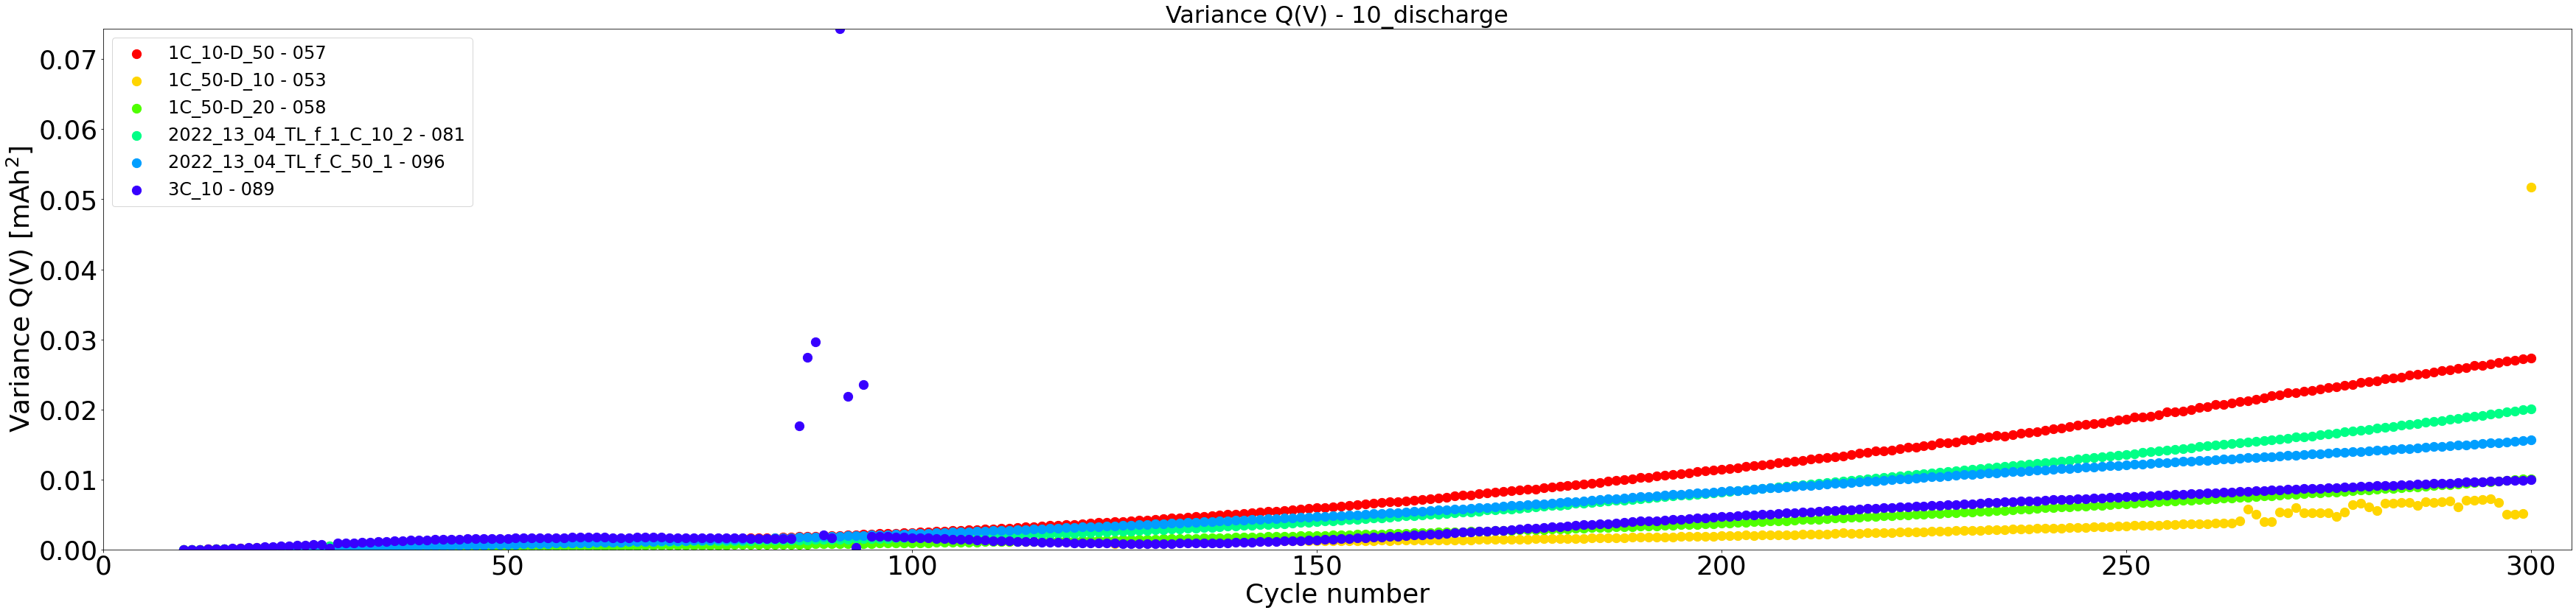

In [20]:
# Plotting Variance capacity as a function of cycling number
if len(dirs_cycle_life) >= 2:
    path_res_p = path_res + "\\Capacity variance"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    name_dict = "variance_Q"
    dict_i = variance_Q
    c_to_plot = ["Variance Q(V) - 1", "Variance Q(V) - 2"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    max_cycle = 0
    for k in c_to_plot:
        if k == c_to_plot[0]:
            name_x = "Cycle number 0"
        if k == c_to_plot[1]:
            name_x = "Cycle number 9"
        y_maxs[k] = {}
        y_mins[k] = {}
        for d in dict_i:
            limits[name_dict][d] = {}
            x_maxs[d] = []
            x_mins[d] = []
            y_maxs[k][d] = []
            y_mins[k][d] = []
            for c in range(len(cycles_to_plot)):
                ind_exp = 0
                cyc = cycles_to_plot[c]
                for exp in dict_i[d]:
                    key_i = keys[ind_exp]
                    name_i = names[ind_exp]
                    x = dict_i[d][exp][name_x]
                    lenx = len(x)
                    if lenx > max_cycle:
                        max_cycle = lenx
                    x_maxs[d].append(max(x))
                    x_mins[d].append(min(x))
                    name_y = k
                    y = dict_i[d][exp][name_y]
                    y_maxs[k][d].append(max(y))
                    y_mins[k][d].append(min(y))
                    ind_exp+=1


    factor = 5
    for d in dict_i:
        limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
        limits[name_dict][d]["x_down"] = min(x_mins[d])
        for k in c_to_plot:
            name_up = k + "_y_up"
            name_down = k + "_y_down"
            limits[name_dict][d][name_up] = max(y_maxs[k][d])
            limits[name_dict][d][name_down] = min(y_mins[k][d])

    for k in c_to_plot:
        if k == c_to_plot[0]:
            k_name = k
            name_x = "Cycle number 0"
        if k == c_to_plot[1]:
            k_name = k.split("2")[0] + "10"
            name_x = "Cycle number 9"
        for d in dict_i:
            if max_cycle > 55:
                fig = plt.figure(figsize=(max_cycle/5, 13))
            else:
                fig = plt.figure(figsize=(11, 9))
            filename = "Comp_" + k_name + "_" + str(d) 
            ind_exp = 0
            for exp in dict_i[d]:
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                x = dict_i[d][exp][name_x]
                name_y = k
                y = dict_i[d][exp][name_y]
                plt.scatter(x,y, s=150, color=plt.cm.hsv(col), label=name_i, marker = "o")
                ind_exp+=1

                plt.xlim([0,limits[name_dict][d]["x_up"]])
                name_up = k + "_y_up"
                name_down = k + "_y_down"
                plt.ylim([0, limits[name_dict][d][name_up]])

                plt.xlabel("Cycle number", fontsize=36)
                plt.ylabel("Variance Q(V) [mAh$^2$]", fontsize=36)

            title = k_name + "_" + d
            plt.title(title, fontsize = 32)
            plt.legend(fontsize=24) 
            plt.xticks(fontsize=36)
            plt.yticks(fontsize=36)
            path_save = path_res_p + "\\" + filename + ".png"
            plt.savefig(path_save)

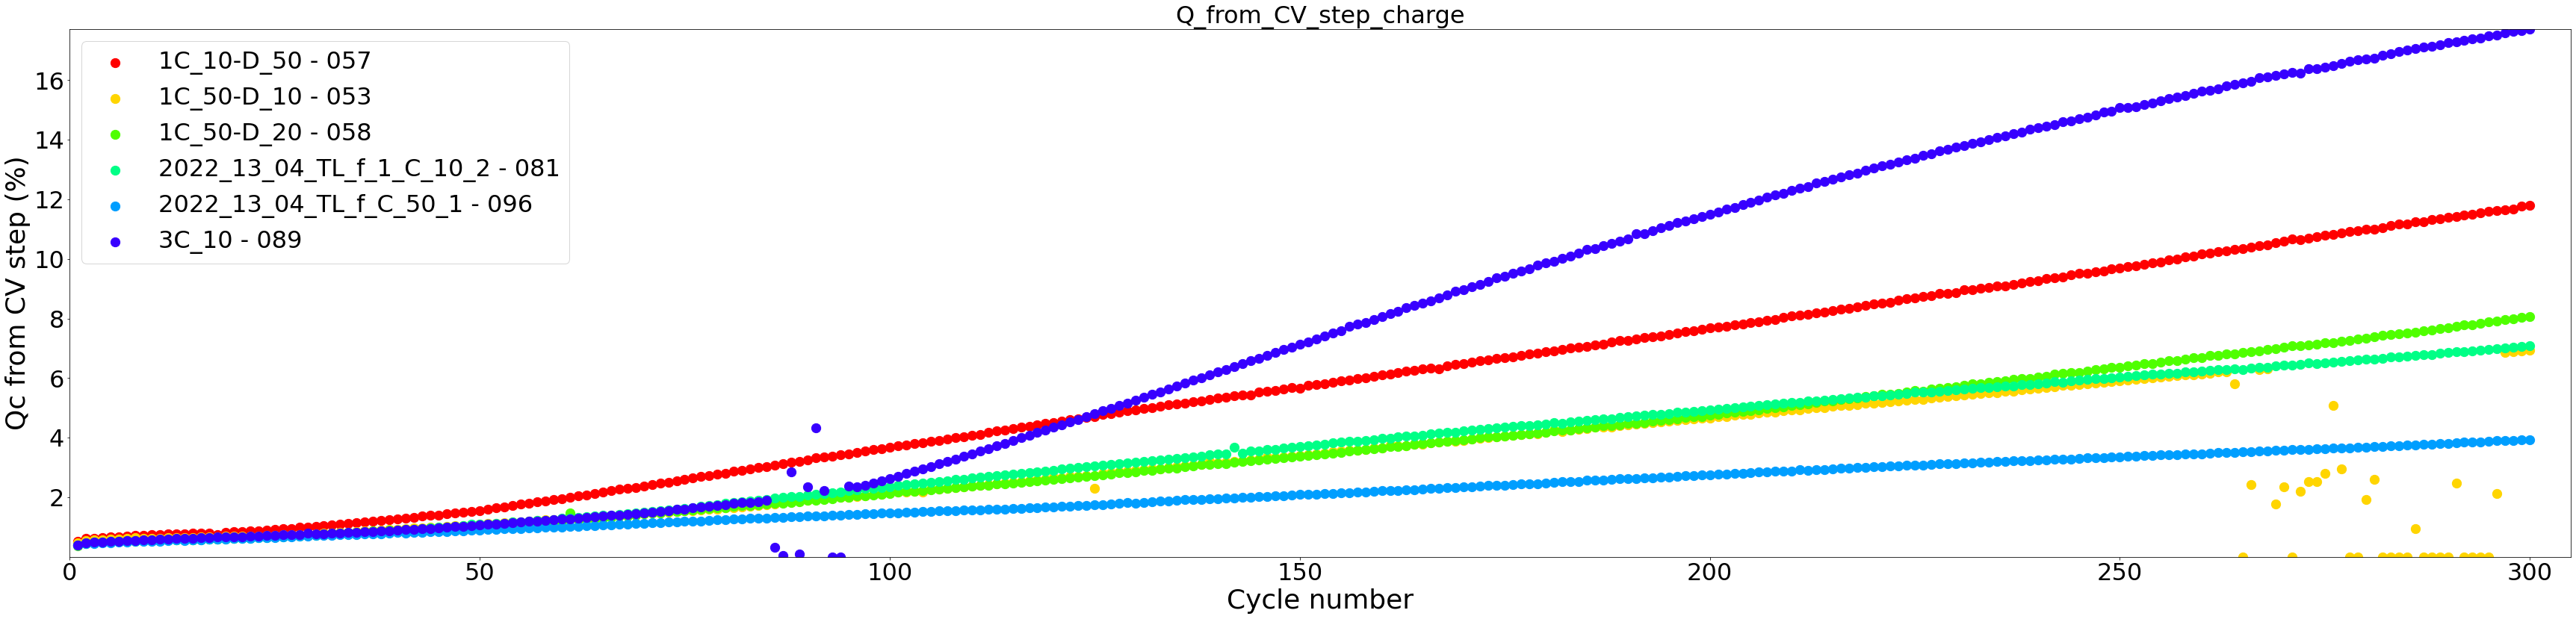

In [21]:
# Plotting (if any) impact of CV step on Q as a function of cycling number
if len(dirs_cycle_life) >= 2:
    if len(Q_from_CV["charge"]) > 0 or len(Q_from_CV["discharge"]) > 0 :
        path_res_p = path_res + "\\Q from CV step"
        try: 
            os.makedirs(path_res_p)
        except:
            pass

        valid_direction = []
        if len(Q_from_CV["charge"]) > 0:
            valid_direction.append("charge")
        if len(Q_from_CV["discharge"]) > 0:
            valid_direction.append("discharge")

        name_dict = "Q_from_CV"
        dict_i = Q_from_CV
        # Defining limits plotting
        y_maxs = {}
        y_mins = {}
        x_maxs = {}
        x_mins = {}
        max_cycle = 0
        for d in valid_direction:
            limits[name_dict][d] = {}
            x_maxs[d] = []
            x_mins[d] = []
            y_maxs[d] = []
            y_mins[d] = []
            for c in range(len(cycles_to_plot)):
                ind_exp = 0
                cyc = cycles_to_plot[c]
                for exp in dict_i[d]:
                    key_i = keys[ind_exp]
                    name_i = names[ind_exp]
                    name_x = "Cycle number"
                    x = dict_i[d][exp][name_x]
                    lenx = len(x)
                    if lenx > max_cycle:
                        max_cycle = lenx
                    x_maxs[d].append(max(x))
                    x_mins[d].append(min(x))
                    if d == "charge":
                        name_y = "Qc from CV step (%)"
                    if d == "discharge":
                        name_y = "Qd from CV step (%)"
                    y = dict_i[d][exp][name_y]
                    y_maxs[d].append(max(y))
                    y_mins[d].append(min(y))
                    ind_exp+=1


        factor = 5
        for d in valid_direction:
            limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
            limits[name_dict][d]["x_down"] = min(x_mins[d])
            limits[name_dict][d]["y_up"] = max(y_maxs[d])
            limits[name_dict][d]["y_down"] = min(y_mins[d])

        for d in valid_direction:
            if max_cycle > 55:
                fig = plt.figure(figsize=(max_cycle/5, 13))
            else:
                fig = plt.figure(figsize=(11, 9))

            filename = "Comp_" + name_dict + "_" + str(d)
            ind_exp = 0
            for exp in dict_i[d]:
                col = ind_exp/(len(cycles_to_plot)-1)
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                if d == "charge":
                    name_y = "Qc from CV step (%)"
                if d == "discharge":
                    name_y = "Qd from CV step (%)"
                y = dict_i[d][exp][name_y]
                plt.scatter(x,y, s=150, color=plt.cm.hsv(col), label=name_i, marker = "o")
                ind_exp+=1

                plt.xlim([0,limits[name_dict][d]["x_up"]])
                plt.ylim([limits[name_dict][d]["y_down"], limits[name_dict][d]["y_up"]])

                plt.xlabel("Cycle number", fontsize=36)
                plt.ylabel(name_y, fontsize=36)

            title = "Q_from_CV_step_" + d
            plt.title(title, fontsize = 32)
            plt.legend(fontsize=32) 
            plt.xticks(fontsize=32)
            plt.yticks(fontsize=32)
            path_save = path_res_p + "\\" + filename + ".png"
            plt.savefig(path_save)

In [22]:
# Rate capability

In [23]:
if len(dirs_rate_cap) >= 2:
    path_res = path_res_original + "\\Rate capabiity"
    try: 
        os.makedirs(path_res)
    except:
        pass

In [24]:
# Recovering list of C_rates
if len(dirs_rate_cap) >= 2:
    path_input_log = dirs_rate_cap[0] + "\\Inputs.log"
    with open(path_input_log, 'r') as f:
        lines = f.readlines()
        f.close()

    for line in lines:
        try:
            splitted_line = line.split(" = ")
            splitted_line2 = splitted_line[1].split("\n")

            if splitted_line[0] == "C_rate_list":
                C_rates_list = []
                rates = splitted_line2[0].split(", ")
                for rate in rates:
                    if rate != '':
                        C_rates_list.append(rate)
                #print(C_rates_list)

            if splitted_line[0] == "Cycle(s) per formation":
                cycles_per_formations = int(splitted_line2[0])
                if cycles_per_formations > 0:
                    formation = 1
                else:
                    formation = 0
            if splitted_line[0] == "Cycle(s) per C_rate":
                cycles_per_Crates = int(splitted_line2[0])
        except:
            pass

In [44]:
# Comparison rate capability

if len(dirs_rate_cap) >= 2:
    performance = {}
    performance["charge"] = {}
    performance["discharge"] = {}
    
    performance_ave = {}
    performance_ave["charge"] = {}
    performance_ave["discharge"] = {}

    dQdV = {}
    dQdV["charge"] = {}
    dQdV["discharge"] = {}

    dVdQ = {}
    dVdQ["charge"] = {}
    dVdQ["discharge"] = {}

    end_capacity = {}
    end_capacity["charge"] = {}
    end_capacity["discharge"] = {}

    ave_end_capacity = {}
    ave_end_capacity["charge"] = {}
    ave_end_capacity["discharge"] = {}
    
    average_volt = {} 
    average_volt["charge"] = {}
    average_volt["discharge"] = {}


    dictionaries = [performance, performance_ave, dQdV, dVdQ, end_capacity, ave_end_capacity, average_volt]
    data_names = ["raw_","full_averaged", "dQ_dV", "dV_dQ", "end_of_", "ave_end_", "Average_voltage_"] 
    dict_names = ["performance", "performance_ave", "dQdV", "dVdQ", "end_capacity", "ave_end_capacity", "average_volt"]
    limits = {}
    for d in dict_names:
        limits[d] = {}
        limits[d]["charge"] = {}
        limits[d]["discharge"] = {}

    #count_dict = 0
    for name_d_i in names:
        name_d_i = "_" + name_d_i
        for f in dirs_rate_cap:
            if name_d_i in f:
                files =  os.listdir(f)
                for file in files:
                    if ".csv" in file:
                        path_file = str(f) + "\\" + str(file)
                        if "discharge" in file:
                            direction = "discharge"
                        else:
                            direction = "charge"
                        for n in range(len(data_names)):
                            name_i = data_names[n]
                            if name_i in file:
                                dict_i = dictionaries[n]
                                dict_i[direction][name_d_i] = pd.read_csv(path_file)       
                                print(name_d_i)
        #count_dict+=1

_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_10-D_50 - 057
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_10 - 053
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_1C_50-D_20 - 058
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_1_C_10_2 - 081
_2022_13_04_TL_f_C_50_1 - 096
_2022_13_04_TL_f_C_50_1 

In [41]:
dict_i

{'charge': {'_1C_10-D_50 - 057':       1C_10-D_50_I_1  1C_10-D_50_Q_1  1C_10-D_50_Qn_1  1C_10-D_50_E_1
  0             0.1171    6.000000e-07         0.000103          2.0018
  1             0.1170    3.256000e-04         0.055753          2.1582
  2             0.1170    6.506000e-04         0.111404          2.1844
  3             0.1170    9.756000e-04         0.167055          2.2004
  4             0.1170    1.300600e-03         0.222705          2.2129
  ...              ...             ...              ...             ...
  4692          0.0730    2.218300e-03         0.379846          4.3019
  4693          0.0680    2.414200e-03         0.413390          4.3016
  4694          0.0634    2.597400e-03         0.444760          4.3019
  4695          0.0595    2.767500e-03         0.473887          4.3017
  4696          0.0585    2.817800e-03         0.482500          4.3011
  
  [4697 rows x 4 columns],
  '_1C_50-D_10 - 053':       C_50-D_10_I_1  C_50-D_10_Q_1  C_50-D_10_Qn_1  

In [43]:
performance_ave

{'charge': {'_1C_10-D_50 - 057':     1C_10-D_50_ave_discharge  1C_10-D_50_std_discharge  \
  0                   0.000051                       0.0   
  1                   0.362093                       0.0   
  2                   1.103059                       0.0   
  3                   1.993779                       0.0   
  4                   3.082031                       0.0   
  ..                       ...                       ...   
  95                208.647361                       0.0   
  96                208.701778                       0.0   
  97                208.755820                       0.0   
  98                208.807138                       0.0   
  99                208.858459                       0.0   
  
      1C_10-D_Q_ave_discharge  1C_10-D_Qn_ave_discharge  1C_10-D_50_ave_charge  \
  0                   4.29790                   4.29790               0.000103   
  1                   4.28479                   4.28479               0.008370   


In [38]:
# Plotting average (dis)charge curves

if len(dirs_rate_cap) >= 2:
    path_res_p = path_res + "\\(dis)charge curves"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    x_to_plot = ["Q", "Qn"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    for k in x_to_plot:
        x_maxs[k] = {}
        x_mins[k] = {}
        for d in performance_ave:
            limits["performance_ave"][d] = {}
            y_maxs[d] = []
            y_mins[d] = []
            x_maxs[k][d] = []
            x_mins[k][d] = []
            for rate in C_rates_list:
                ind_exp = 0
                for exp in performance_ave[d]:
                    name_x = rate + "_"+ k + "_" + "ave"
                    print(name_x)
                    x = performance_ave[d][exp][name_x]
                    x_maxs[k][d].append(max(x))
                    x_mins[k][d].append(min(x))
                    name_y = rate + "_E_ave"
                    y = performance_ave[d][exp][name_y]
                    y_maxs[d].append(max(y))
                    y_mins[d].append(min(y))
                    ind_exp+=1


    factor = 0.02
    for d in performance_ave:
        limits["performance_ave"][d]["y_up"] = max(y_maxs[d])-factor*max(y_maxs[d])
        limits["performance_ave"][d]["y_down"] = min(y_mins[d])+factor*min(y_mins[d])
        for k in x_to_plot:
            name_up = k + "_x_up"
            name_down = k + "_x_down"
            limits["performance_ave"][d][name_up] = max(x_maxs[k][d])
            limits["performance_ave"][d][name_down] = min(x_mins[k][d])

    for k in x_to_plot:
        path_res_p_k = path_res_p + "\\" + k
        try: 
            os.makedirs(path_res_p_k)
        except:
            pass
        for d in performance_ave:
            path_res_p_k_d = path_res_p_k + "\\" + d
            try: 
                os.makedirs(path_res_p_k_d)
            except:
                pass
            for rate in C_rates_list:
                fig = plt.figure(figsize=(13,11))
                filename = "Comp_performance_ave_" + str(rate)
                ind_exp = 0
                for exp in performance_ave[d]:
                    col = ind_exp/(len(performance_ave[d]))
                    name_i = names[ind_exp]
                    name_x = rate + "_"+ k + "_" + "ave"
                    name_xstd = rate + "_"+ k + "_" + "std"
                    x = performance_ave[d][exp][name_x]
                    x_std = performance_ave[d][exp][name_xstd]
                    x_std_minus = [x[i]-x_std[i] for i in range(len(x))]
                    x_std_plus = [x[i]+x_std[i] for i in range(len(x))]
                    x_maxs[k][d].append(max(x))
                    x_mins[k][d].append(min(x))
                    name_y = rate + "_E_ave"
                    y = performance_ave[d][exp][name_y]
                    y_list = y.tolist()
                    plt.plot(x,y,linewidth=2, color=plt.cm.hsv(col), label=name_i)
                    plt.fill(x_std_minus+x_std_plus[::-1], y_list+y_list[::-1], color=plt.cm.hsv(col), alpha=0.35)
                    ind_exp+=1

                    plt.ylim([limits["performance_ave"][d]["y_down"],limits["performance_ave"][d]["y_up"]])
                    #plt.ylim([3.2, 4.2])
                    name_up = k + "_x_up"
                    name_down = k + "_x_down"
                    plt.xlim([0, limits["performance_ave"][d][name_up]])
                    

                    plt.ylabel("E (V)", fontsize=28)
                    if k == "Q":
                        plt.xlabel(k + " (mAh)", fontsize=28)
                    if k == "Qn":
                        plt.xlabel(k + " (mAh g$^{-1}$)", fontsize=28)

                title = rate
                plt.title(title, fontsize=28)
                plt.legend(fontsize=16) 
                plt.xticks(fontsize=22)
                plt.yticks(fontsize=22)
                path_save = path_res_p_k_d + "\\" + filename + ".png"
                plt.savefig(path_save)

1C_10-D_50_Q_ave_charge


KeyError: '1C_10-D_50_Q_ave_charge'

In [27]:
for exp in performance_ave[d]:
    name_x = rate + "_"+ k + "_" + "ave"
    print(exp, name_x)

_1C_10-D_50 - 057 1C_10-D_50_Q_ave
_1C_50-D_10 - 053 1C_10-D_50_Q_ave
_1C_50-D_20 - 058 1C_10-D_50_Q_ave
_2022_13_04_TL_f_1_C_10_2 - 081 1C_10-D_50_Q_ave
_2022_13_04_TL_f_C_50_1 - 096 1C_10-D_50_Q_ave
_3C_10 - 089 1C_10-D_50_Q_ave


In [34]:
for i in performance_ave["charge"]:
    print("i = ", i)
    for j in performance_ave["charge"][i]:
        print("j = ", j)

i =  _1C_10-D_50 - 057
j =  1C_10-D_50_ave_discharge
j =  1C_10-D_50_std_discharge
j =  1C_10-D_Q_ave_discharge
j =  1C_10-D_Qn_ave_discharge
j =  1C_10-D_50_ave_charge
j =  1C_10-D_50_std_charge
j =  1C_10-D_Q_ave_charge
j =  1C_10-D_Qn_ave_charge
i =  _1C_50-D_10 - 053
j =  C_50-D_10_ave_discharge
j =  C_50-D_10_std_discharge
j =  C_50-D_Q_ave_discharge
j =  C_50-D_Qn_ave_discharge
j =  C_50-D_10_ave_charge
j =  C_50-D_10_std_charge
j =  C_50-D_Q_ave_charge
j =  C_50-D_Qn_ave_charge
i =  _1C_50-D_20 - 058
j =  C_50-D_20_ave_discharge
j =  C_50-D_20_std_discharge
j =  C_50-D_Q_ave_discharge
j =  C_50-D_Qn_ave_discharge
j =  C_50-D_20_ave_charge
j =  C_50-D_20_std_charge
j =  C_50-D_Q_ave_charge
j =  C_50-D_Qn_ave_charge
i =  _2022_13_04_TL_f_1_C_10_2 - 081
j =  C_10_Q_ave_discharge
j =  C_10_Q_std_discharge
j =  C_10_E_ave_discharge
j =  C_10_Qn_ave_discharge
j =  C_10_Qn_std_discharge
j =  C_10_Q_ave_charge
j =  C_10_Q_std_charge
j =  C_10_E_ave_charge
j =  C_10_Qn_ave_charge
j =  C_

In [31]:
performance_ave

{'charge': {'_1C_10-D_50 - 057':     1C_10-D_50_ave_discharge  1C_10-D_50_std_discharge  \
  0                   0.000051                       0.0   
  1                   0.362093                       0.0   
  2                   1.103059                       0.0   
  3                   1.993779                       0.0   
  4                   3.082031                       0.0   
  ..                       ...                       ...   
  95                208.647361                       0.0   
  96                208.701778                       0.0   
  97                208.755820                       0.0   
  98                208.807138                       0.0   
  99                208.858459                       0.0   
  
      1C_10-D_Q_ave_discharge  1C_10-D_Qn_ave_discharge  1C_10-D_50_ave_charge  \
  0                   4.29790                   4.29790               0.000103   
  1                   4.28479                   4.28479               0.008370   


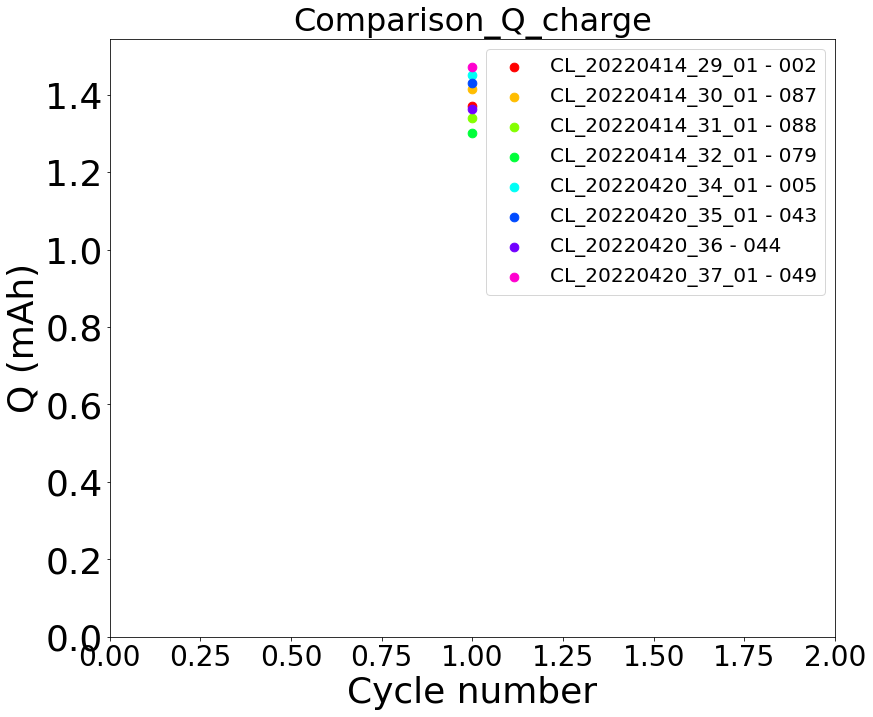

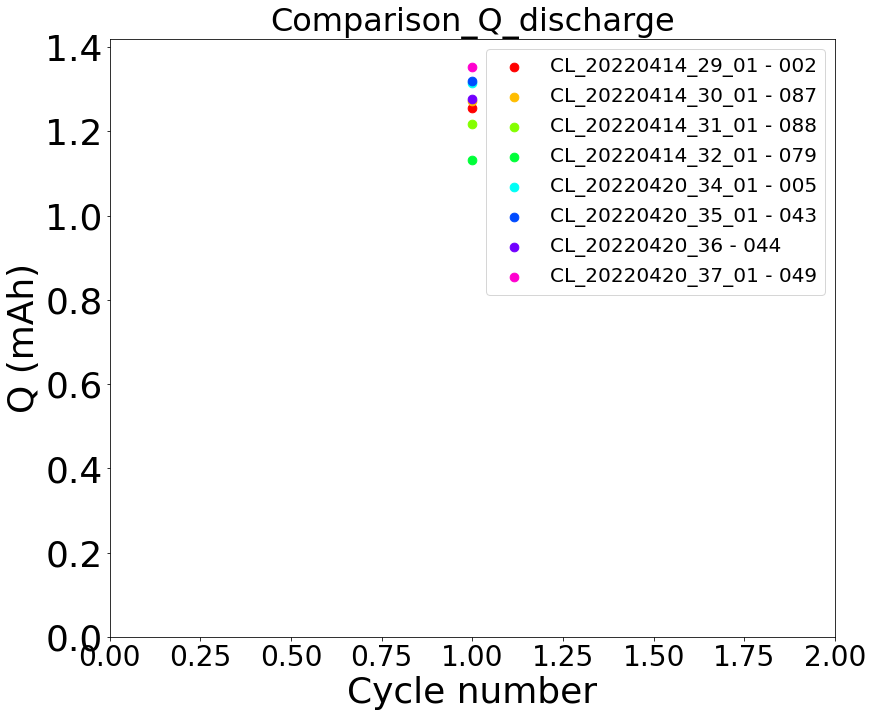

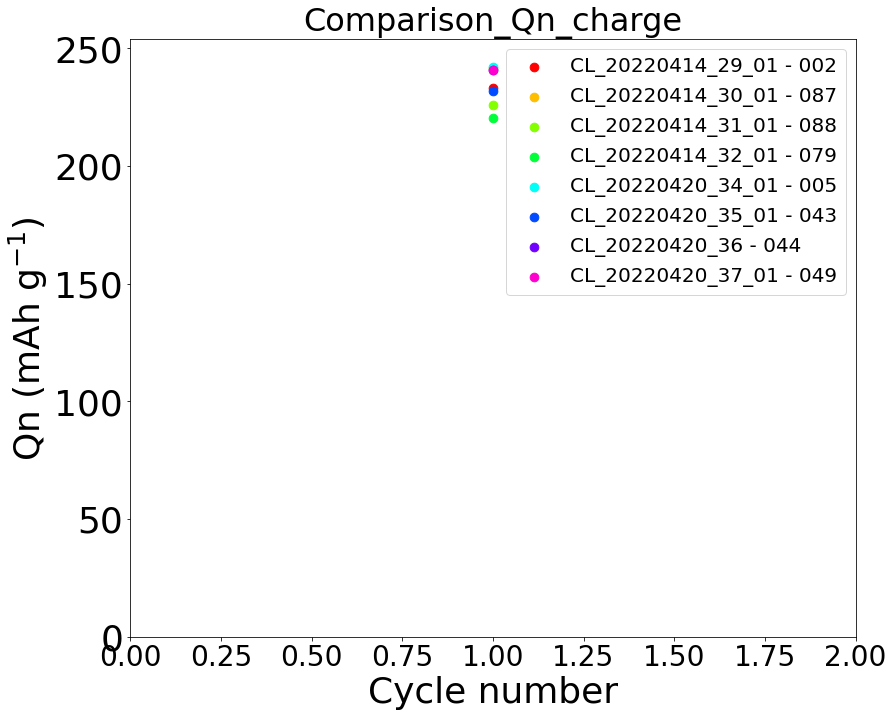

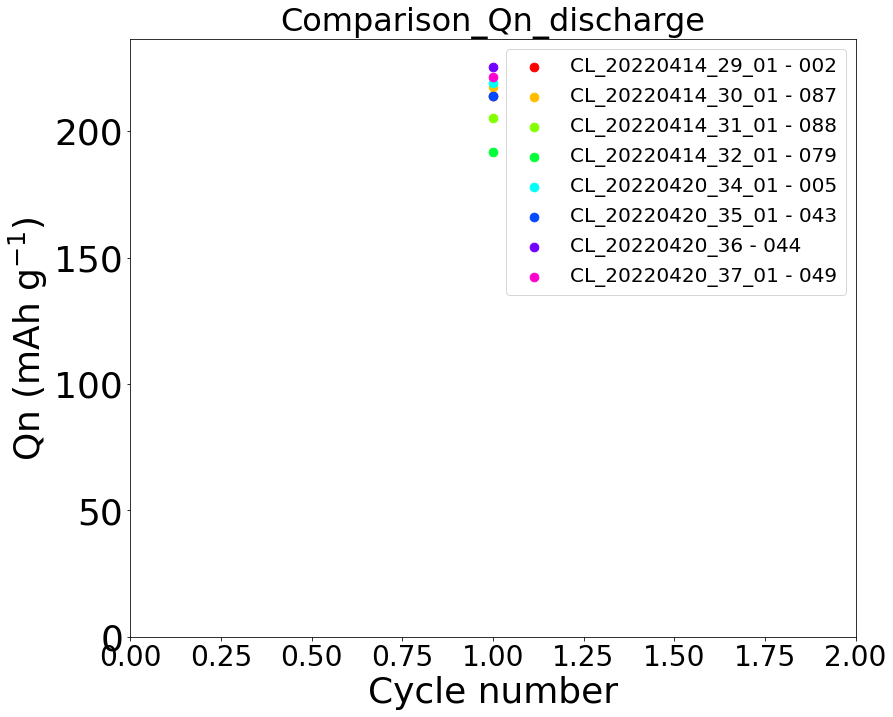

In [27]:
# Plotting (dis)charge capacity as a function of cycling number
if len(dirs_rate_cap) >= 2:
    path_res_p = path_res + "\\End of (dis)charge"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    name_dict = "end_capacity"
    dict_i = end_capacity
    y_to_plot = ["Q", "Qn"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    max_cycle = 0
    for k in y_to_plot:
        y_maxs[k] = {}
        y_mins[k] = {}
        for d in dict_i:
            limits[name_dict][d] = {}
            x_maxs[d] = []
            x_mins[d] = []
            y_maxs[k][d] = []
            y_mins[k][d] = []
            ind_exp = 0
            for exp in dict_i[d]:
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                lenx = len(x)
                if lenx > max_cycle:
                    max_cycle = lenx
                x_maxs[d].append(max(x))
                x_mins[d].append(min(x))
                name_y = k
                y = dict_i[d][exp][name_y]
                y_maxs[k][d].append(max(y))
                y_mins[k][d].append(min(y))
                ind_exp+=1


    factor = 1
    for d in dict_i:
        limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
        limits[name_dict][d]["x_down"] = min(x_mins[d])
        for k in y_to_plot:
            name_up = k + "_y_up"
            name_down = k + "_y_down"
            limits[name_dict][d][name_up] = max(y_maxs[k][d])+(0.05*max(y_maxs[k][d]))
            limits[name_dict][d][name_down] = min(y_mins[k][d])

    for k in y_to_plot:
        path_res_p_k = path_res_p + "\\" + k
        try: 
            os.makedirs(path_res_p_k)
        except:
            pass
        for d in dict_i:
            if max_cycle > 55:
                fig = plt.figure(figsize=(max_cycle/5, 13))
            else:
                fig = plt.figure(figsize=(13, 11))
            filename = "Comp_" + name_dict + "_" + str(d)
            ind_exp = 0
            for exp in dict_i[d]:
                col = ind_exp/(len(performance_ave[d]))
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                name_y = k
                y = dict_i[d][exp][name_y]
                plt.scatter(x,y, s=75, color=plt.cm.hsv(col), label=name_i, marker = "o")
                ind_exp+=1

                plt.xlim([0,limits[name_dict][d]["x_up"]])
                name_up = k + "_y_up"
                name_down = k + "_y_down"
                plt.ylim([0, limits[name_dict][d][name_up]])

                plt.xlabel("Cycle number", fontsize=36)
                if k == "Q":
                    plt.ylabel(k + " (mAh)", fontsize=36)
                if k == "Qn":
                    plt.ylabel(k + " (mAh g$^{-1}$)", fontsize=36)

            title = "Comparison_" + k + "_" + d
            plt.title(title, fontsize = 32)
            plt.legend(fontsize=20) 
            plt.xticks(fontsize=28)
            plt.yticks(fontsize=36)
            path_save = path_res_p_k + "\\" + filename + ".png"
            plt.savefig(path_save)

In [29]:
# Plotting averaged (dis)charge capacity as a function of cycling number
if len(dirs_rate_cap) >= 2:
    try:
        path_res_p = path_res + "\\End of (dis)charge"
        try: 
            os.makedirs(path_res_p)
        except:
            pass

        name_dict = "ave_end_capacity"
        dict_i = ave_end_capacity
        y_to_plot = ["Q", "Qn"]
        # Defining limits plotting
        y_maxs = {}
        y_mins = {}
        x_maxs = {}
        x_mins = {}
        max_cycle = 0
        for k in y_to_plot:
            y_maxs[k] = {}
            y_mins[k] = {}
            for d in dict_i:
                limits[name_dict][d] = {}
                x_maxs[d] = []
                x_mins[d] = []
                y_maxs[k][d] = []
                y_mins[k][d] = []
                ind_exp = 0
                for exp in dict_i[d]:
                    name_i = names[ind_exp]
                    name_x = "C_rates"
                    x = dict_i[d][exp][name_x]
                    lenx = len(x)
                    if lenx > max_cycle:
                        max_cycle = lenx
                    name_y = k
                    y = dict_i[d][exp][name_y]
                    y_maxs[k][d].append(max(y))
                    y_mins[k][d].append(min(y))
                    ind_exp+=1


        for d in dict_i:
            for k in y_to_plot:
                name_up = k + "_y_up"
                name_down = k + "_y_down"
                limits[name_dict][d][name_up] = max(y_maxs[k][d])+(0.05*max(y_maxs[k][d]))
                limits[name_dict][d][name_down] = min(y_mins[k][d])

        for k in y_to_plot:
            path_res_p_k = path_res_p + "\\" + k
            try: 
                os.makedirs(path_res_p_k)
            except:
                pass
            for d in dict_i:
                if max_cycle > 55:
                    fig = plt.figure(figsize=(max_cycle/5, 13))
                else:
                    fig = plt.figure(figsize=(13, 11))
                filename = "Comp_" + name_dict + "_" + str(d)
                ind_exp = 0
                for exp in dict_i[d]:
                    col = ind_exp/(len(performance_ave[d]))
                    name_i = names[ind_exp]
                    name_x = "C_rates"
                    x = dict_i[d][exp][name_x]
                    name_y = k
                    name_y_std = "std_" + k
                    y = dict_i[d][exp][name_y]
                    y_std = dict_i[d][exp][name_y_std]
                    plt.errorbar(x,y, yerr=y_std, color=plt.cm.hsv(col), label=name_i, capsize=3.5, capthick=1.5, marker = "o")
                    ind_exp+=1

                    name_up = k + "_y_up"
                    name_down = k + "_y_down"
                    plt.ylim([0, limits[name_dict][d][name_up]])

                    plt.xlabel("C-rate", fontsize=36)
                    if k == "Q":
                        plt.ylabel(k + " (mAh)", fontsize=36)
                    if k == "Qn":
                        plt.ylabel(k + " (mAh g$^{-1}$)", fontsize=36)

                title = "Comparison_ave_" + k + "_" + d
                plt.title(title, fontsize = 32)
                plt.legend(fontsize=20) 
                plt.xticks(fontsize=28)
                plt.yticks(fontsize=36)
                path_save = path_res_p_k + "\\" + filename + ".png"
                plt.savefig(path_save)
    except:
        print("Warning - no average possible")

Error - probably no average possible


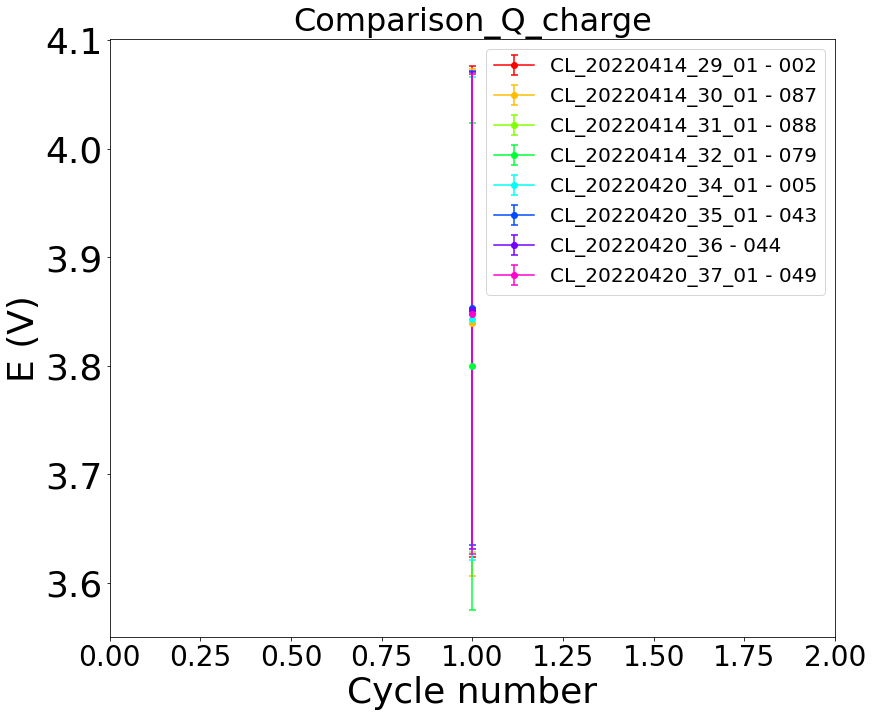

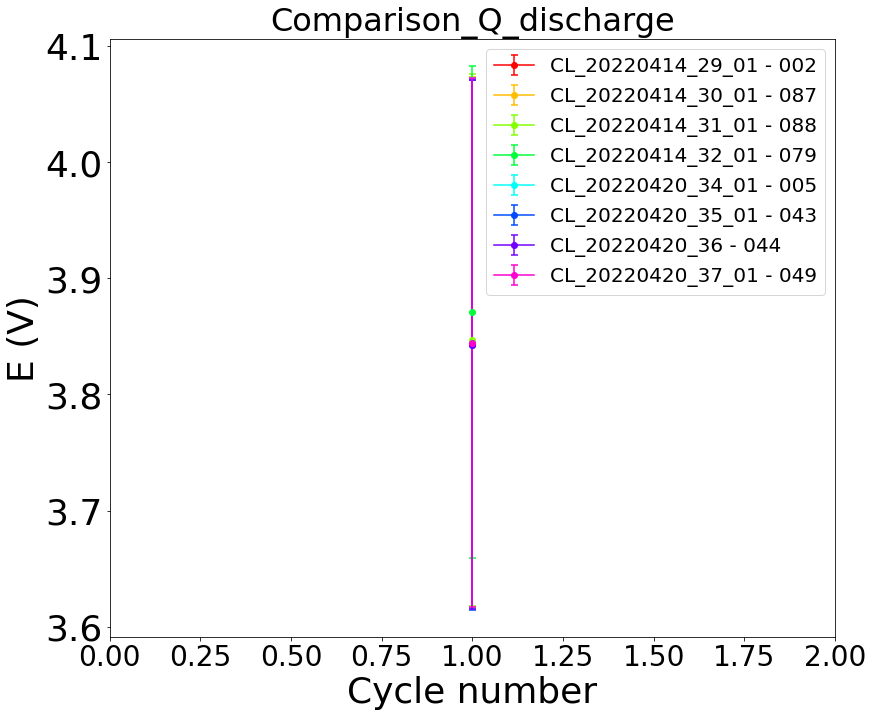

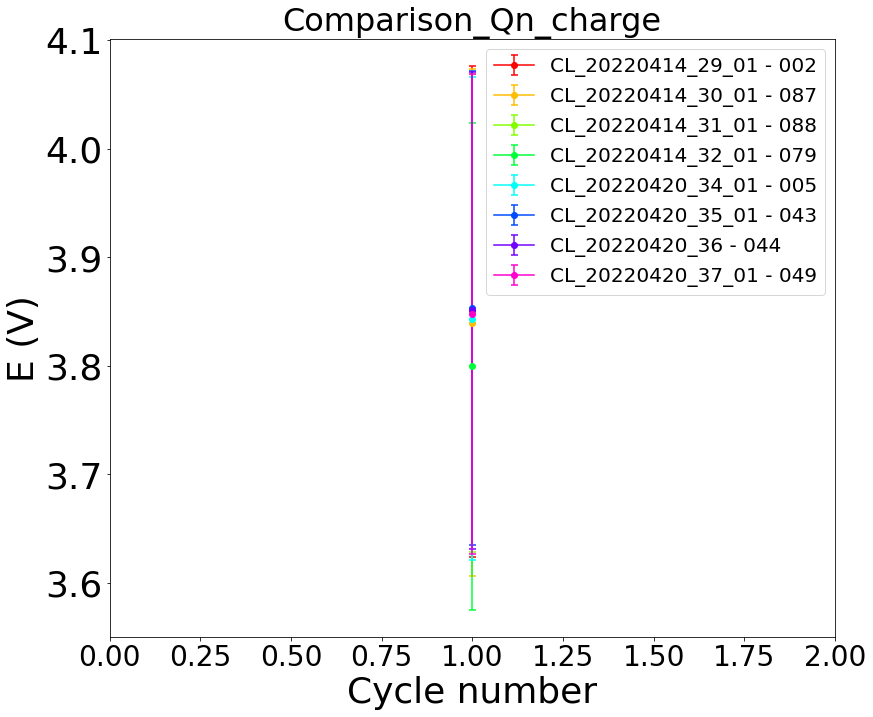

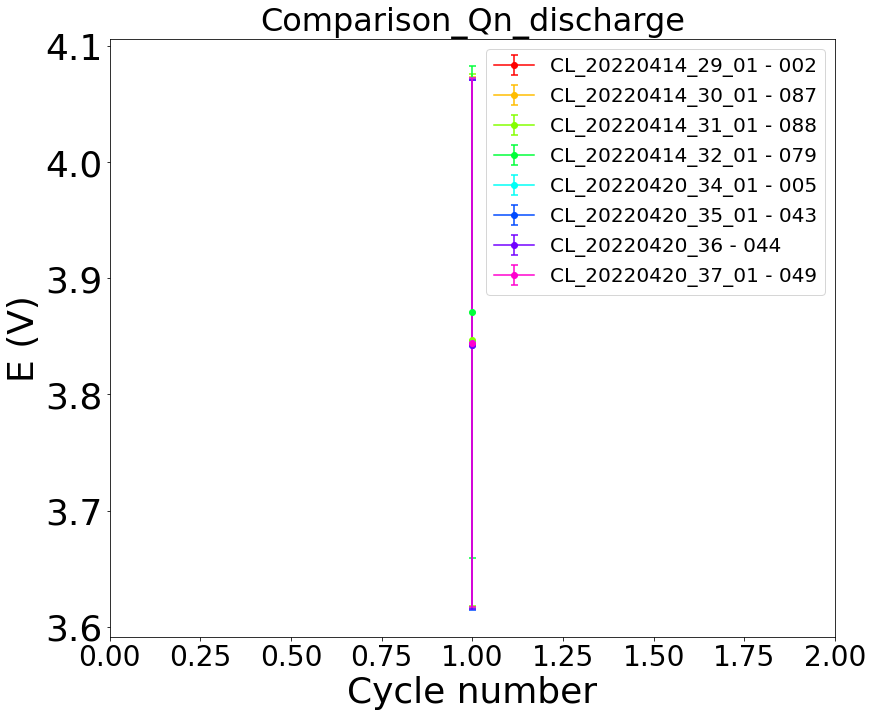

In [30]:
# Plotting average voltage as a function of cycling number
if len(dirs_rate_cap) >= 2:
    path_res_p = path_res + "\\Average voltage"
    try: 
        os.makedirs(path_res_p)
    except:
        pass

    name_dict = "average_volt"
    dict_i = average_volt
    y_to_plot = ["Q", "Qn"]
    # Defining limits plotting
    y_maxs = {}
    y_mins = {}
    x_maxs = {}
    x_mins = {}
    max_cycle = 0
    for k in y_to_plot:
        y_maxs[k] = {}
        y_mins[k] = {}
        for d in dict_i:
            limits[name_dict][d] = {}
            x_maxs[d] = []
            x_mins[d] = []
            y_maxs[k][d] = []
            y_mins[k][d] = []
            ind_exp = 0
            for exp in dict_i[d]:
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                lenx = len(x)
                if lenx > max_cycle:
                    max_cycle = lenx
                x_maxs[d].append(max(x))
                x_mins[d].append(min(x))
                name_y = "Average voltage"
                y = dict_i[d][exp][name_y]
                y_maxs[k][d].append(max(y))
                y_mins[k][d].append(min(y))
                ind_exp+=1


    factor = 1
    for d in dict_i:
        limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
        limits[name_dict][d]["x_down"] = min(x_mins[d])
        for k in y_to_plot:
            name_up = k + "_y_up"
            name_down = k + "_y_down"
            limits[name_dict][d][name_up] = max(y_maxs[k][d])
            limits[name_dict][d][name_down] = min(y_mins[k][d])

    for k in y_to_plot:
        path_res_p_k = path_res_p + "\\" + k
        try: 
            os.makedirs(path_res_p_k)
        except:
            pass
        for d in dict_i:
            if max_cycle > 55:
                fig = plt.figure(figsize=(max_cycle/5, 13))
            else:
                fig = plt.figure(figsize=(13, 11))
            filename = "Comp_" + name_dict + "_" + str(d)
            ind_exp = 0
            for exp in dict_i[d]:
                col = ind_exp/(len(performance_ave[d]))
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                name_y = "Average voltage"
                name_ystd = "Std voltage"
                y = dict_i[d][exp][name_y]
                y_std = dict_i[d][exp][name_ystd]
                plt.errorbar(x,y, yerr=y_std, color=plt.cm.hsv(col), label=name_i, capsize=3.5, capthick=1.5, marker = "o")
                ind_exp+=1

                plt.xlim([0,limits[name_dict][d]["x_up"]])
                name_up = k + "_y_up"
                name_down = k + "_y_down"
                #plt.ylim([0, limits[name_dict][d][name_up]])

                plt.xlabel("Cycle number", fontsize=36)
                plt.ylabel("E (V)", fontsize=36)

            title = "Comparison_" + k + "_" + d
            plt.title(title, fontsize = 32)
            plt.legend(fontsize=20) 
            plt.xticks(fontsize=28)
            plt.yticks(fontsize=36)
            path_save = path_res_p_k + "\\" + filename + ".png"
            plt.savefig(path_save)

In [ ]:
# Eventual for change color map 
"""

# Defining color maps and when to change it
col_maps = [plt.cm.copper, plt.cm.cool, plt.cm.bone, plt.cm.summer]
num_change_col = 3

# Plotting (dis)charge capacity as a function of cycling number

path_res_p = path_res + "\\End of (dis)charge"
try: 
    os.makedirs(path_res_p)
except:
    pass

name_dict = "end_capacity"
dict_i = end_capacity
y_to_plot = ["Q", "Qn"]
# Defining limits plotting
y_maxs = {}
y_mins = {}
x_maxs = {}
x_mins = {}
max_cycle = 0
for k in y_to_plot:
    y_maxs[k] = {}
    y_mins[k] = {}
    for d in dict_i:
        limits[name_dict][d] = {}
        x_maxs[d] = []
        x_mins[d] = []
        y_maxs[k][d] = []
        y_mins[k][d] = []
        for c in range(len(cycles_to_plot)):
            ind_exp = 0
            cyc = cycles_to_plot[c]
            for exp in dict_i[d]:
                key_i = keys[ind_exp]
                name_i = names[ind_exp]
                name_x = "Cycle number"
                x = dict_i[d][exp][name_x]
                lenx = len(x)
                if lenx > max_cycle:
                    max_cycle = lenx
                x_maxs[d].append(max(x))
                x_mins[d].append(min(x))
                name_y = k
                y = dict_i[d][exp][name_y]
                y_maxs[k][d].append(max(y))
                y_mins[k][d].append(min(y))
                ind_exp+=1

                
factor = 5
for d in dict_i:
    limits[name_dict][d]["x_up"] = max(x_maxs[d])+factor
    limits[name_dict][d]["x_down"] = min(x_mins[d])
    for k in y_to_plot:
        name_up = k + "_y_up"
        name_down = k + "_y_down"
        limits[name_dict][d][name_up] = max(y_maxs[k][d])
        limits[name_dict][d][name_down] = min(y_mins[k][d])
    
for k in y_to_plot:
    path_res_p_k = path_res_p + "\\" + k
    try: 
        os.makedirs(path_res_p_k)
    except:
        pass
    for d in dict_i:
        if max_cycle > 55:
            fig = plt.figure(figsize=(max_cycle/5, 13))
        else:
            fig = plt.figure(figsize=(11, 9))
        filename = "Comp_" + name_dict + "_" + str(d) 
        ind_exp = 0
        col_c = 0
        index_col_map = 0
        for exp in dict_i[d]:
            if col_c == num_change_col:
                col_c = 0
                index_col_map+=1
            col_map = col_maps[index_col_map]
            col = col_c/(num_change_col-1)
            key_i = keys[ind_exp]
            name_i = names[ind_exp]
            name_x = "Cycle number"
            x = dict_i[d][exp][name_x]
            name_y = k
            y = dict_i[d][exp][name_y]
            plt.scatter(x,y,linewidth=2, s=150, color=col_map(col), label=name_i, marker = "o")
            ind_exp+=1
            col_c+=1

            plt.xlim([0,limits[name_dict][d]["x_up"]])
            name_up = k + "_y_up"
            name_down = k + "_y_down"
            plt.ylim([0, limits[name_dict][d][name_up]])

            plt.xlabel("Cycle number", fontsize=36)
            if k == "Q":
                plt.ylabel(k + " (mAh)", fontsize=36)
            if k == "Qn":
                plt.ylabel(k + " (mAh g$^{-1}$)", fontsize=36)

        plt.legend(fontsize=20) 
        plt.xticks(fontsize=28)
        plt.yticks(fontsize=36)
        path_save = path_res_p_k + "\\" + filename
        plt.savefig(path_save)
        
"""